<a href="https://colab.research.google.com/github/FarahRadwan/Ms3php/blob/main/GUC_Kmeans_Assignment_2_43_3247_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [ ]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from scipy.spatial import distance
import random

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [ ]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here # 
     if Distance_Type=="Ecluidian_distance":
       Cluster_Distance=distance.cdist(Data_points,Cluster_Centroids ,'euclidean')
       
     if Distance_Type=="pearson":
        #Cluster_Distance = np.corrcoef(Data_points,Cluster_Centroids)
         Cluster_Distance=distance.cdist(Data_points,Cluster_Centroids ,'correlation')
         #Cluster_Distance=np.nan_to_num(Cluster_Distance, copy=True)
         #print(Cluster_Distance)
     if Distance_Type=="pearsond":
        Cluster_Distance=np.zeros((len(Data_points),len(Cluster_Centroids)))
        for i in range(len(Cluster_Centroids)):
            for j in range(len(Data_points)):
                Cluster_Distance[j][i]=1 - ((np.sum((Cluster_Centroids[i]- np.mean(Cluster_Centroids))*(Data_points[j]- np.mean(Data_points))))
                /((np.sqrt(np.sum(np.square(Cluster_Centroids[i]- np.mean(Cluster_Centroids)))*(np.sum(np.square(Data_points[j]- np.mean(Data_points))))))))
        #Cluster_Distance=np.nan_to_num(Cluster_Distance, copy=True)
     if Distance_Type=="pearsond1":
        Cluster_Distance=np.zeros((len(Data_points),len(Cluster_Centroids)))
        d=pd.DataFrame(Data_points)
        d1=d.sub(d.mean(axis=1), axis=0)
        d1=d1.to_numpy()
        c=pd.DataFrame(Cluster_Centroids)
        c1=c.sub(c.mean(axis=1), axis=0)
        c1=c1.to_numpy()
        for i in range (len(c1)):
            for j in range (len(d1)):
                 Cluster_Distance[j][i]=1-(np.sum(np.multiply(d1[j],c1[i]))/(np.sqrt(np.sum(np.square(d1[j]))*np.sum(np.square(c1[i])))))

        
     return Cluster_Distance 


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [ ]:

def GUC_Kmean2( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here 
   mindisto=10000000000000
  # initCentroid=Data_points[np.random.choice(len(Data_points),Number_of_Clusters,replace=False)]
  # minind=np.zeros(n).astype(int)
  #   #np.random.seed(200)
   for i in range (100):
    #print("i")
    #print(i)
    #print("k")
    #print(k) 
    n=Data_points.shape[0]
    minind=np.zeros(n).astype(int)
    minfind=np.zeros(n).astype(int)
    Cluster_Centroids=Data_points[np.random.choice(len(Data_points),Number_of_Clusters,replace=False)]
    mincluster=Cluster_Centroids
    initcluster=Cluster_Centroids.copy()
    #print("cent")
    #print(Cluster_Centroids)
    tg=0
    tc=0
    while True:
      old_closest=minind.copy()
      #print(minind)
      Cluster_Distance=GUC_Distance ( Cluster_Centroids, Data_points,Distance_Type)
      array_sum = np.sum(Cluster_Distance)
      #print("array_sum")
      #print(array_sum)
      array_has_nan = np.isnan(array_sum)
      #print("arraynan")
      #print(array_has_nan)
      if (array_has_nan==True):
        tc=1
        #print("htl3")
        break
      #print("dist")
      #print(Cluster_Distance)
      minind=np.argmin(Cluster_Distance,axis=1)
      #print("minindex")
      #print(minind)
      #mindist=Cluster_Distance[pd.DataFrame(Cluster_Distance).loc[:,minind]]
      mindist=np.amin(Cluster_Distance,axis=1)
      #print("mindist")
      #print(mindist)
      if (tg==0):
        #print("tg=0")
        oldmeanerror=np.sum(np.square(mindist))/len(Data_points)
        #print("oldmeanerror")
        #print(oldmeanerror)
      for i in range(Number_of_Clusters):
        Cluster_Centroids[i,:]=Data_points[minind==i].mean(axis=0)
      #print("centers")
      #print(Cluster_Centroids)
      #print(all(minind==old_closest))
      if all(minind==old_closest):
        break
      newmeanerror=np.sum(np.square(mindist))/len(Data_points)
      #print("newmeanerror")
      #print(newmeanerror)
      if (oldmeanerror==newmeanerror and tg!=0):
        #print("hntl32")
        break
      else:
        oldmeanerror=newmeanerror
      tg=tg+1
    if(tc==0):
     df=pd.DataFrame(Data_points)
     df["cluster"]=minind
     df.head()
     dfmin=df
     dis=sum(np.square(mindist))
    #print("sumdist")
    
    #print(dis)
    #print("distortion")
     disfunction=dis/len(Data_points)
    #print(disfunction)
     if (disfunction<mindisto):
      #print("hiiiiiiiiiiiiii")
      mindisto=disfunction
      #print("mindisto")
      #print(mindisto)
      mincluster=Cluster_Centroids
      #print("mincluster")
      #print(mincluster)
      mininitcluster=initcluster
      #print("mininitcluster")
      #print(mininitcluster)
      minfinald=mindist

      #print("minfinald")
      #print(minfinald)
      minfind=minind
      #print(minfind)
      dfmin=df


      

        
   return minfind,mincluster,mindisto  

In [ ]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here 
   mindisto=100000000000000000000
  # initCentroid=Data_points[np.random.choice(len(Data_points),Number_of_Clusters,replace=False)]
  # minind=np.zeros(n).astype(int)
  #   #np.random.seed(200)
   for i in range (100):
    #print("i")
    #print(i)
    #print("k")
    #print(k) 
    n=Data_points.shape[0]
    minind=np.zeros(n).astype(int)
    #minfind=np.zeros(n).astype(int)
    Cluster_Centroids=Data_points[np.random.choice(len(Data_points),Number_of_Clusters,replace=False)]
    #mincluster=Cluster_Centroids
    initcluster=Cluster_Centroids.copy()
    #print("cent")
    #print(Cluster_Centroids)
    tg=0
    while True:
      
      #print(minind)
      Cluster_Distance=GUC_Distance ( Cluster_Centroids, Data_points,Distance_Type)
      #print("dist")
      #print(Cluster_Distance)
      minind=np.argmin(Cluster_Distance,axis=1)
      old_closest=minind.copy()
      #print("minindex")
      #print(minind)
      #mindist=Cluster_Distance[pd.DataFrame(Cluster_Distance).loc[:,minind]]
      mindist=np.amin(Cluster_Distance,axis=1)
      #print("mindist")
      #print(mindist)
      for i in range(Number_of_Clusters):
        Cluster_Centroids[i,:]=Data_points[minind==i].mean(axis=0)
      #print("centers")
      #print(Cluster_Centroids)
      #print(all(minind==old_closest))
      if all(minind==old_closest):
        break
    df=pd.DataFrame(Data_points)
    df["cluster"]=minind

    df.head()
    dfmin=df
    
    #for i in range(Number_of_Clusters):
        #min=sum(np.square(Data_points[minind==i]-Cluster_Centroids[i]))
    dis=sum(np.square(mindist))
    #print("sumdist")
    #print(dis)
    #print("distortion")
    disfunction=dis/len(Data_points)
    #print(disfunction)
    if (disfunction<mindisto):
      #print("hiiiiiiiiiiiiii")
      mindisto=disfunction
      #print("mindisto")
      #print(mindisto)
      mincluster=Cluster_Centroids
      #print("mincluster")
      #print(mincluster)
      mininitcluster=initcluster
      #print("mininitcluster")
      #print(mininitcluster)
      minfinald=mindist

      #print("minfinald")
      #print(minfinald)
      minfind=minind
      #print(minfind)
      dfmin=df


      

        
   return minfind,mincluster,dfmin,mindisto  

In [ ]:
def GUC_Kmean3( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here 
   mindisto=10000000000000
   for i in range (100):
    print("i")
    print(i)
    print("k")
    print(Number_of_Clusters) 
    n=Data_points.shape[0]
    minind=np.zeros(n).astype(int)
    Cluster_Centroids=Data_points[np.random.choice(len(Data_points),Number_of_Clusters,replace=False)]
    initcluster=Cluster_Centroids.copy()
    print("cent")
    print(Cluster_Centroids) 
    
    tg=0
    while True:
      old_closest=minind.copy()
      Cluster_Distance=GUC_Distance ( Cluster_Centroids, Data_points,Distance_Type)
      print("dist")
      print(Cluster_Distance)
      minind=np.argmin(Cluster_Distance,axis=1)
      mindist=np.amin(Cluster_Distance,axis=1)
      for i in range(Number_of_Clusters):
        Cluster_Centroids[i,:]=Data_points[minind==i].mean(axis=0)
      array_sum = np.sum(Cluster_Centroids)
      array_has_nan = np.isnan(array_sum)
      if(array_sum==True):
        tg=1
        break
      if all(minind==old_closest):
        break
    if(tg==0):    
     df=pd.DataFrame(Data_points)
     df["cluster"]=minind

     df.head()
     dis=sum(np.square(mindist))
     disfunction=dis/len(Data_points)
     if (disfunction<mindisto):
      mindisto=disfunction
      mincluster=Cluster_Centroids
      mininitcluster=initcluster
      minfinald=mindist
      minfind=minind
      dfmin=df


      

        
   return minfind,mincluster,dfmin,mindisto  

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [ ]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],cluster_centers=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            #print(i)
            plt.scatter(X[km==i,0],X[km==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(cluster_centers[i][0],cluster_centers[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

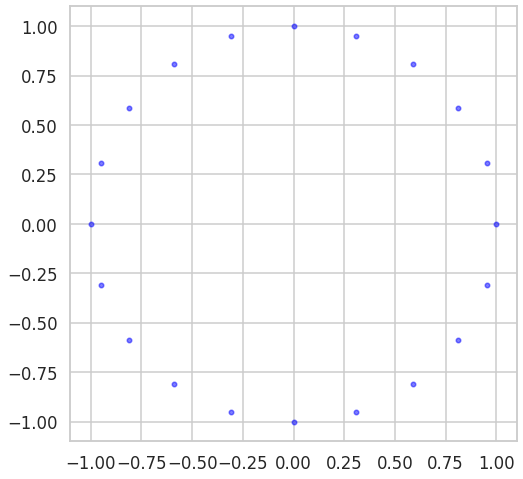

In [ ]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

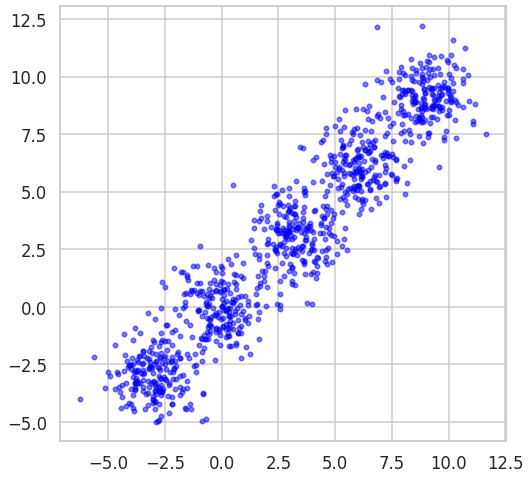

In [ ]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

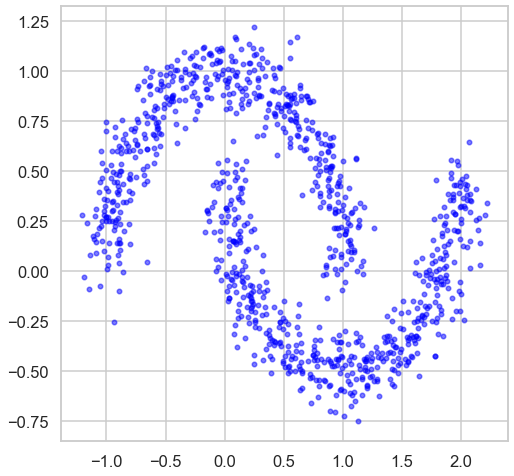

In [ ]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

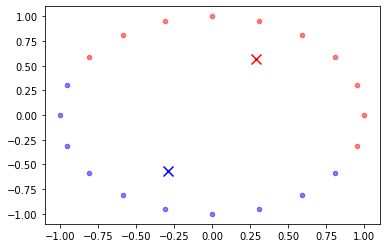

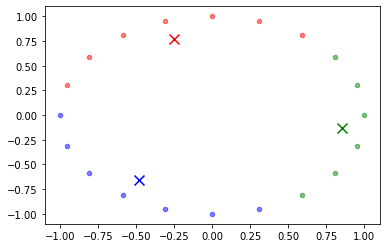

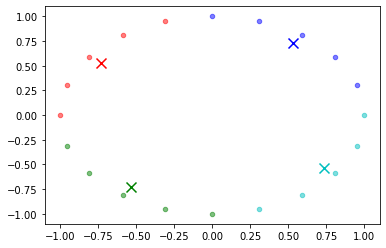

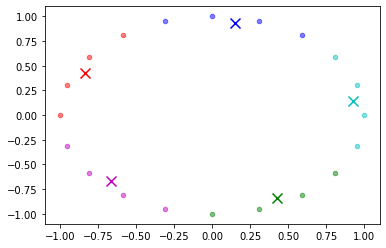

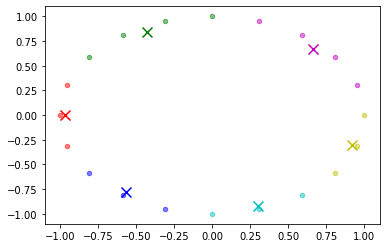

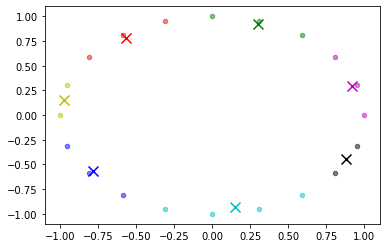

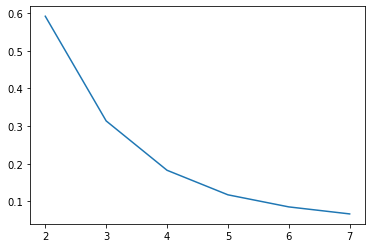

In [ ]:
#Ex1,ecludian
k=[2,3,4,5,6,7]
dist=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean (X,z, "Ecluidian_distance")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 4 or no point




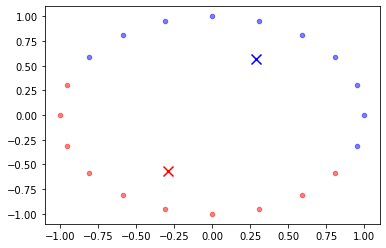

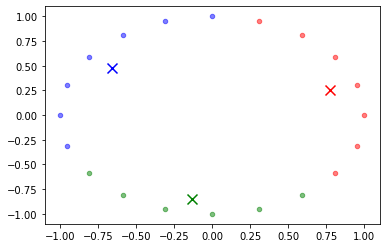

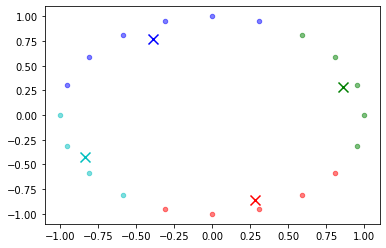

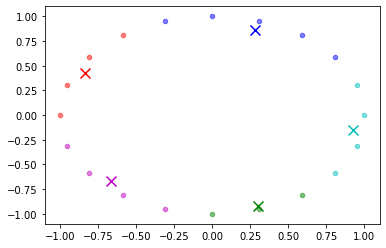

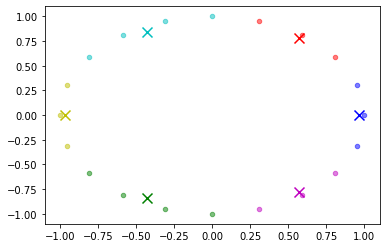

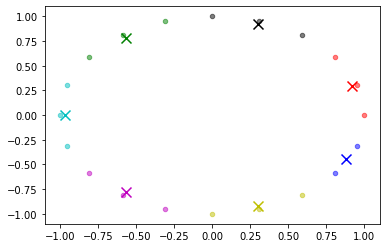

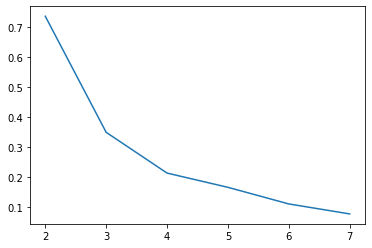

In [ ]:
#Ex1,ecludian,kmeans gdeeda
k=[2,3,4,5,6,7]
dist=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean (X,z, "Ecluidian_distance")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 4 or no point

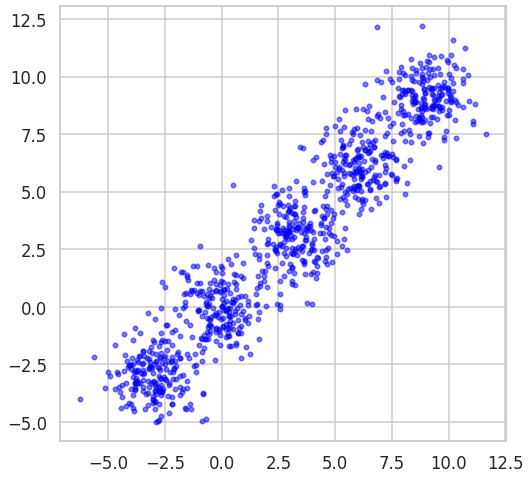

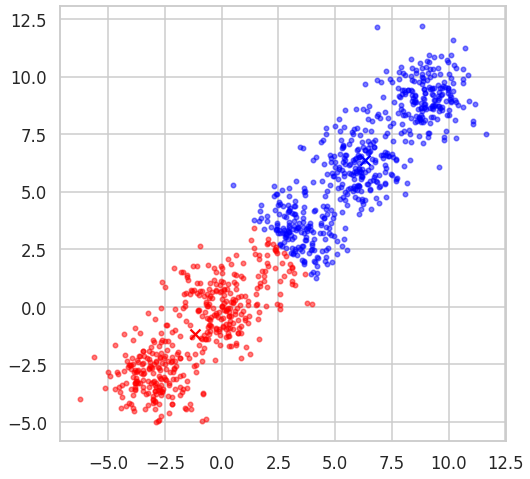

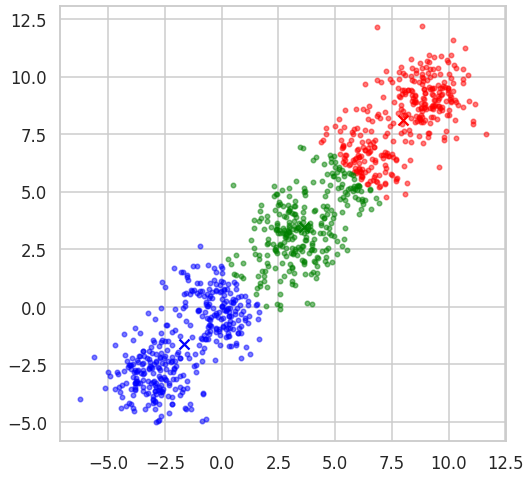

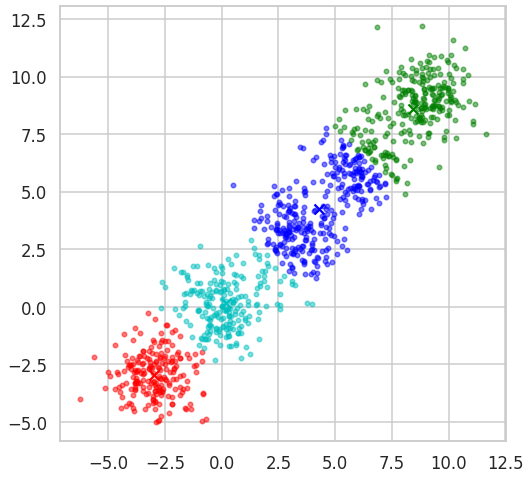

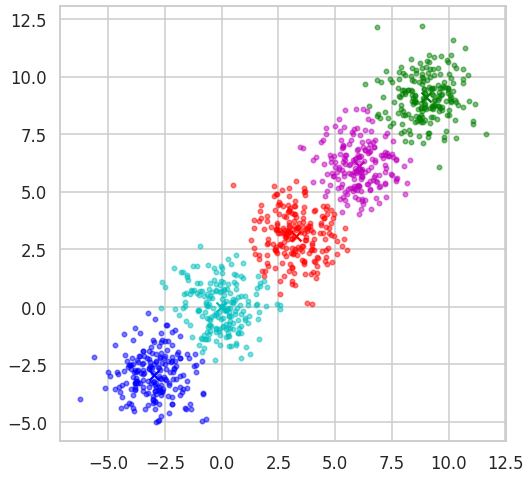

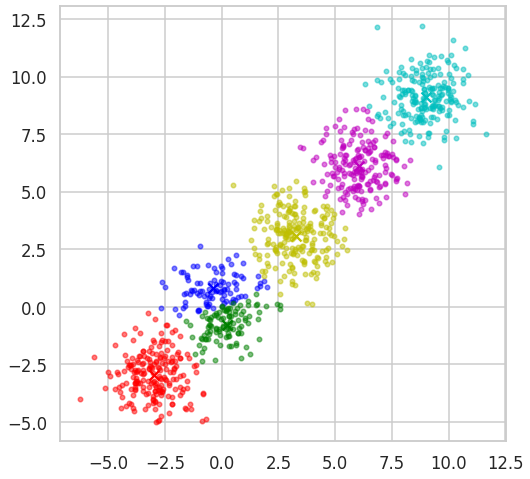

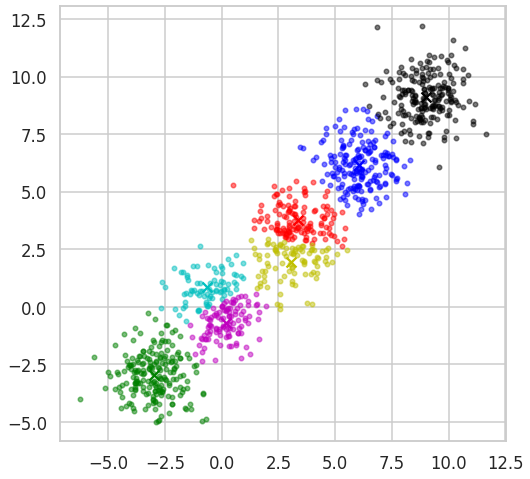

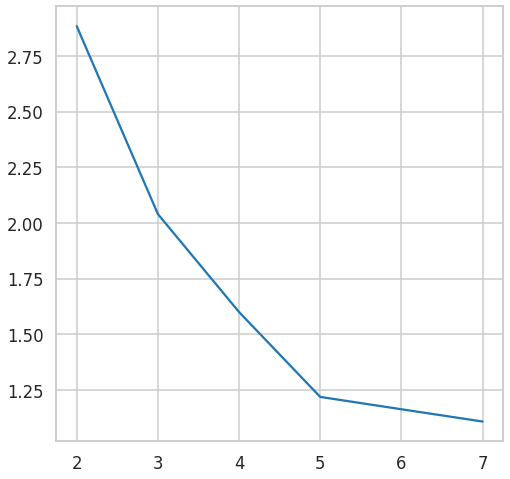

In [ ]:
#Ex2,ecludian
k=[2,3,4,5,6,7]
dist=[]
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean (X,z, "Ecluidian_distance")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 5

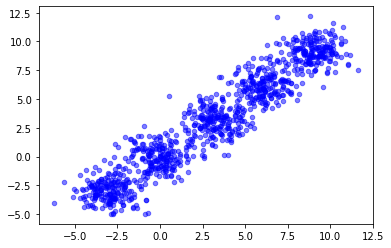

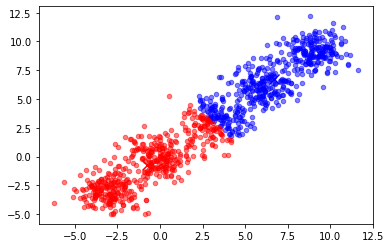

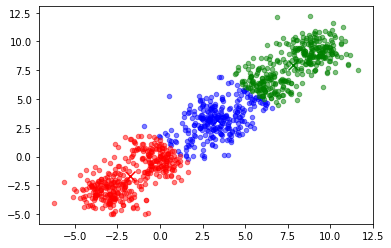

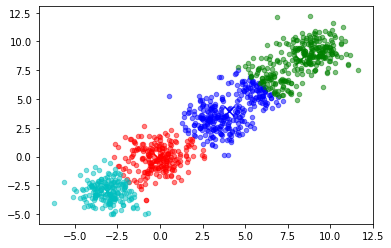

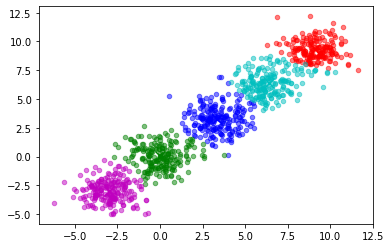

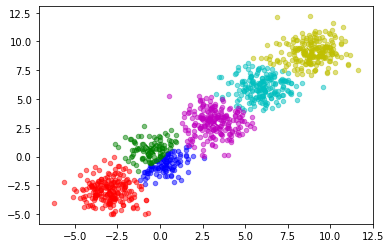

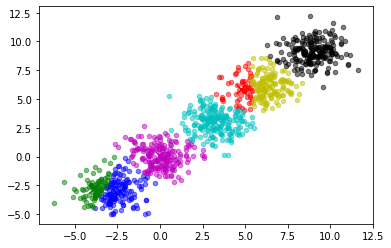

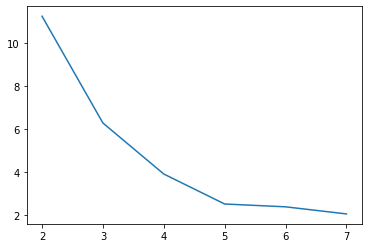

In [ ]:
#Ex2,ecludian
k=[2,3,4,5,6,7]
dist=[]
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean (X,z, "Ecluidian_distance")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 5

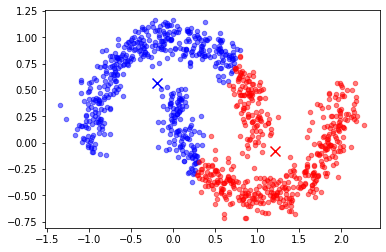

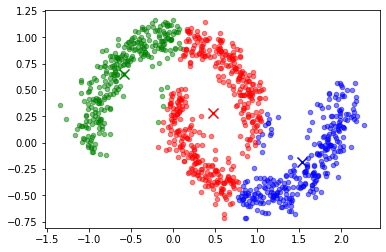

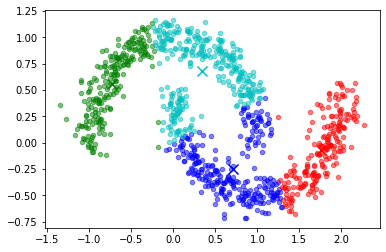

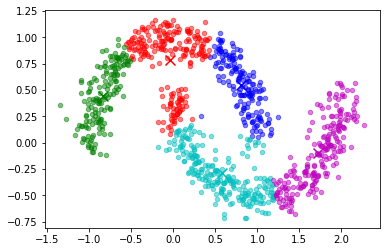

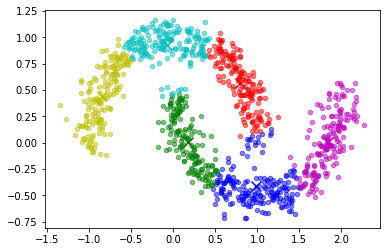

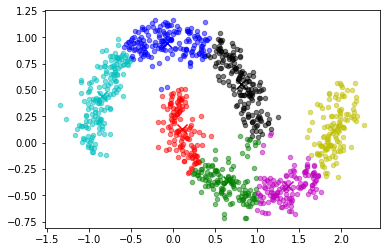

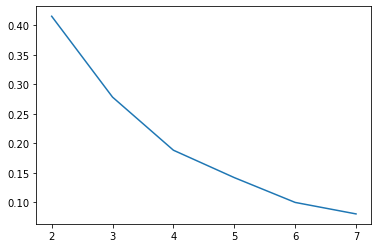

In [ ]:
#EX3,ecludian
k=[2,3,4,5,6,7]
dist=[]
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean (X,z, "Ecluidian_distance")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#no elbow point 

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [ ]:
data=pd.read_csv("/content/Customerdata.csv")
data.head()


ID  Sex  Marital status  ...  Income  Occupation  Settlement size
0  100000001    0               0  ...  124670           1                2
1  100000002    1               1  ...  150773           1                2
2  100000003    0               0  ...   89210           0                0
3  100000004    0               0  ...  171565           1                1
4  100000005    0               0  ...  149031           1                1

[5 rows x 8 columns]

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
del data['ID']
data.head()

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1

['Sex', 'Marital status']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


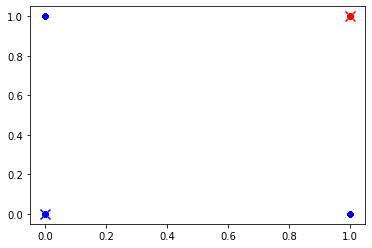

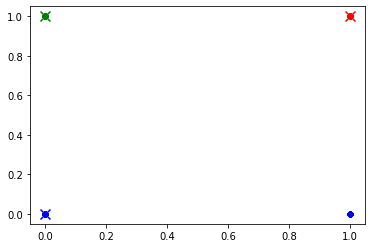

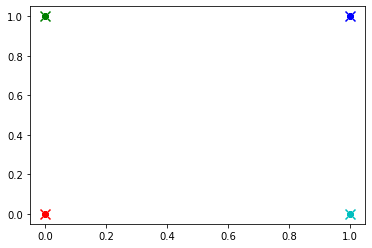

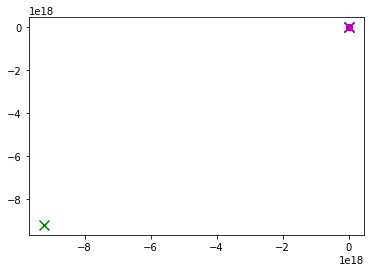

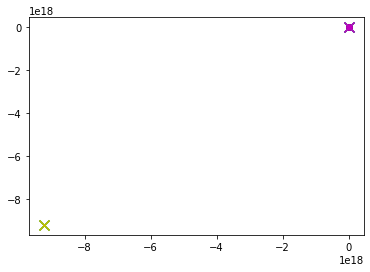

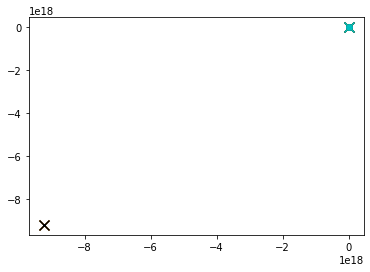

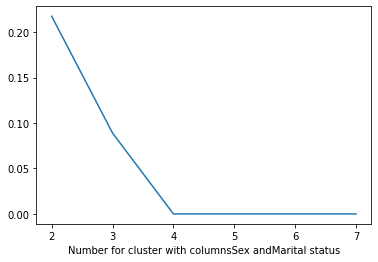

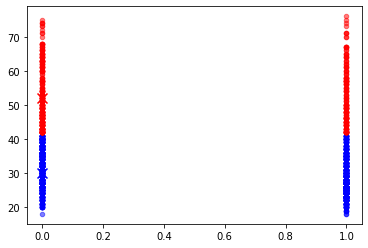

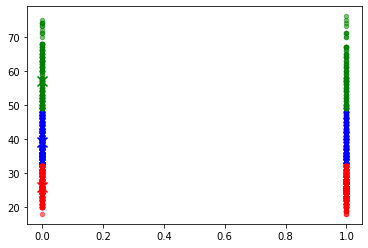

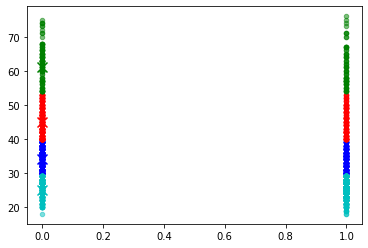

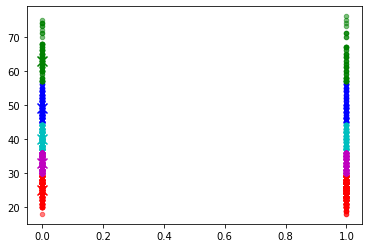

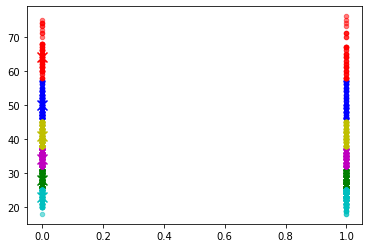

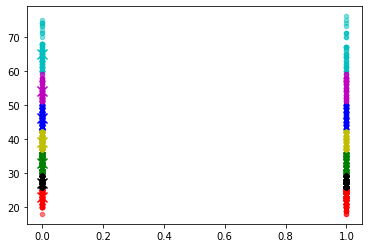

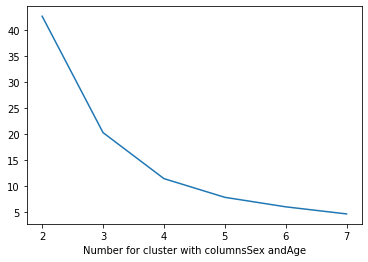

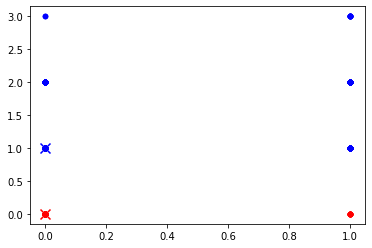

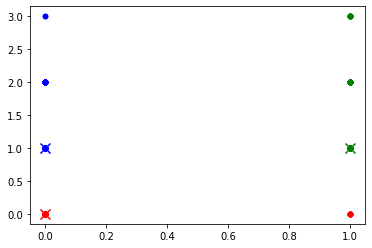

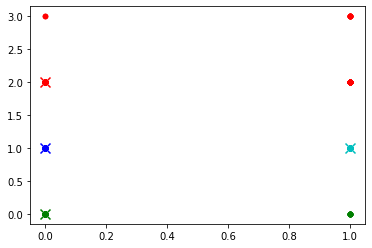

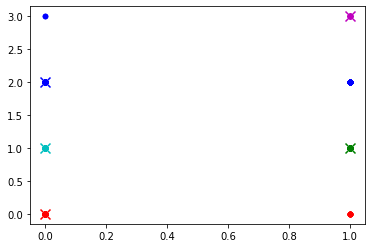

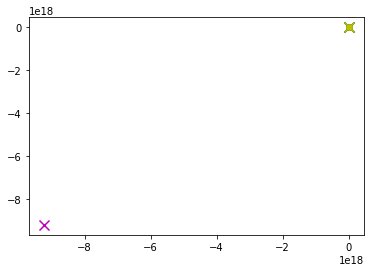

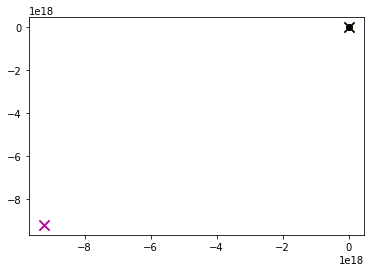

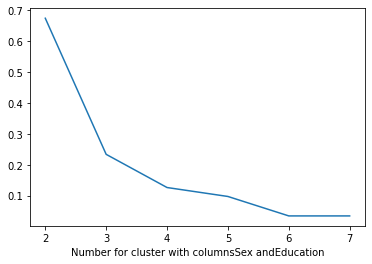

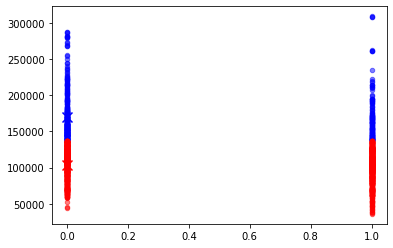

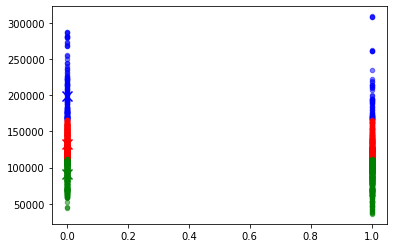

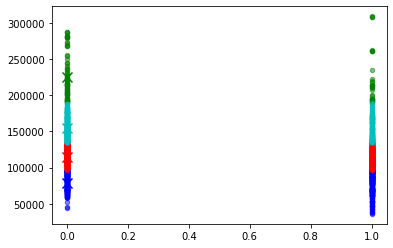

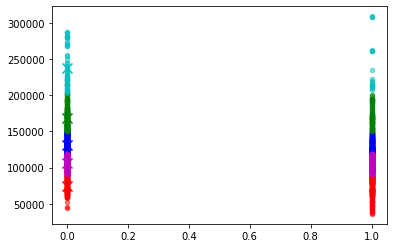

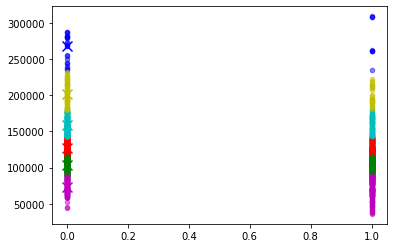

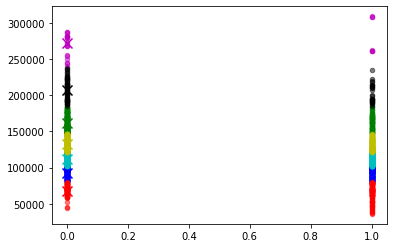

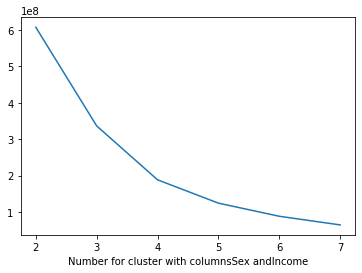

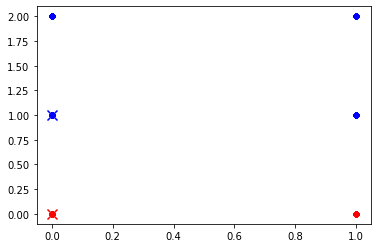

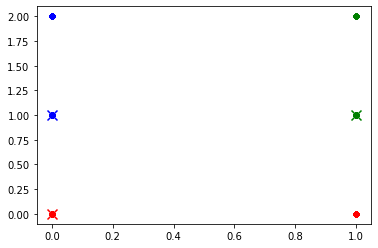

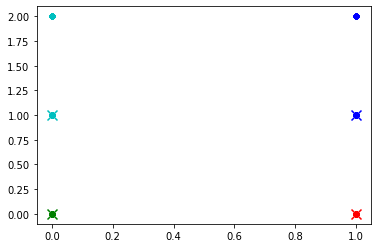

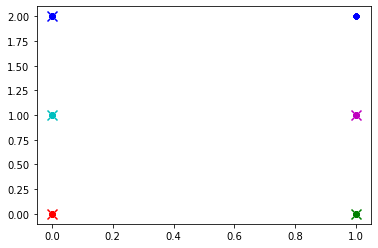

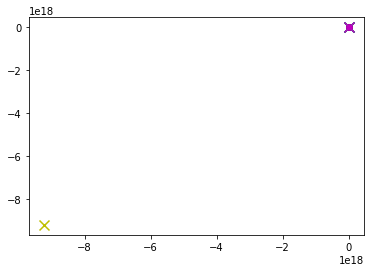

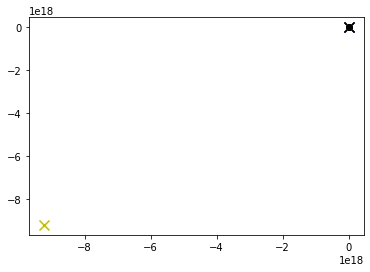

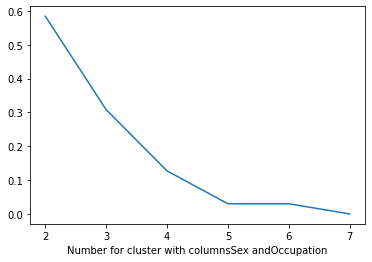

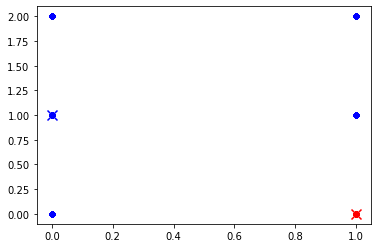

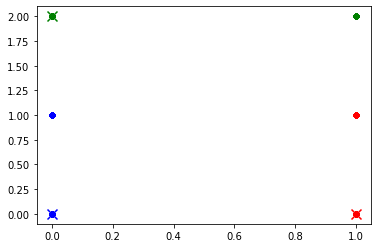

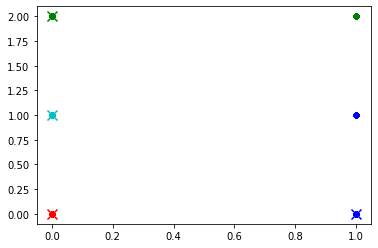

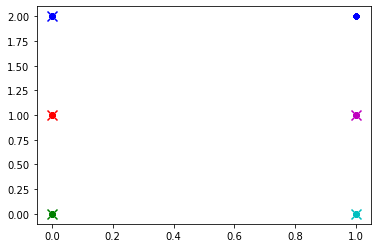

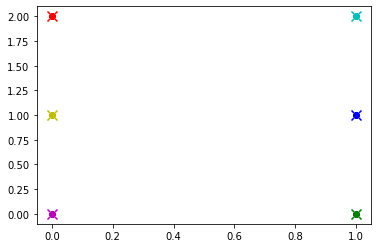

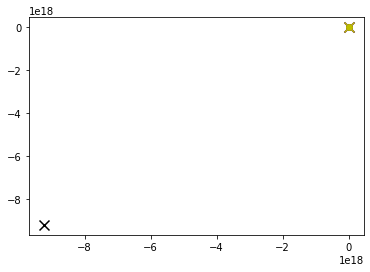

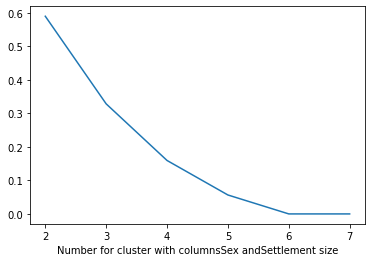

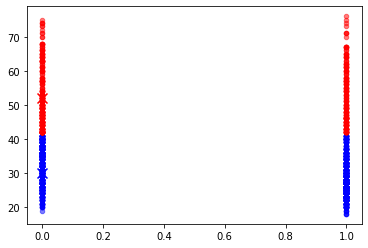

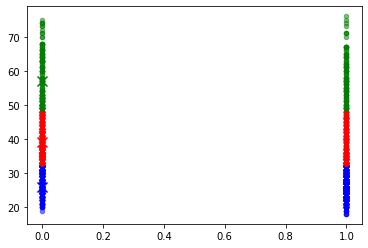

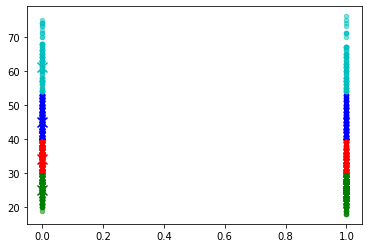

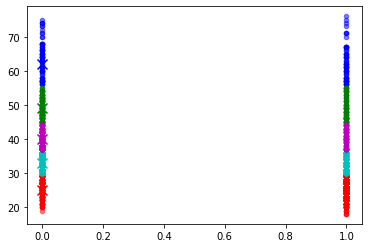

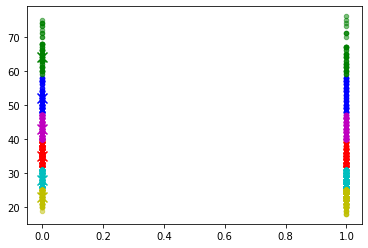

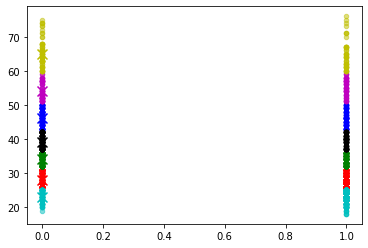

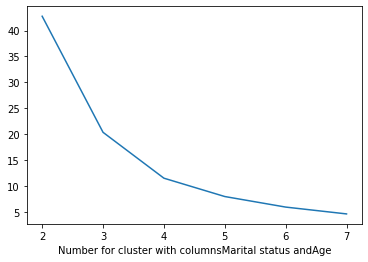

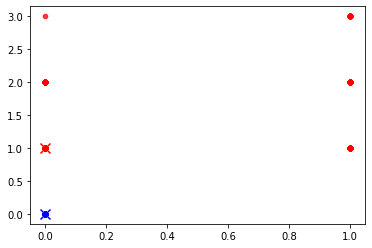

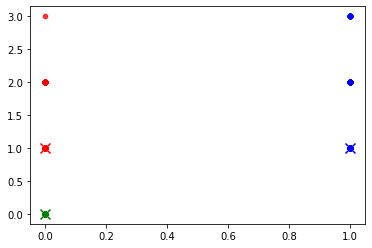

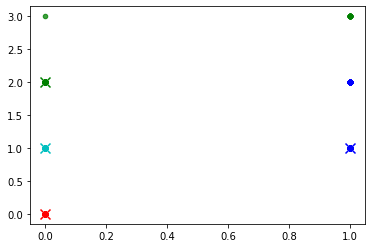

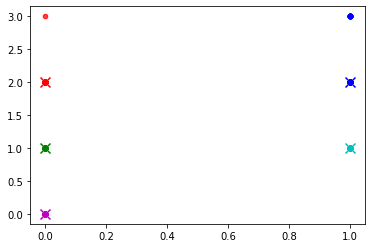

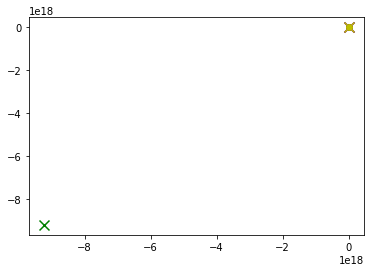

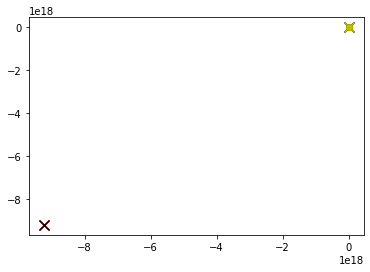

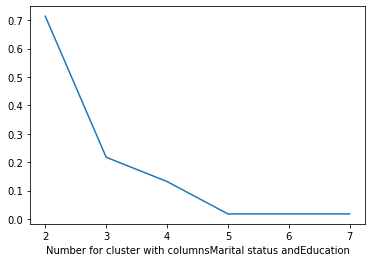

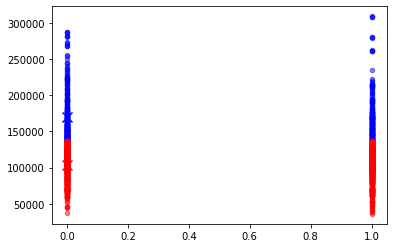

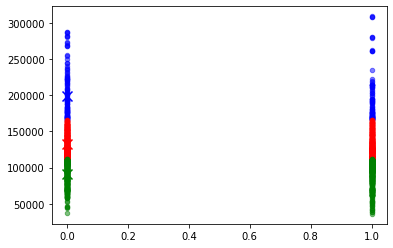

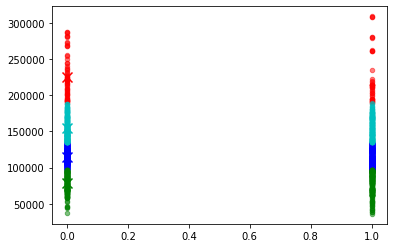

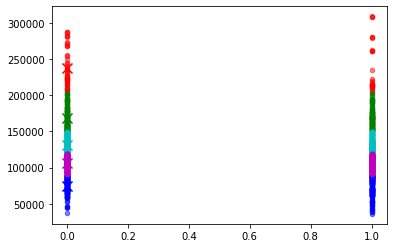

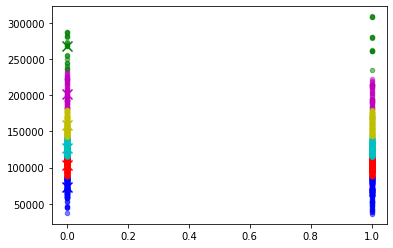

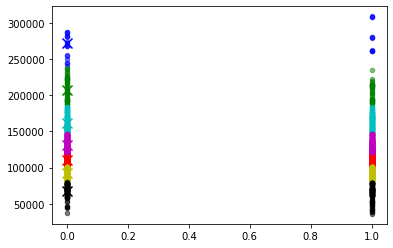

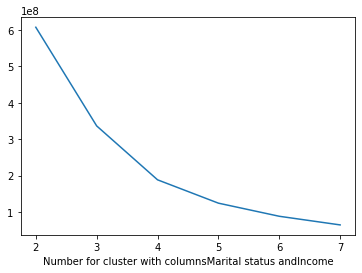

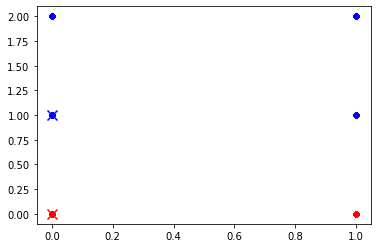

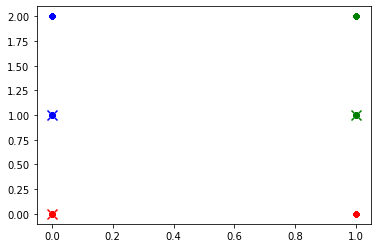

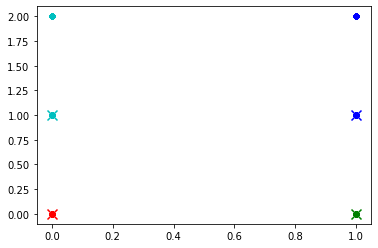

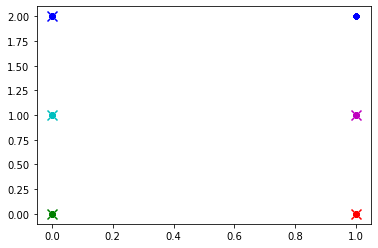

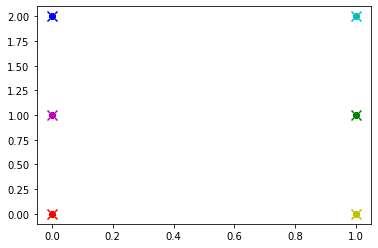

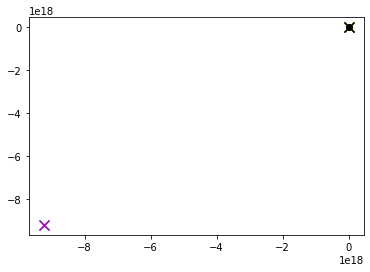

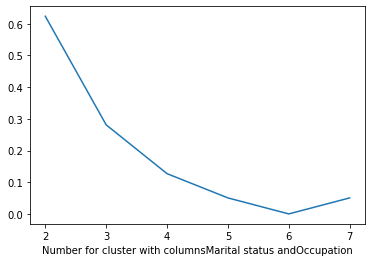

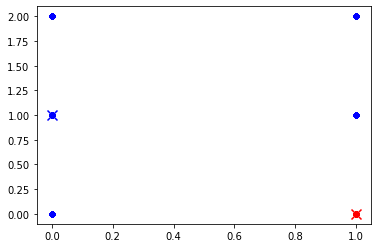

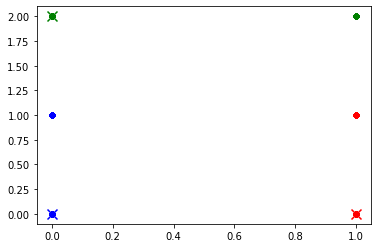

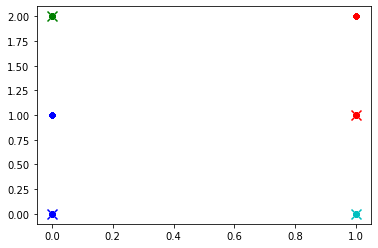

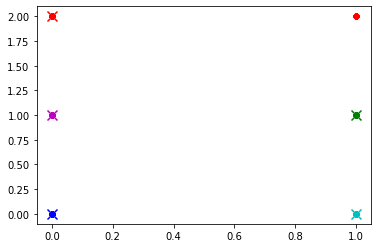

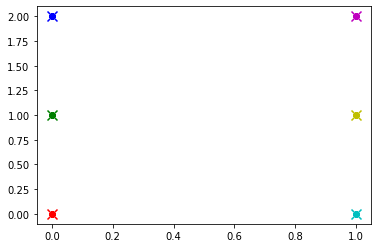

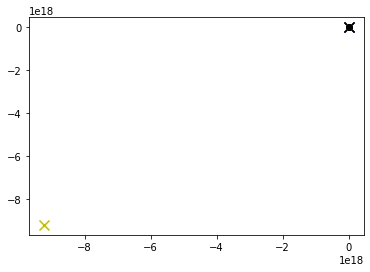

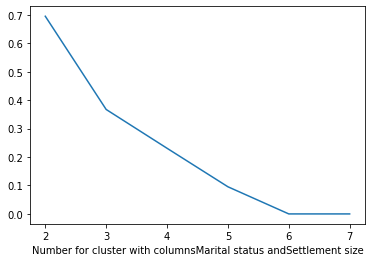

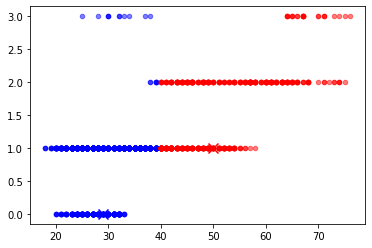

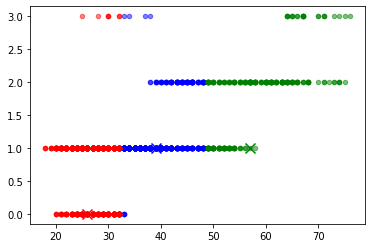

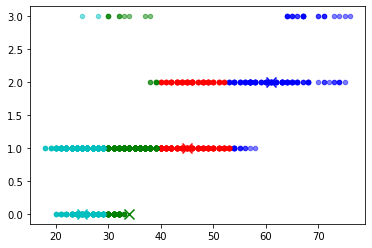

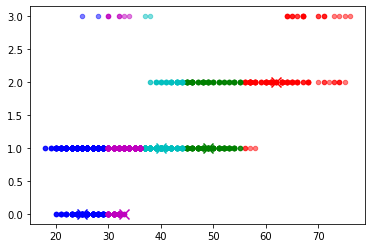

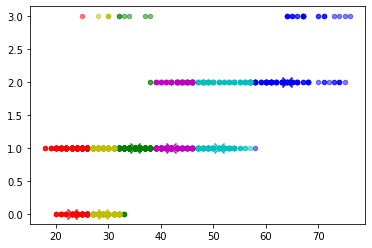

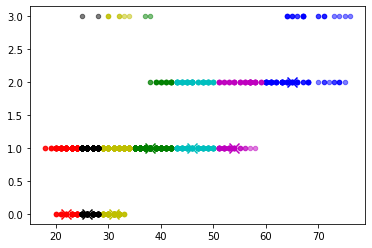

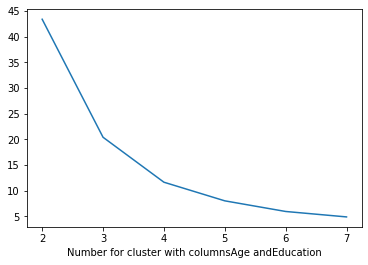

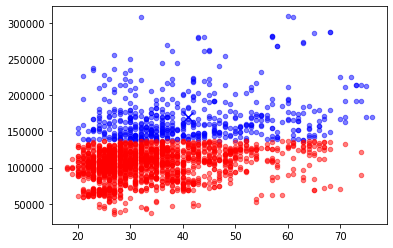

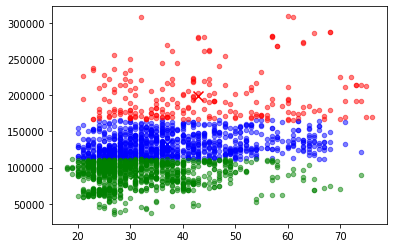

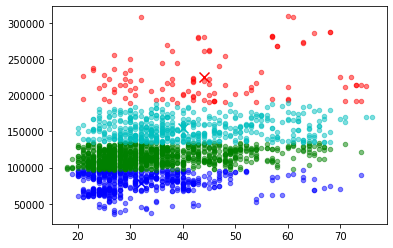

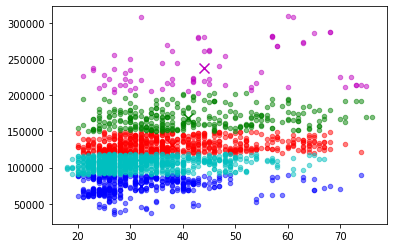

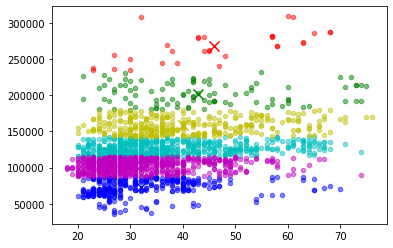

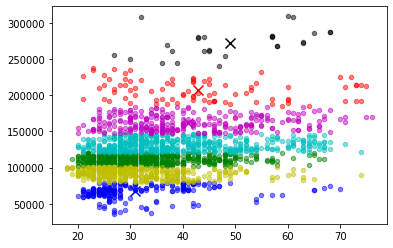

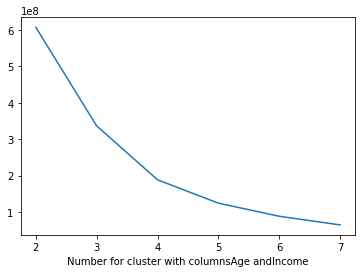

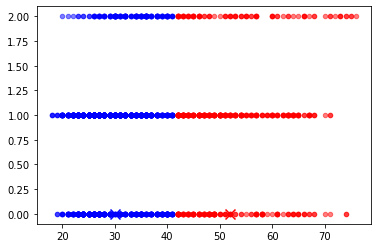

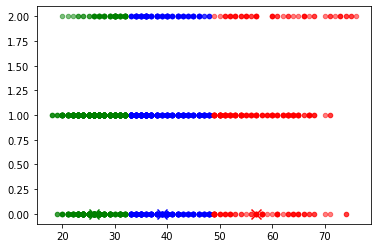

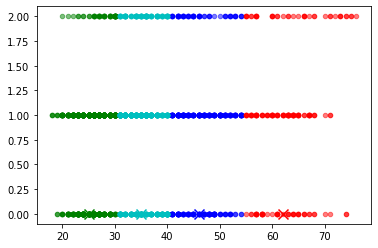

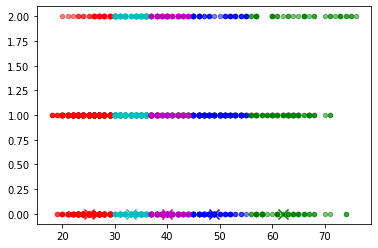

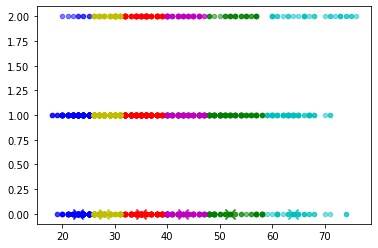

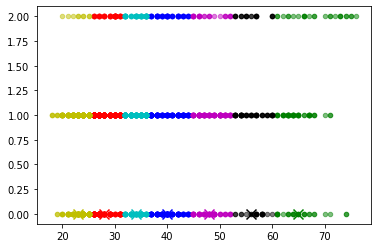

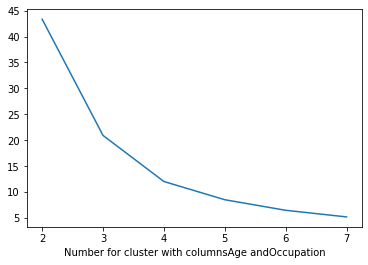

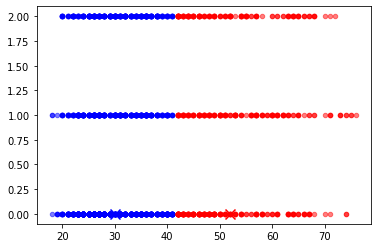

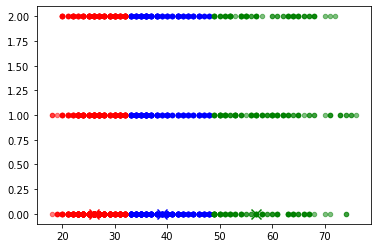

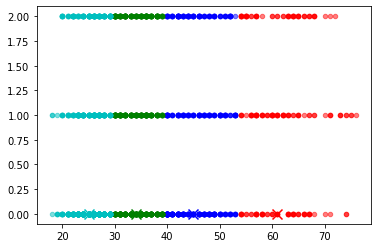

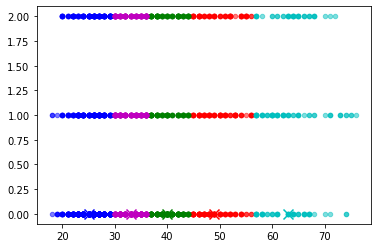

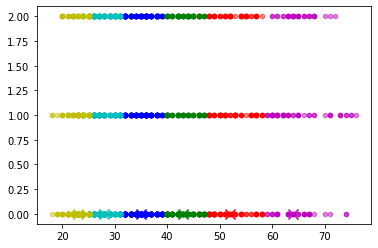

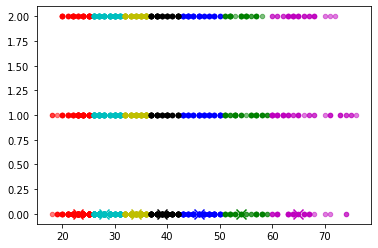

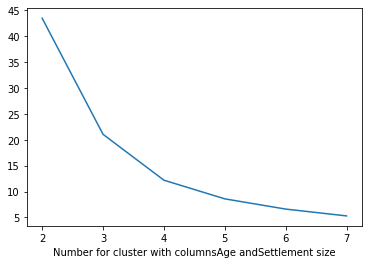

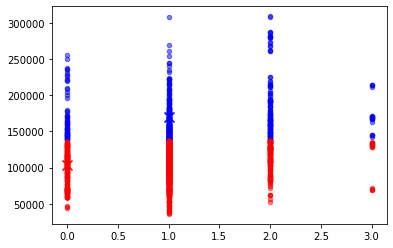

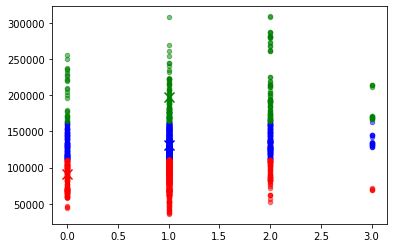

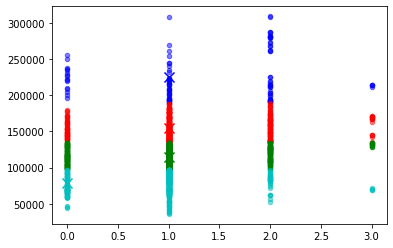

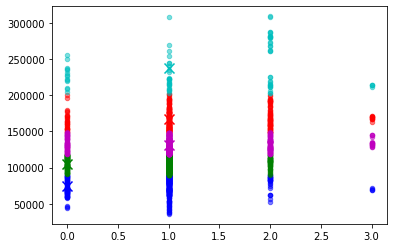

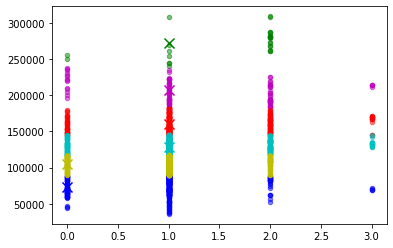

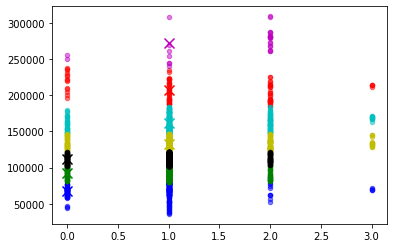

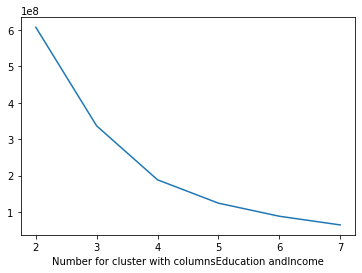

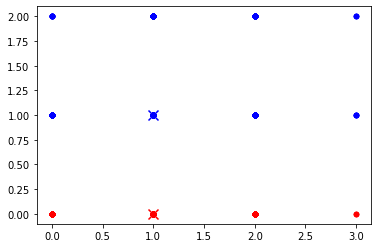

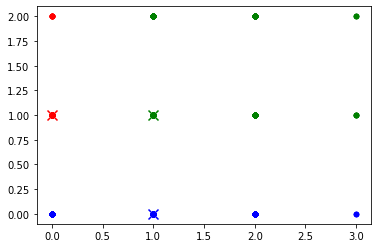

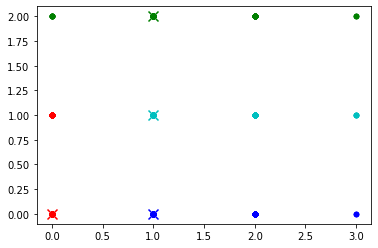

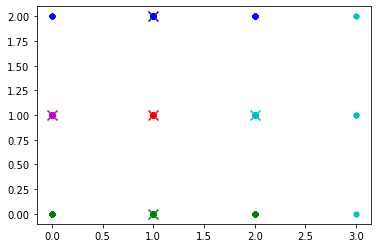

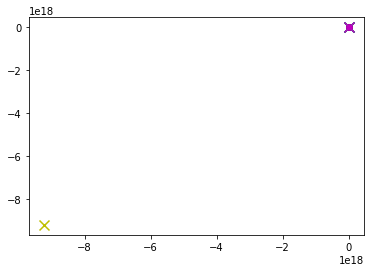

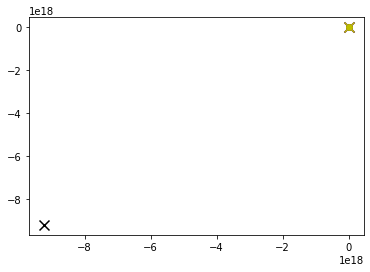

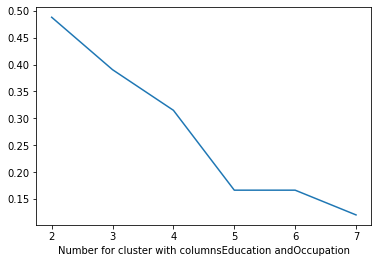

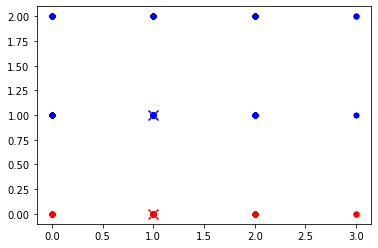

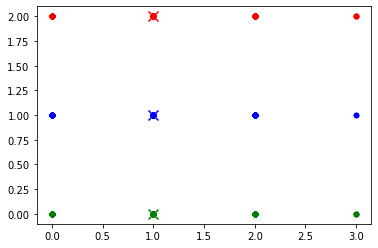

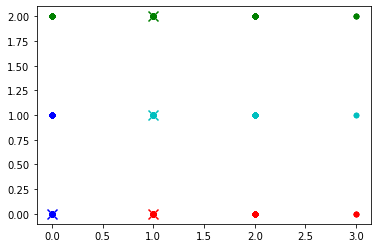

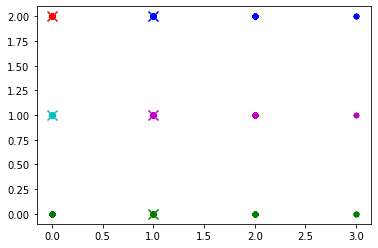

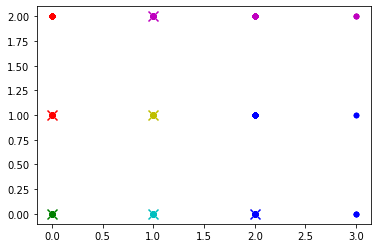

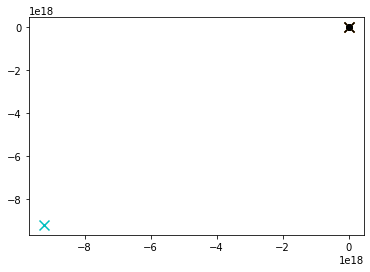

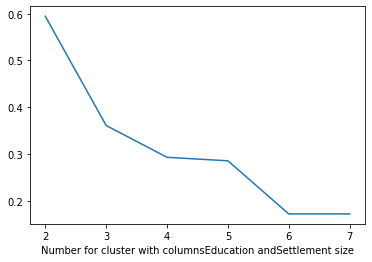

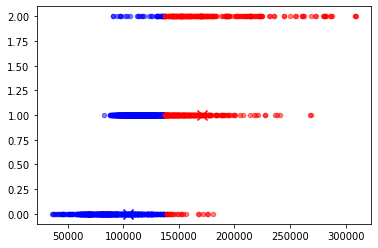

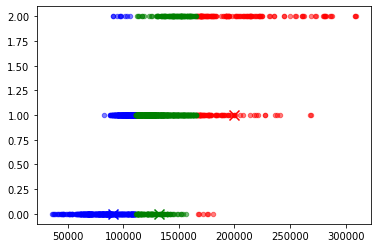

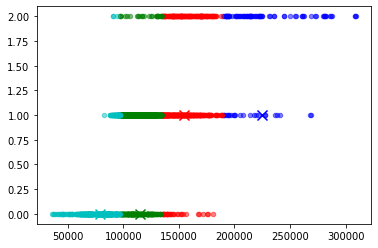

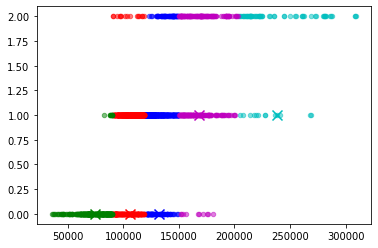

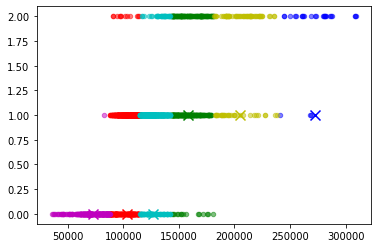

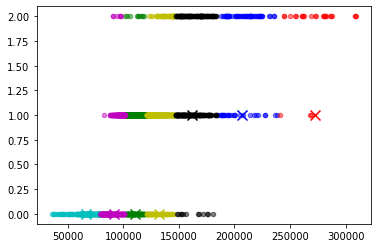

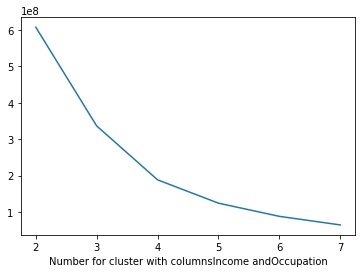

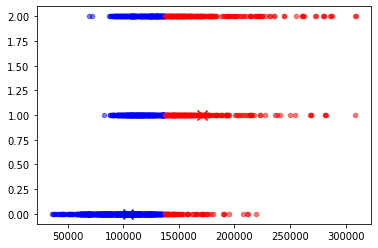

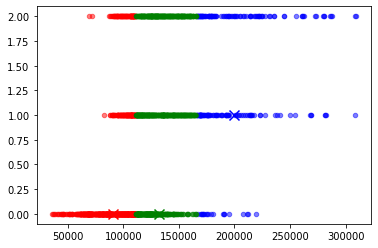

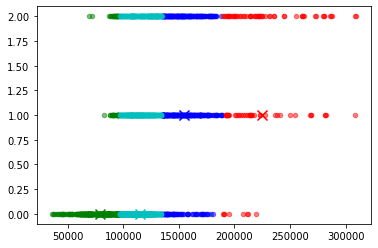

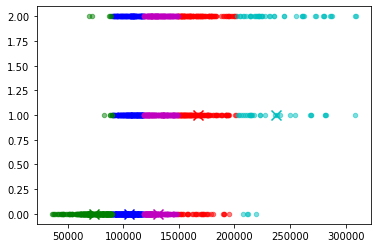

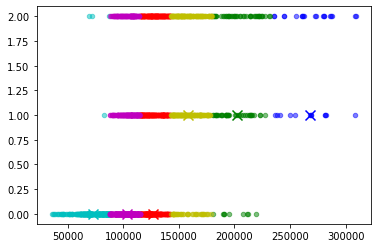

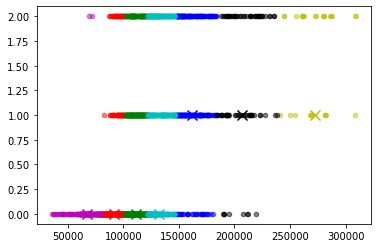

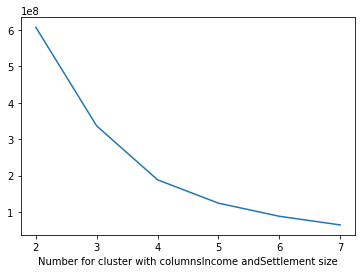

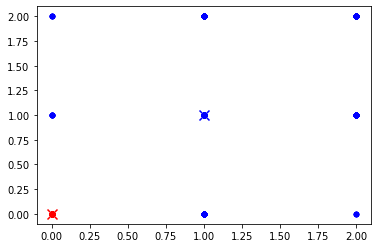

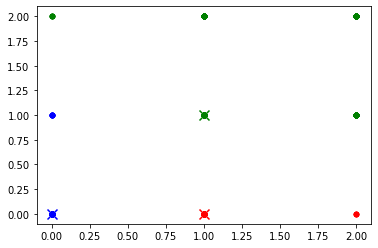

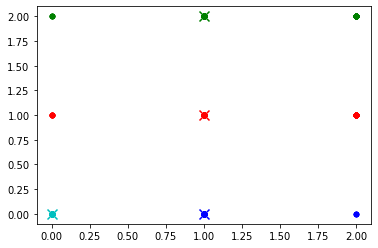

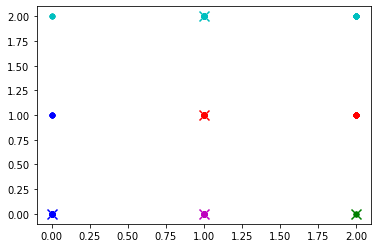

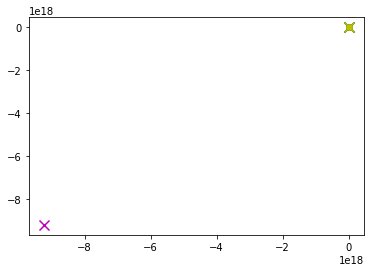

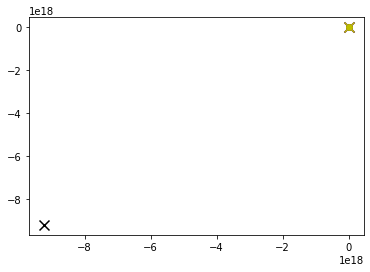

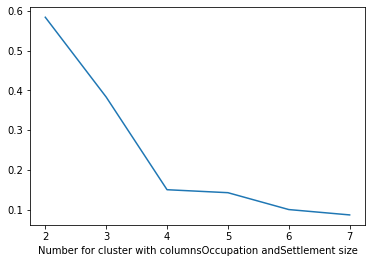

In [ ]:
#data columns ,ecludian,before normalization
import itertools as it
data1=list(it.combinations(data, 2))
print(list(data1[0]))
for i in data1:
    
    df=data[list(i)]
    
    k=[2,3,4,5,6,7]
    dist=[]

    for z in k:
 #print(z)
     labels,centers,df1,mindisto=GUC_Kmean(df.values,z, "Ecluidian_distance")
     plt.figure() 
     display_cluster(df.values,labels,centers,z)
     dist.append(mindisto)
    plt.figure() 
    strx=str("Number for cluster"+" "+"with columns"+i[0]+" and"+i[1])
    plt.xlabel(strx)
    plt.plot(k,dist)
#sex,marital status elbow point 4
#sex,age elbow point 4
#sex,education elbow point 6
#sex,income elbow point 4
#sex,occupation elbow point 5
#sex,settlement size elbow point 6
#marital status,age elbow point 4 or no ebow point
#marital status,education elbow point 5 
#marital status,income elbow point 4 or no elbow point
#marital status,occcupation no elbow point 
#marital status,settlement size elbow point 6
#age,education elbow point 4 or no elbow point
#age,income elbow point 4 or no elbow point
#age,occupation elbow point 4 or no elbow point
#age,settlement size elbow point 4 or no elbow point
#education,income elbow point 4 or no elbow point
#education,occupation elbow point 6 or no elbow point
#education,settlement size elbow point 6 
#income,occupation elbow point 4 or no elbow point
#income,settlement size elbow point 4 or no elbow point
#occupation,settlement size elbow point 4 or no elbow point









     

    


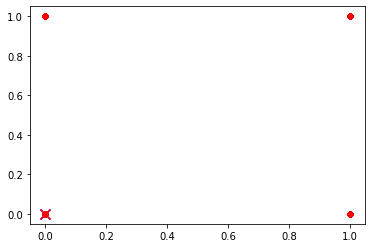

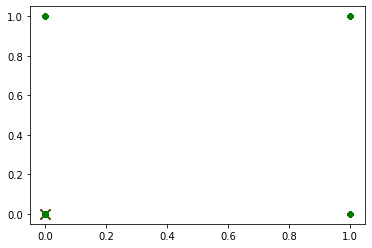

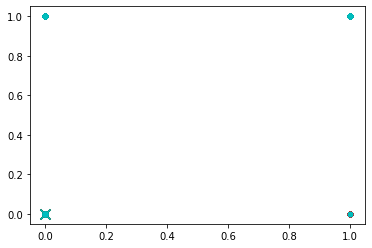

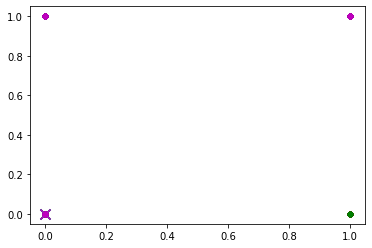

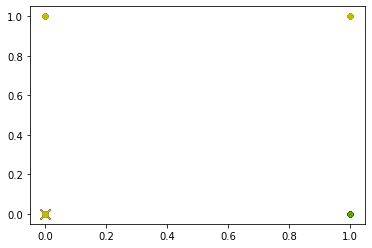

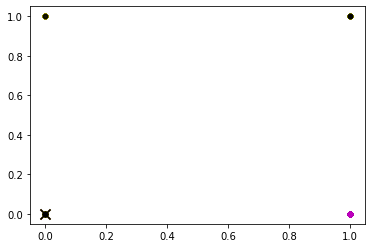

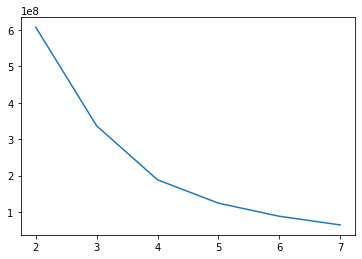

In [ ]:

k=[2,3,4,5,6,7]
dist=[]

for z in k:
 #print(z)
     labels,centers,df1,mindisto=GUC_Kmean(data.values,z, "Ecluidian_distance")
     plt.figure() 
     display_cluster(data.values,labels,centers,z)
     dist.append(mindisto)
plt.figure() 

plt.plot(k,dist)
#elbow point 4 
    

[[ 3.71558426e+03  3.07147829e+01]
 [ 2.98185794e+04 -1.70369432e+01]
 [-3.17444175e+04  1.64208040e+01]
 ...
 [-3.45544193e+04 -1.30665084e+00]
 [-2.29864201e+04 -9.49458301e+00]
 [-5.25384199e+04 -5.41988332e+00]]


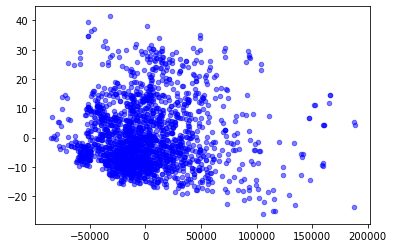

In [ ]:
pca = PCA(2)

df = pca.fit_transform(data)
print(df)
display_cluster(df)


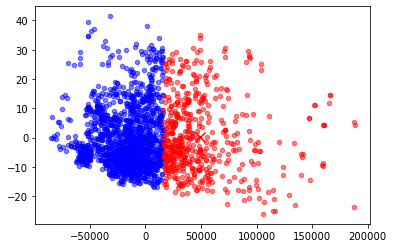

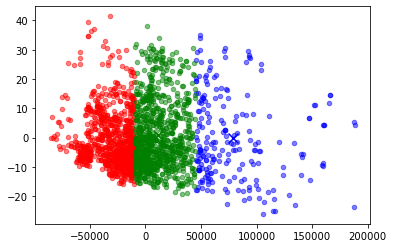

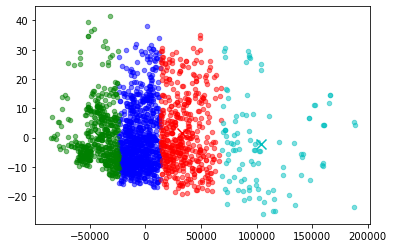

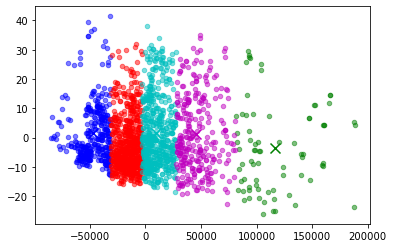

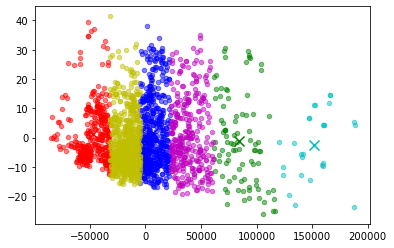

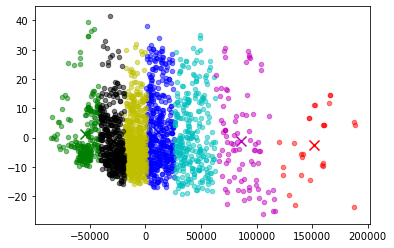

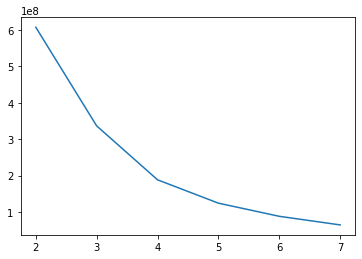

In [ ]:
#data,ecludian,pca
k=[2,3,4,5,6,7]
dist=[]

for z in k:
 #print(z)
 labels,centers,df1,mindisto=GUC_Kmean(df,z, "Ecluidian_distance")
 plt.figure() 
 display_cluster(df,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow is 4

In [ ]:
#normalizing age and income
from sklearn.preprocessing import MinMaxScaler
x1=pd.DataFrame(data[['Income', 'Age']])
scaler = MinMaxScaler()
#print(x1.head())
scaler.fit(x1)
X_scaled1 = scaler.transform(x1)
X_scaled1 = pd.DataFrame(X_scaled1, columns=["Income2","Age2"])
data["Income"]=X_scaled1["Income2"]
data["Age"]=X_scaled1["Age2"]
data.head()

Sex  Marital status       Age  Education    Income  Occupation  \
0    0               0  0.844828          2  0.324781           1   
1    1               1  0.068966          1  0.420210           1   
2    0               0  0.534483          1  0.195144           0   
3    0               0  0.465517          1  0.496223           1   
4    0               0  0.603448          1  0.413842           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

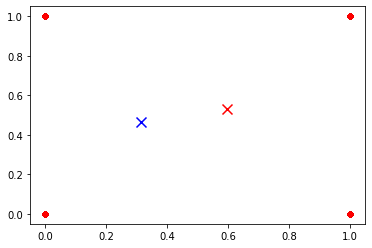

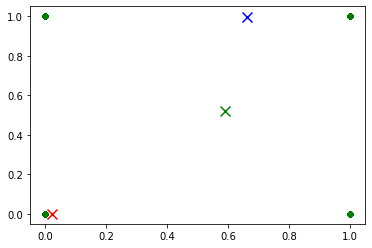

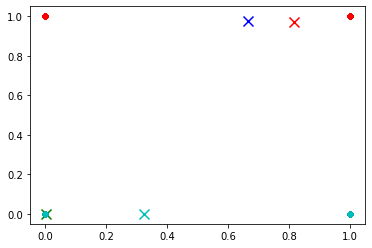

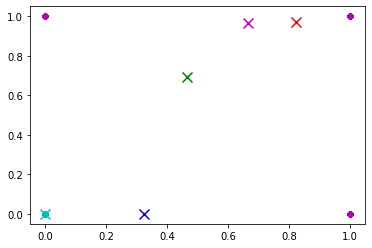

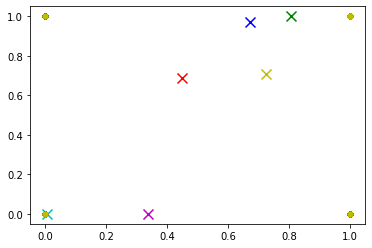

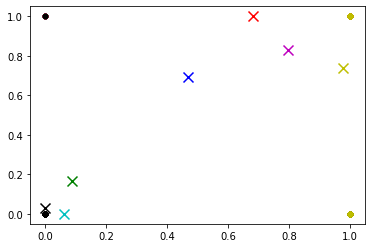

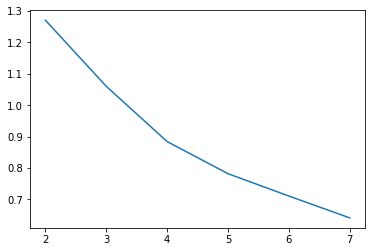

In [ ]:
#data after normalization

k=[2,3,4,5,6,7]
dist=[]

for z in k:
 #print(z)
     labels,centers,df1,mindisto=GUC_Kmean(data.values,z, "Ecluidian_distance")
     plt.figure() 
     display_cluster(data.values,labels,centers,z)
     dist.append(mindisto)
plt.figure() 

plt.plot(k,dist)

#elbow point 4 

['Sex', 'Marital status']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


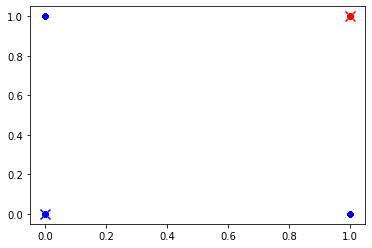

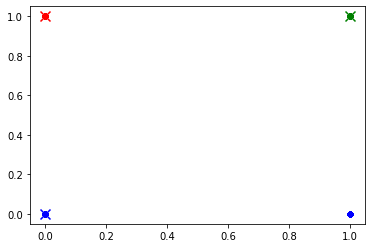

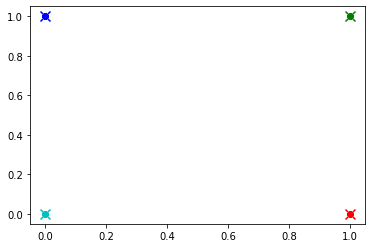

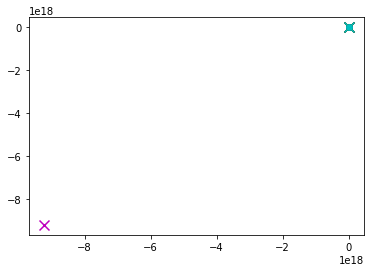

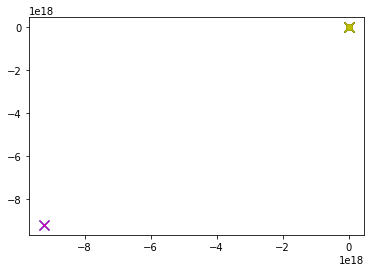

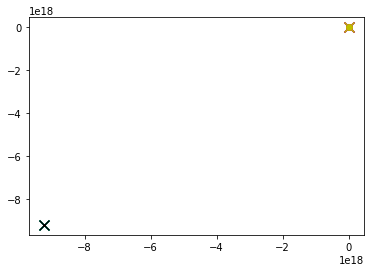

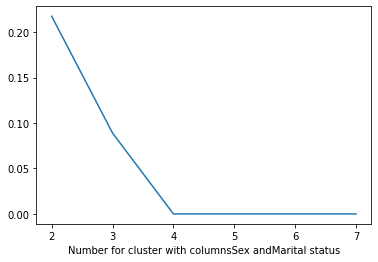

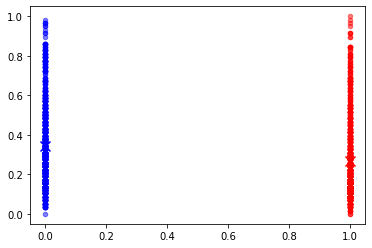

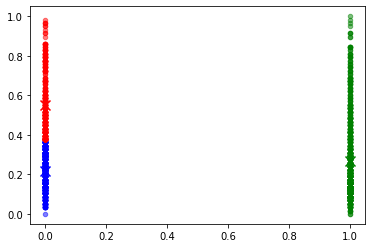

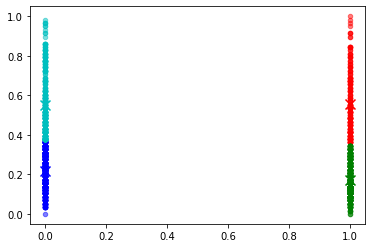

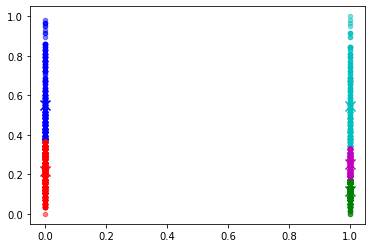

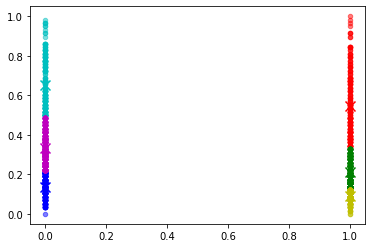

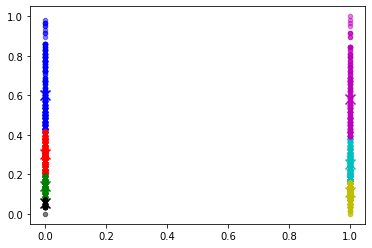

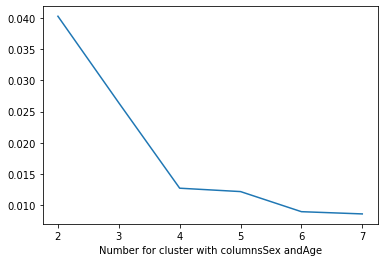

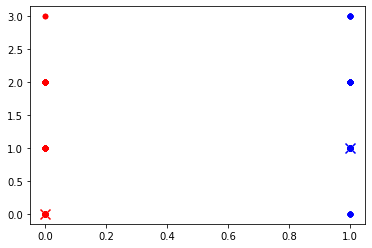

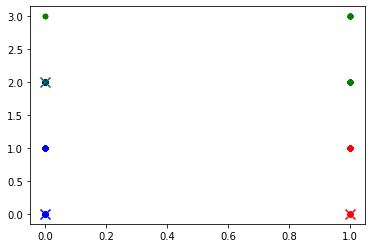

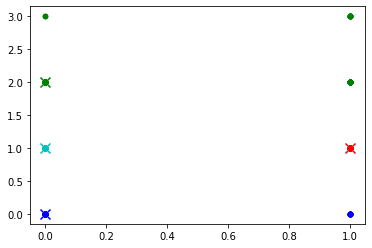

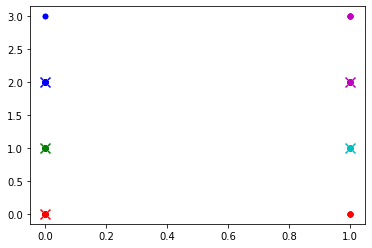

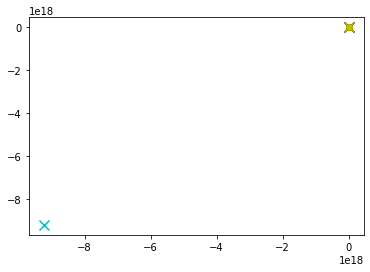

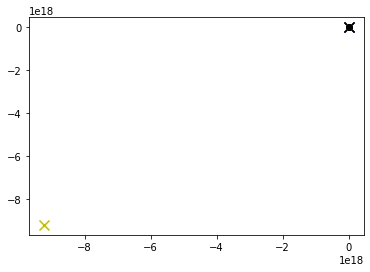

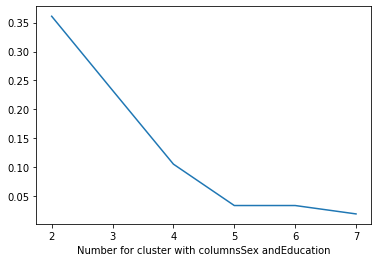

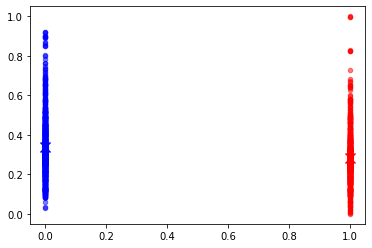

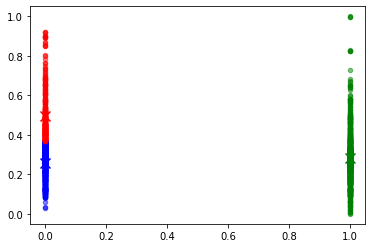

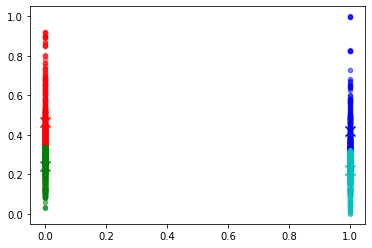

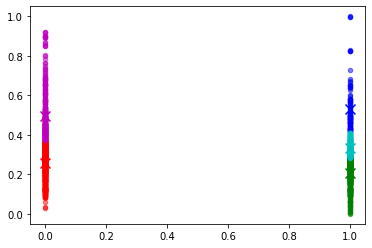

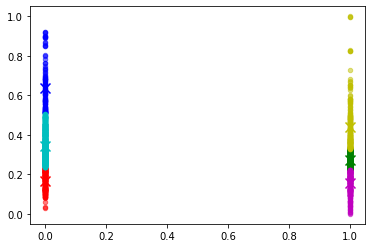

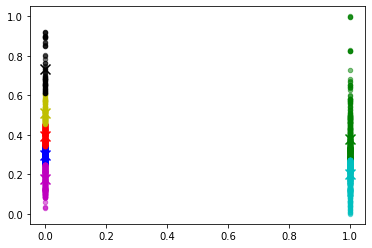

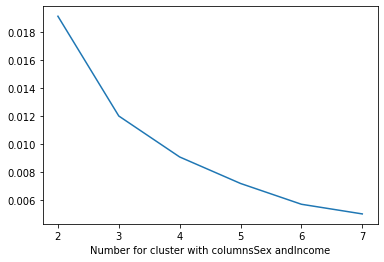

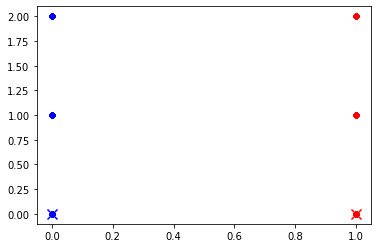

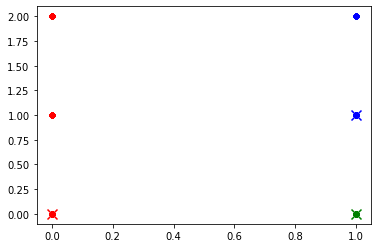

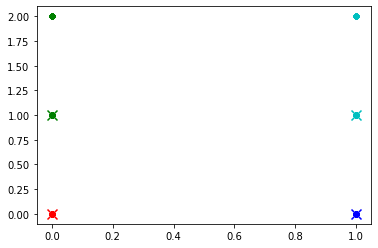

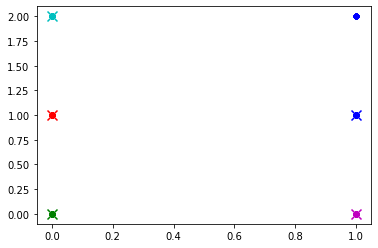

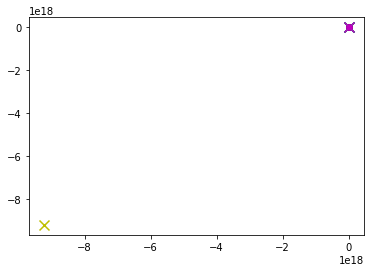

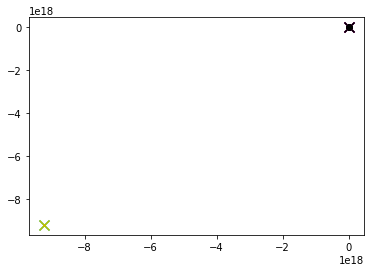

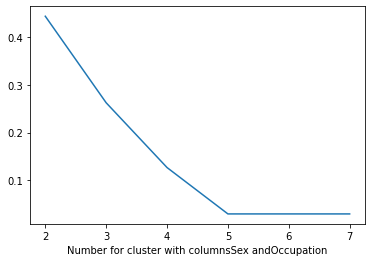

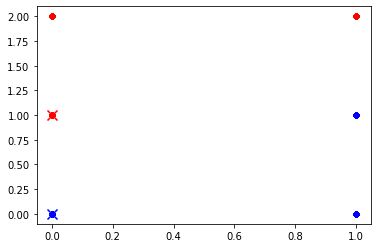

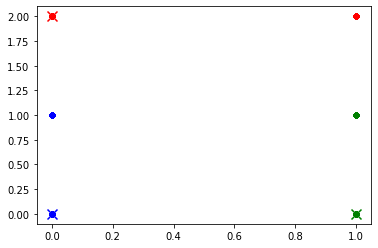

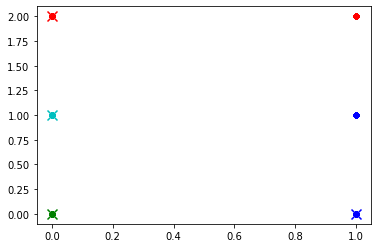

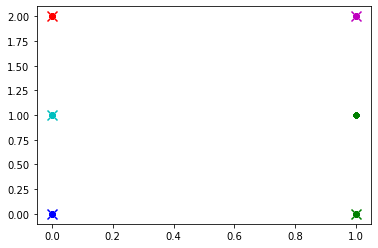

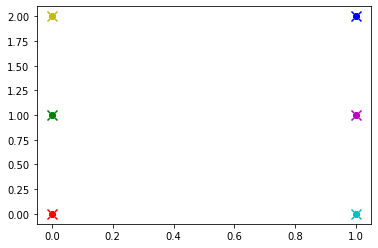

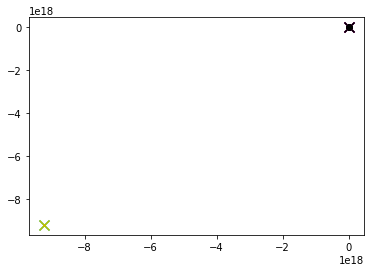

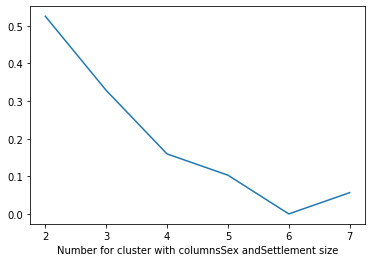

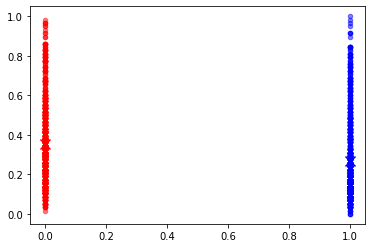

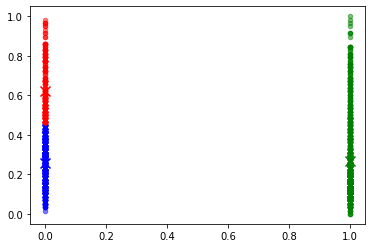

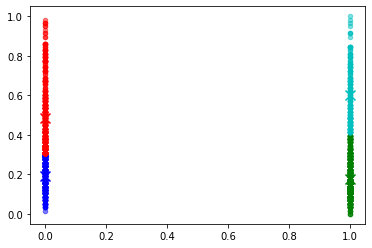

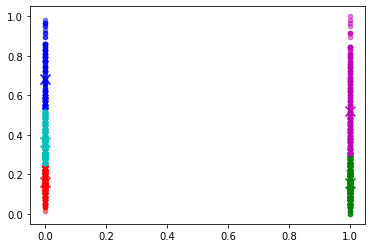

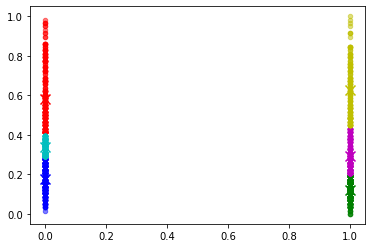

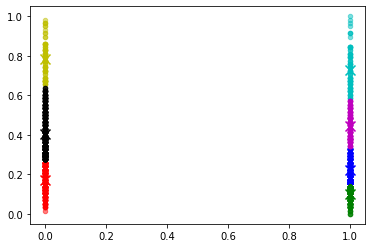

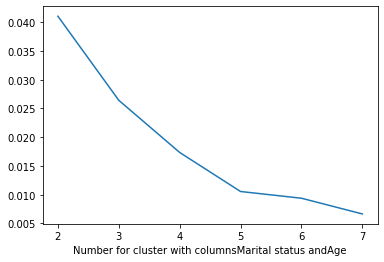

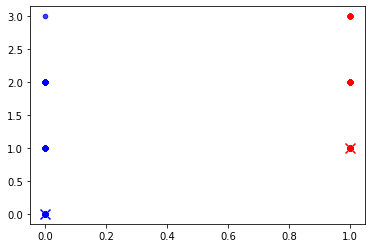

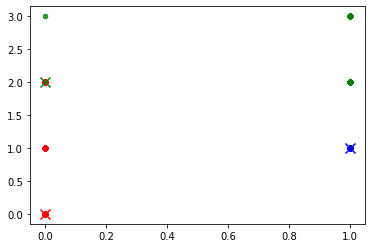

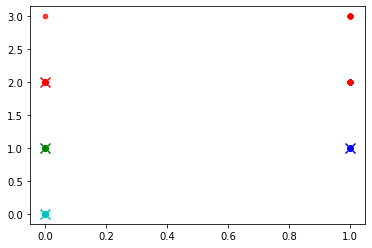

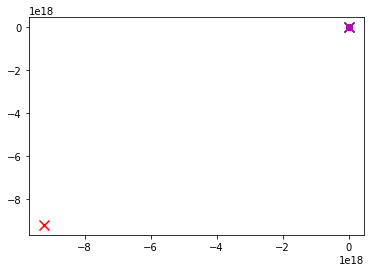

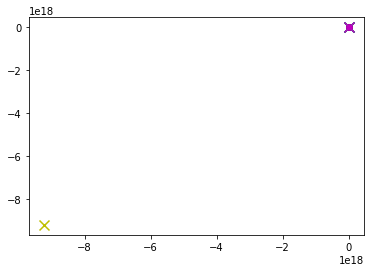

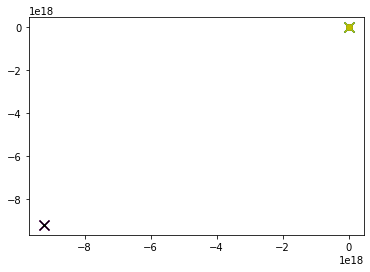

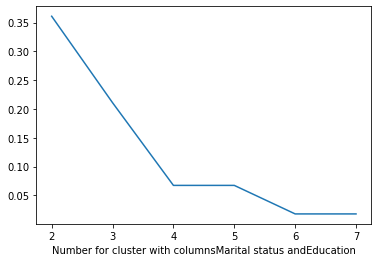

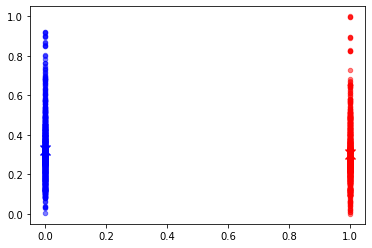

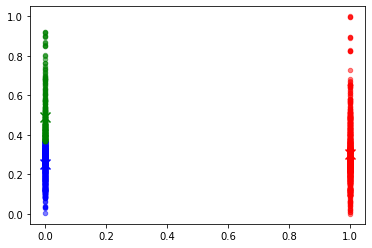

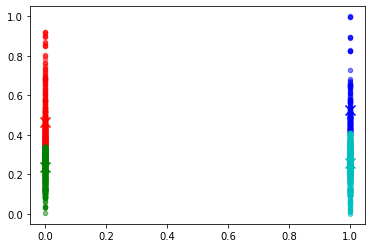

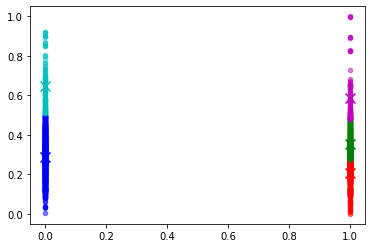

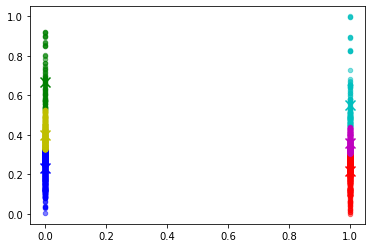

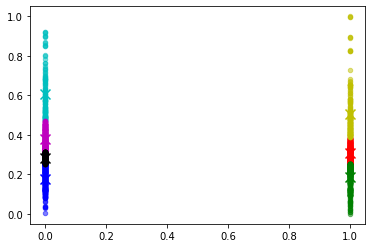

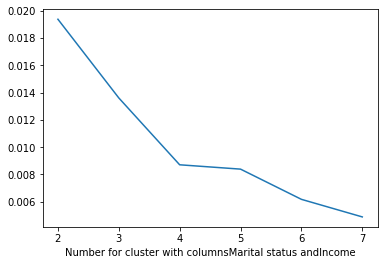

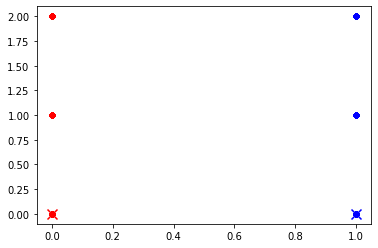

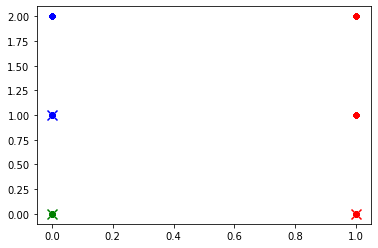

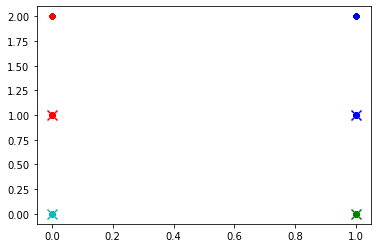

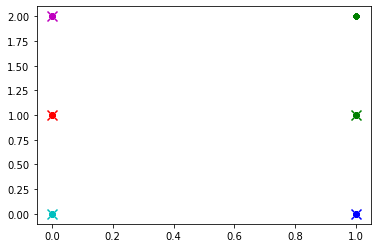

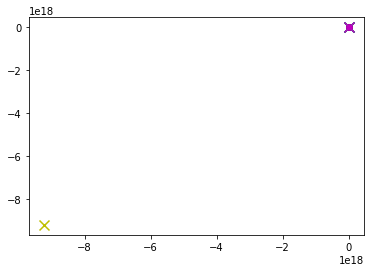

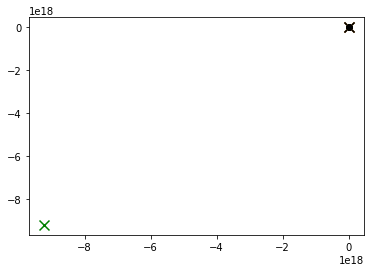

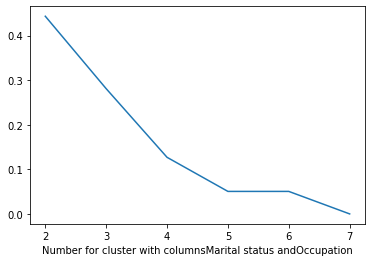

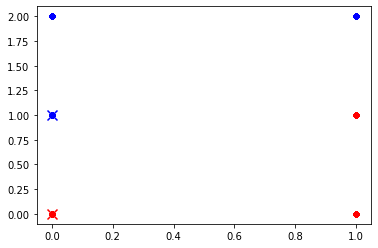

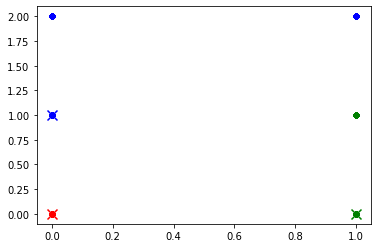

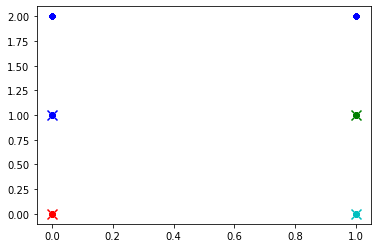

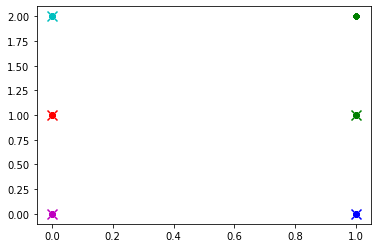

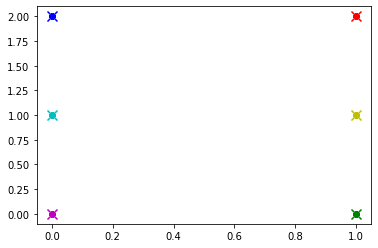

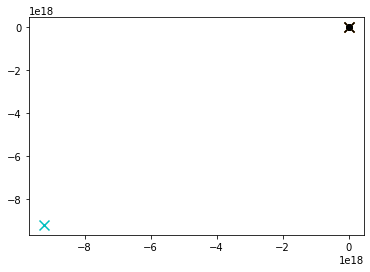

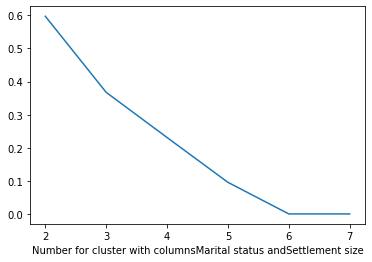

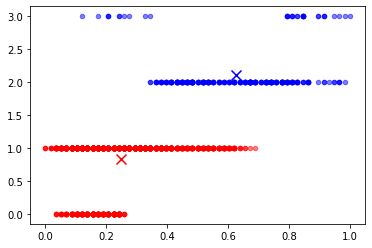

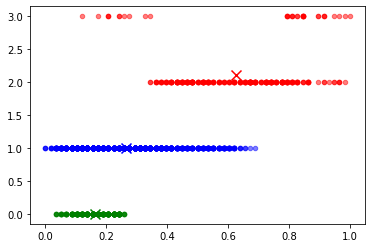

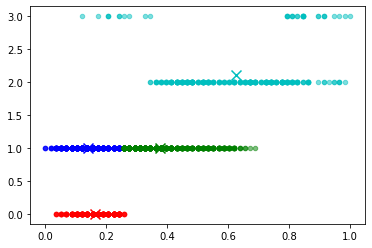

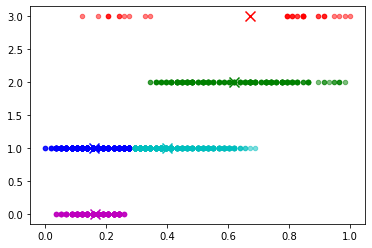

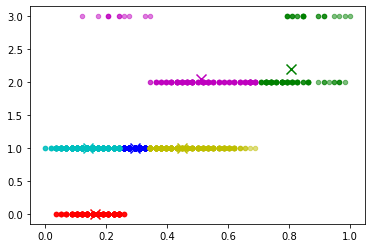

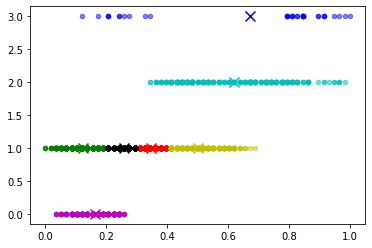

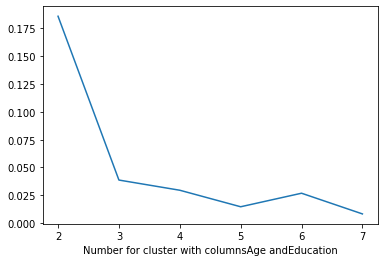

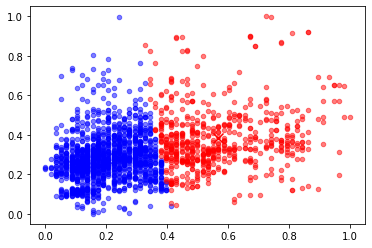

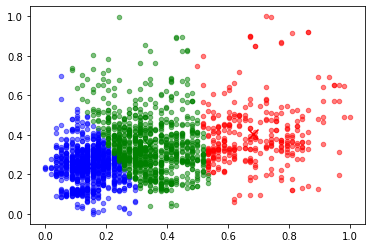

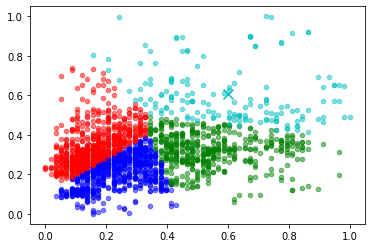

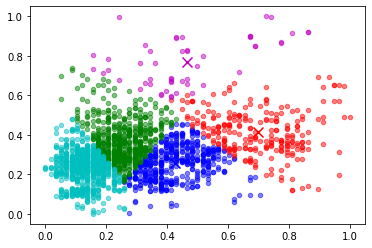

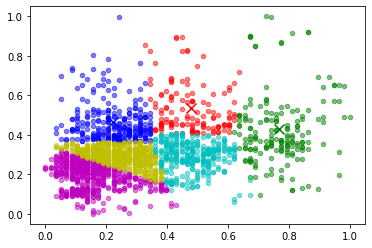

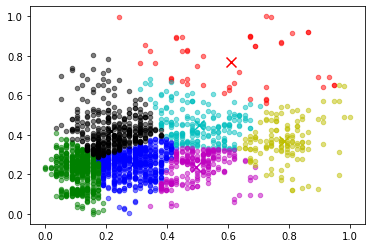

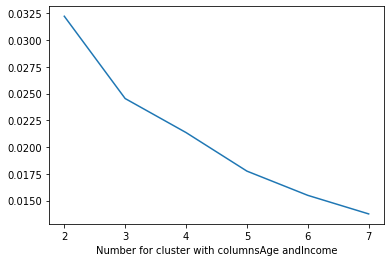

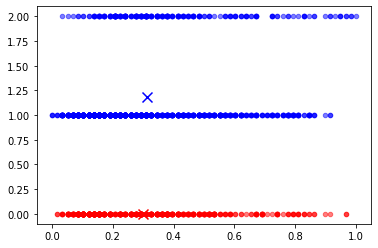

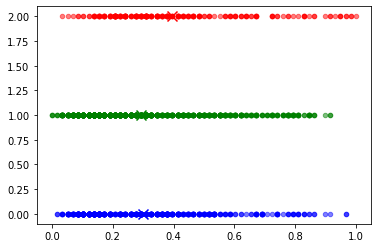

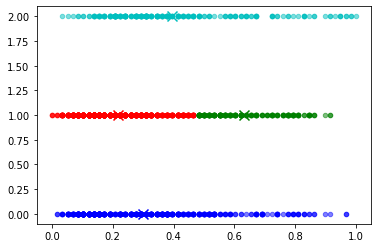

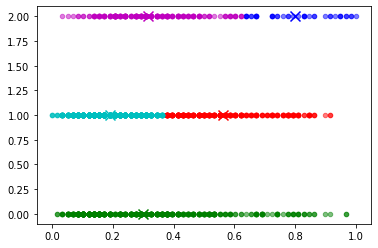

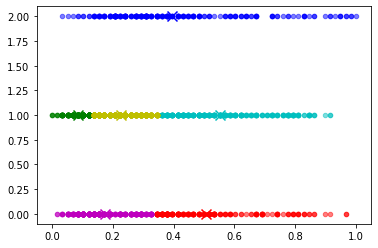

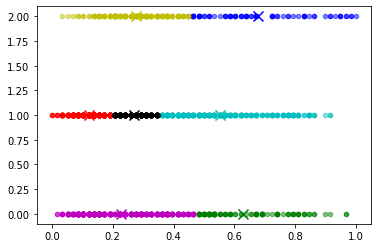

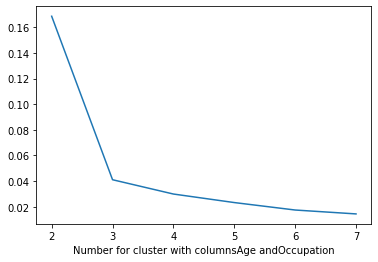

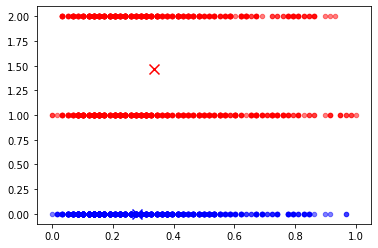

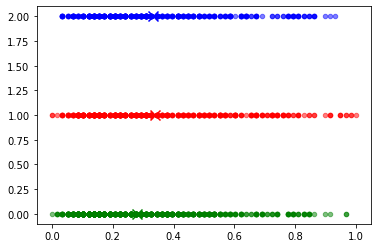

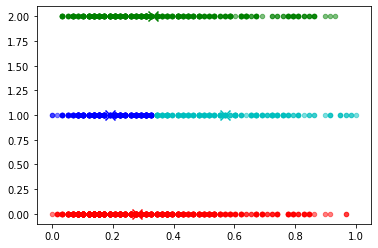

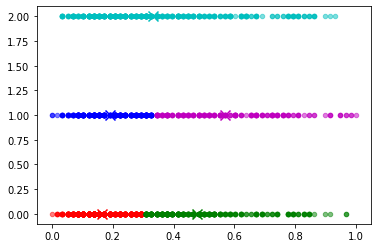

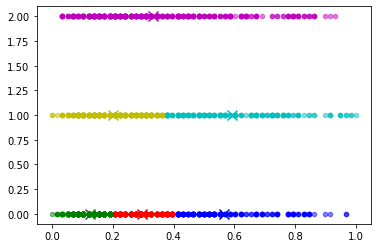

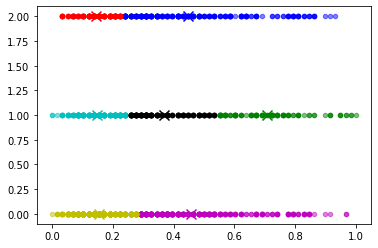

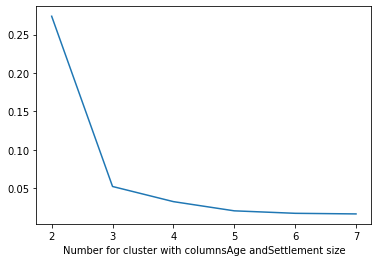

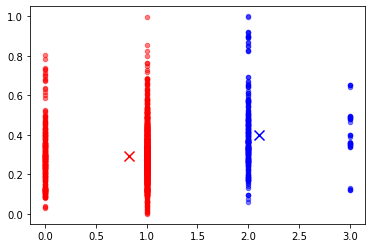

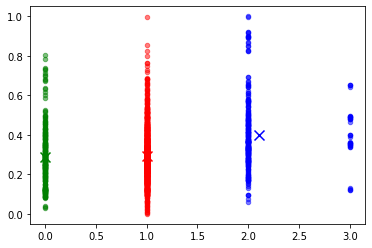

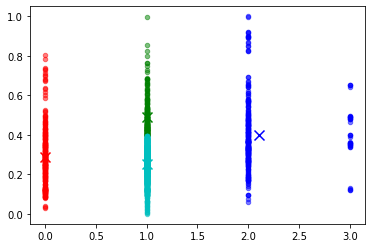

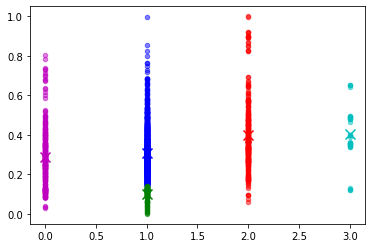

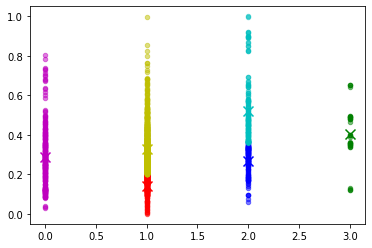

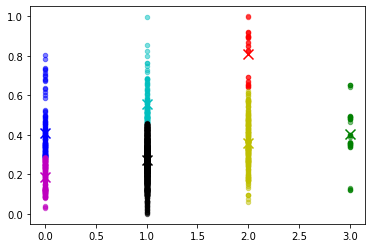

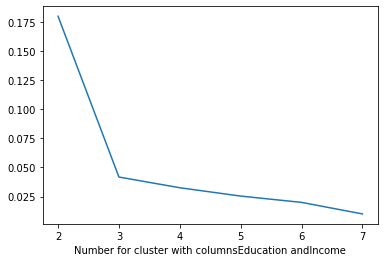

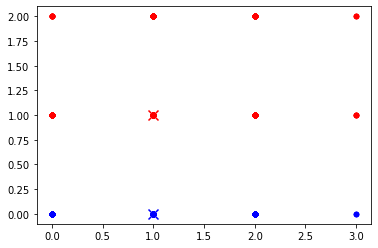

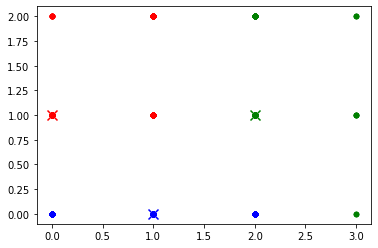

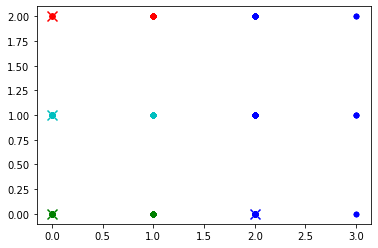

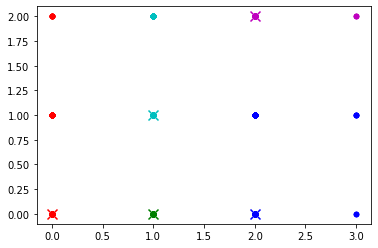

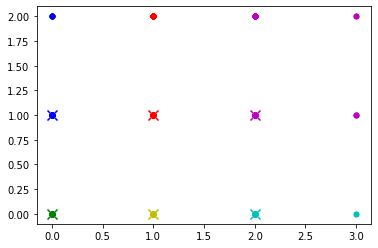

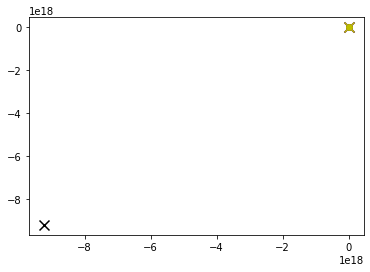

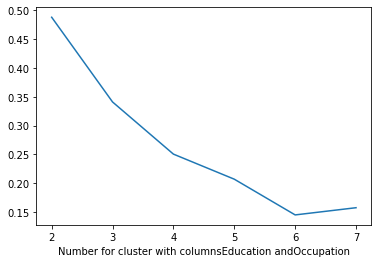

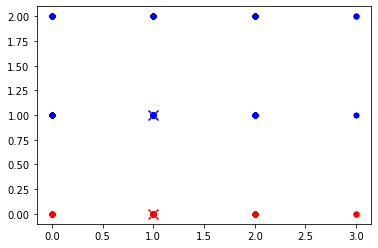

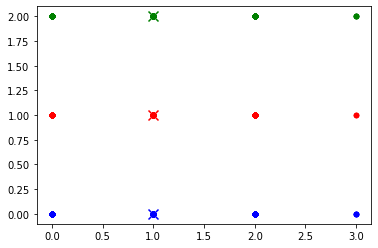

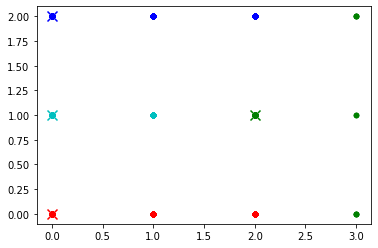

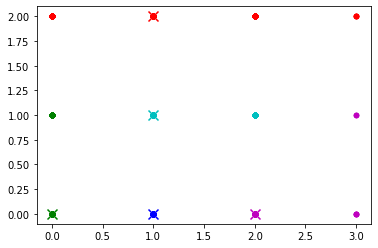

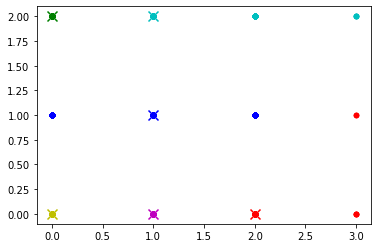

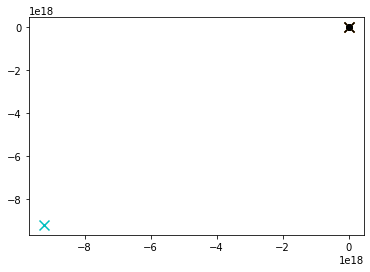

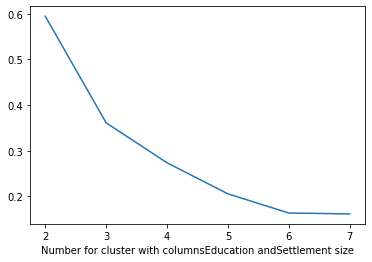

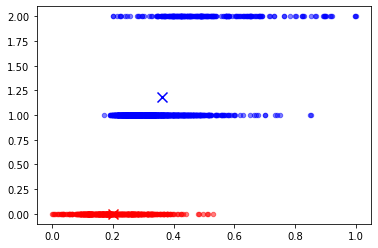

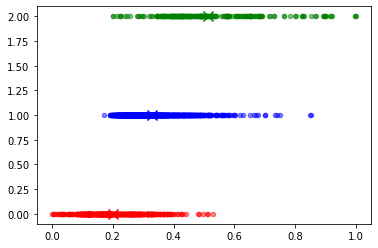

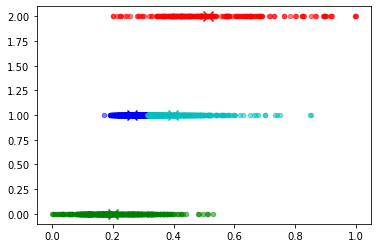

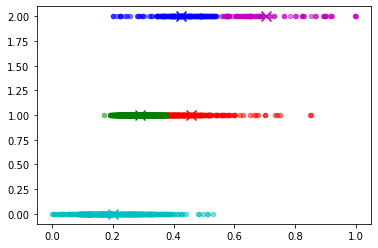

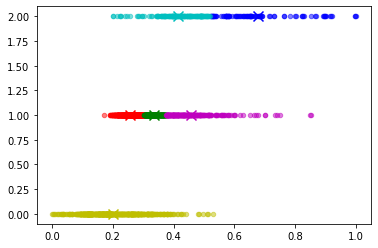

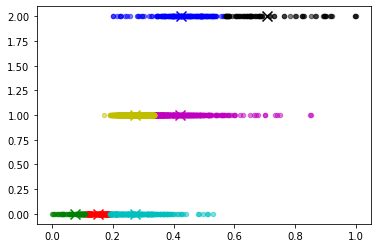

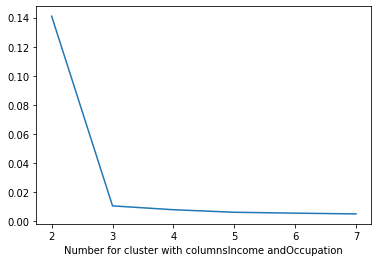

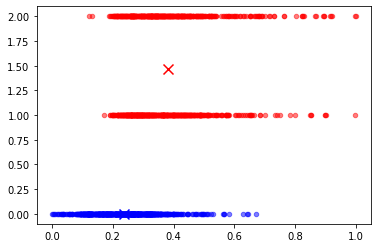

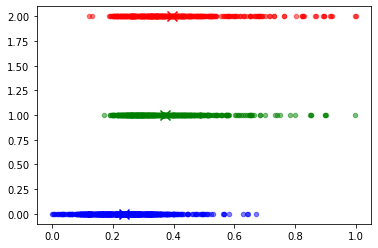

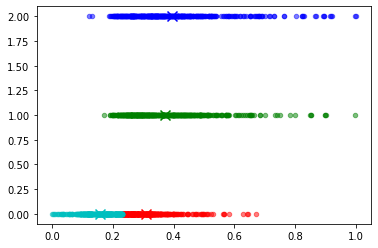

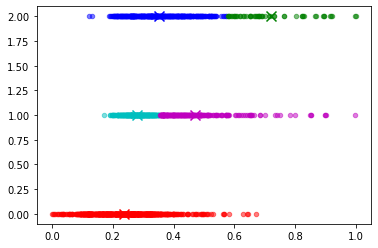

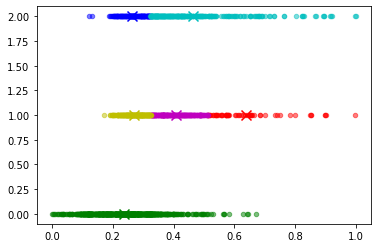

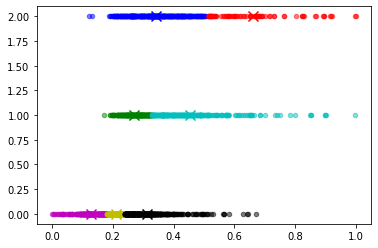

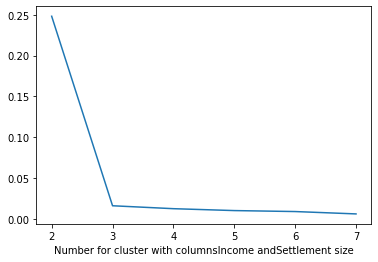

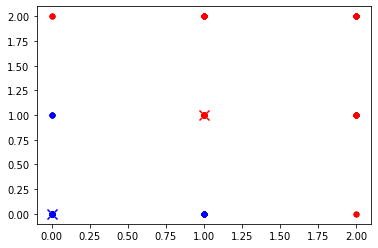

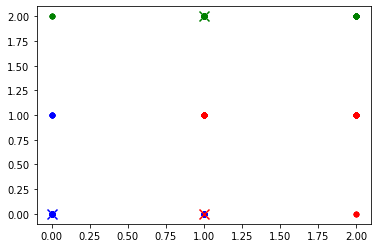

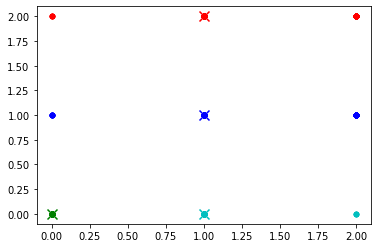

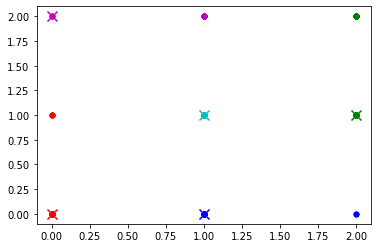

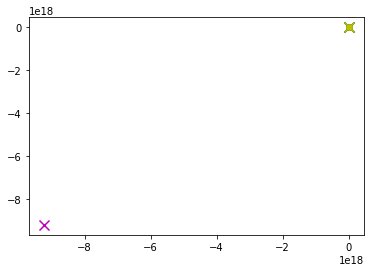

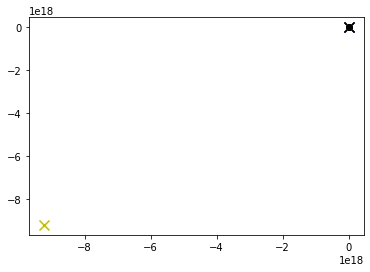

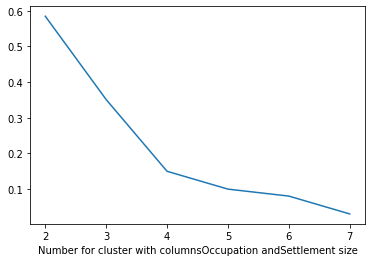

In [ ]:
#data every combination of 2 columns
import itertools as it
data1=list(it.combinations(data, 2))
print(list(data1[0]))
for i in data1:
    
    df=data[list(i)]
    
    k=[2,3,4,5,6,7]
    dist=[]

    for z in k:
 #print(z)
     labels,centers,df1,mindisto=GUC_Kmean(df.values,z, "Ecluidian_distance")
     plt.figure() 
     display_cluster(df.values,labels,centers,z)
     dist.append(mindisto)
    plt.figure() 
    strx=str("Number for cluster"+" "+"with columns"+i[0]+" and"+i[1])
    plt.xlabel(strx)
    plt.plot(k,dist)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


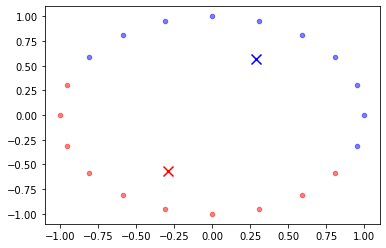

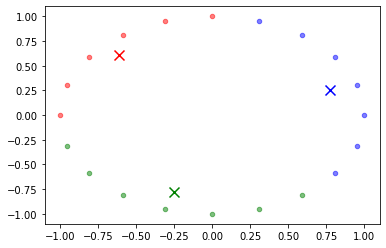

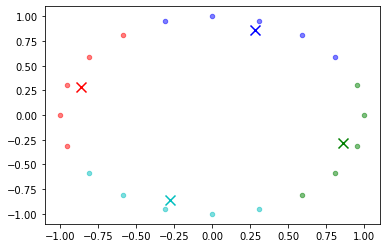

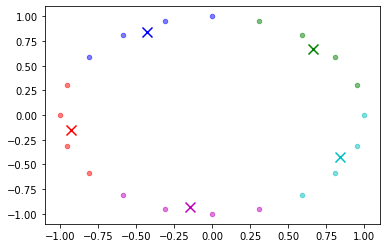

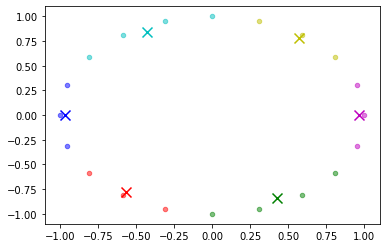

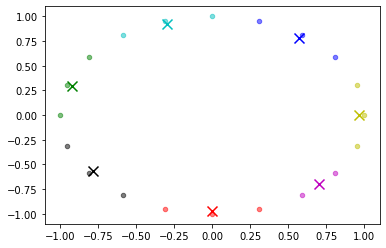

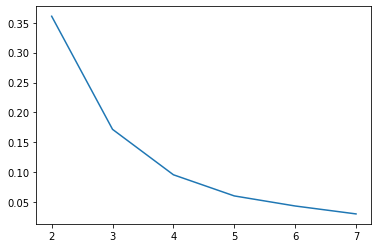

In [ ]:
#Ex1,pearsond
k=[2,3,4,5,6,7]
dist=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean(X,z, "pearsond")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point is 4 or no elbow point

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


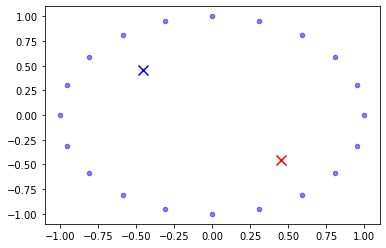

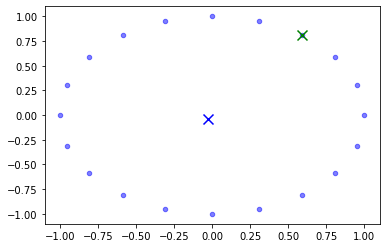

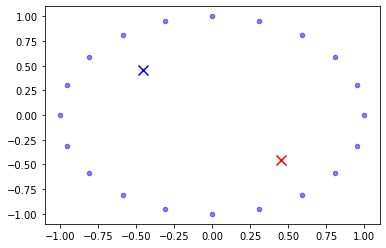

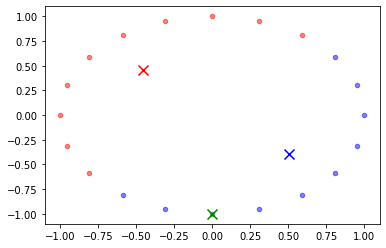

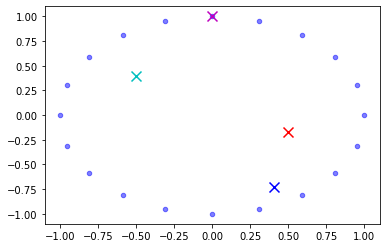

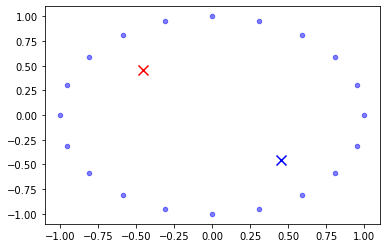

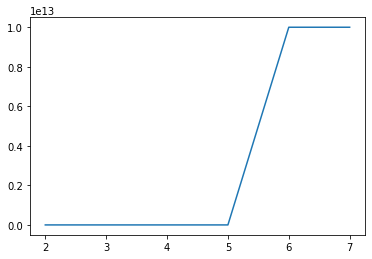

In [ ]:
#Ex1,pearson
k=[2,3,4,5,6,7]
dist=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for z in k:
 #print(z)
 labels,centers,mindisto=GUC_Kmean2(X,z, "pearson")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point is 4 or no elbow point

i
0
k
[2, 3, 4, 5, 6, 7]
cent
[[-1.00000000e+00  1.22464680e-16]
 [-3.09016994e-01  9.51056516e-01]]
i
1
k
[2, 3, 4, 5, 6, 7]
cent
[[ 0.58778525 -0.80901699]
 [ 0.80901699  0.58778525]]
i
2
k
[2, 3, 4, 5, 6, 7]
cent
[[ 0.80901699 -0.58778525]
 [ 1.          0.        ]]
i
3
k
[2, 3, 4, 5, 6, 7]
cent
[[ 0.95105652 -0.30901699]
 [ 0.30901699 -0.95105652]]
i
4
k
[2, 3, 4, 5, 6, 7]
cent
[[ 9.51056516e-01 -3.09016994e-01]
 [-1.00000000e+00  1.22464680e-16]]
i
5
k
[2, 3, 4, 5, 6, 7]
cent
[[0.80901699 0.58778525]
 [0.95105652 0.30901699]]
i
6
k
[2, 3, 4, 5, 6, 7]
cent
[[ 6.12323400e-17  1.00000000e+00]
 [-9.51056516e-01 -3.09016994e-01]]
i
7
k
[2, 3, 4, 5, 6, 7]
cent
[[-0.30901699 -0.95105652]
 [-0.58778525 -0.80901699]]
i
8
k
[2, 3, 4, 5, 6, 7]
cent
[[ 8.09016994e-01  5.87785252e-01]
 [-1.83697020e-16 -1.00000000e+00]]
i
9
k
[2, 3, 4, 5, 6, 7]
cent
[[-0.95105652 -0.30901699]
 [ 0.80901699 -0.58778525]]
i
10
k
[2, 3, 4, 5, 6, 7]
cent
[[-0.58778525 -0.80901699]
 [ 0.80901699 -0.58778525]]
i
11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Streaming output truncated to the last 5000 lines.
i
0
k
[2, 3, 4, 5, 6, 7]
cent
[[-3.09016994e-01 -9.51056516e-01]
 [-9.51056516e-01  3.09016994e-01]
 [-1.83697020e-16 -1.00000000e+00]]
i
1
k
[2, 3, 4, 5, 6, 7]
cent
[[-0.95105652 -0.30901699]
 [-0.30901699 -0.95105652]
 [-0.30901699  0.95105652]]
i
2
k
[2, 3, 4, 5, 6, 7]
cent
[[-9.51056516e-01 -3.09016994e-01]
 [ 9.51056516e-01  3.09016994e-01]
 [-1.00000000e+00  1.22464680e-16]]
i
3
k
[2, 3, 4, 5, 6, 7]
cent
[[-0.80901699 -0.58778525]
 [ 0.30901699  0.95105652]
 [-0.95105652  0.30901699]]
i
4
k
[2, 3, 4, 5, 6, 7]
cent
[[ 9.51056516e-01  3.09016994e-01]
 [-1.83697020e-16 -1.00000000e+00]
 [ 8.09016994e-01  5.87785252e-01]]
i
5
k
[2, 3, 4, 5, 6, 7]
cent
[[ 0.95105652  0.30901699]
 [-0.95105652  0.30901699]
 [-0.80901699  0.58778525]]
i
6
k
[2, 3, 4, 5, 6, 7]
cent
[[-0.95105652 -0.30901699]
 [ 0.58778525  0.80901699]
 [ 1.          0.        ]]
i
7
k
[2, 3, 4, 5, 6, 7]
cent
[[-1.00000000e+00  1.22464680e-16]
 [ 9.51056516e-01 -3.0901699

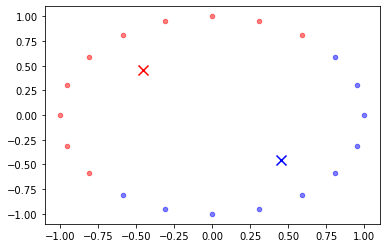

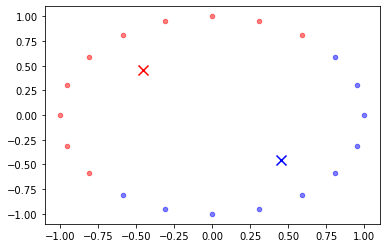

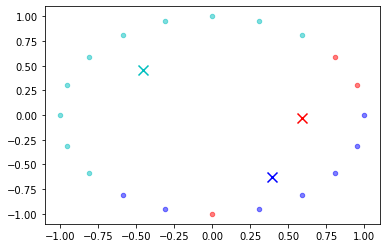

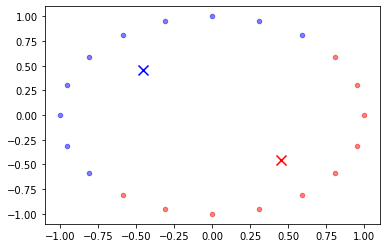

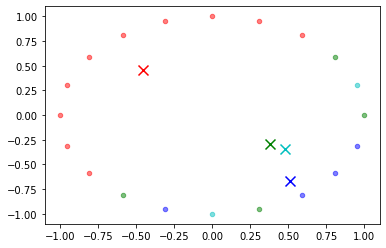

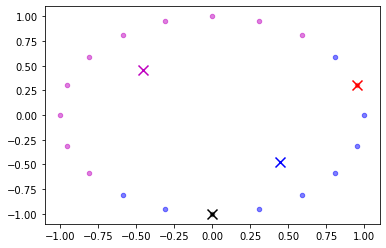

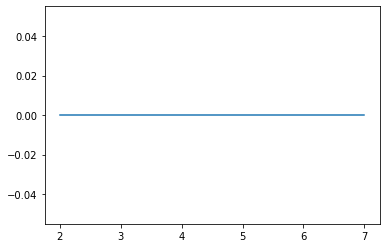

In [ ]:
#Ex1,pearsond,newkmeans
k=[2,3,4,5,6,7]
dist=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean(X,z, "pearson")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point is 4 or no elbow point

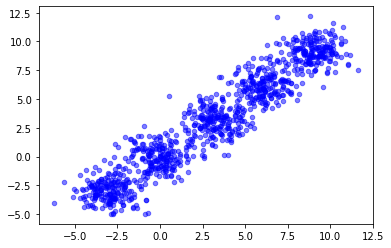

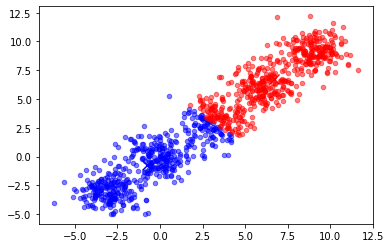

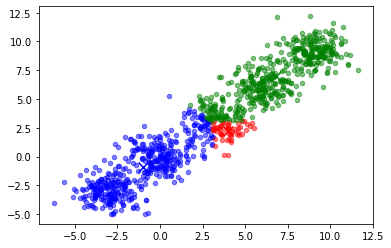

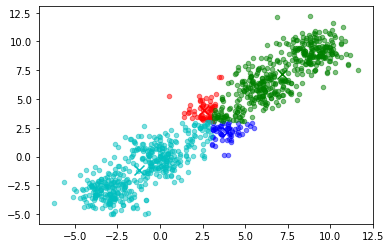

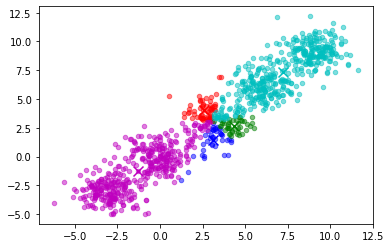

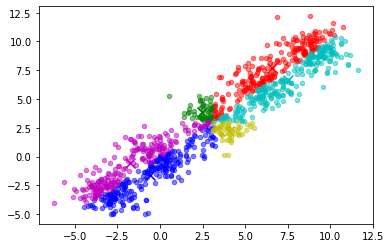

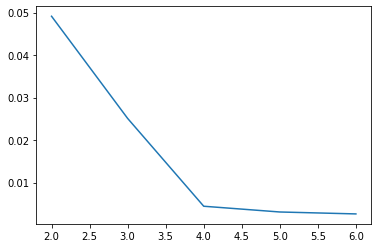

In [ ]:
#Ex2,pearsond
k=[2,3,4,5,6]
dist=[]
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean(X,z, "pearsond")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 4

i
0
k
[2, 3, 4, 5, 6]
cent
[[6.45588777 8.16500234]
 [8.35403582 8.20080799]]
i
1
k
[2, 3, 4, 5, 6]
cent
[[ 1.8820245   1.34542005]
 [-1.2899609  -1.29507877]]
i
2
k
[2, 3, 4, 5, 6]
cent
[[10.05605681  9.22323891]
 [ 3.02874482  4.27845186]]
i
3
k
[2, 3, 4, 5, 6]
cent
[[4.10552593 4.18703031]
 [9.54628425 9.00642227]]
i
4
k
[2, 3, 4, 5, 6]
cent
[[4.62809886 4.3864386 ]
 [8.07264687 9.23836898]]
i
5
k
[2, 3, 4, 5, 6]
cent
[[ 8.40433871 10.37443809]
 [-2.91295293 -3.29900735]]
i
6
k
[2, 3, 4, 5, 6]
cent
[[ 9.15985639  7.97232486]
 [-3.31526924 -2.24103078]]
i
7
k
[2, 3, 4, 5, 6]
cent
[[ 8.7610679   8.63317559]
 [-3.60170661 -1.14772182]]
i
8
k
[2, 3, 4, 5, 6]
cent
[[ 6.69638745  6.95530521]
 [-2.77254007 -1.69285725]]
i
9
k
[2, 3, 4, 5, 6]
cent
[[3.07888081 1.11957491]
 [9.95313663 9.28712417]]
i
10
k
[2, 3, 4, 5, 6]
cent
[[ 0.83033582 -0.85608383]
 [-4.10633497 -4.19620662]]
i
11
k
[2, 3, 4, 5, 6]
cent
[[1.7196956  3.87245733]
 [4.44697788 3.19655478]]
i
12
k
[2, 3, 4, 5, 6]
cent
[[9.40

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)



k
[2, 3, 4, 5, 6]
cent
[[9.7999419  7.38368939]
 [4.95308902 6.53665275]
 [5.35648177 6.92784013]]
i
87
k
[2, 3, 4, 5, 6]
cent
[[ 4.18947049  1.77239218]
 [10.87329778 10.08004807]
 [ 5.45375555  6.39180401]]
i
88
k
[2, 3, 4, 5, 6]
cent
[[6.17644156 5.63297216]
 [2.39863236 3.31978193]
 [7.19663149 5.3902171 ]]
i
89
k
[2, 3, 4, 5, 6]
cent
[[ 7.2210337   6.5820977 ]
 [-0.3357847   1.66902153]
 [-3.91942423 -1.45006559]]
i
90
k
[2, 3, 4, 5, 6]
cent
[[ 9.07543364  7.39803419]
 [-2.70387972 -2.73894473]
 [-2.97548983 -2.50200171]]
i
91
k
[2, 3, 4, 5, 6]
cent
[[-2.93571998 -4.07774478]
 [-3.03582604 -1.43535634]
 [ 5.00161456  6.3017919 ]]
i
92
k
[2, 3, 4, 5, 6]
cent
[[1.55115198 0.11567463]
 [3.22391413 4.36414043]
 [9.9983109  8.56837969]]
i
93
k
[2, 3, 4, 5, 6]
cent
[[ 4.42050425  2.42925371]
 [ 8.34592432  7.1693671 ]
 [-4.44808434 -4.40746377]]
i
94
k
[2, 3, 4, 5, 6]
cent
[[ 4.43745414  5.47094732]
 [ 6.63377688  6.4137991 ]
 [-0.84681754 -3.76734756]]
i
95
k
[2, 3, 4, 5, 6]
cent
[[-1

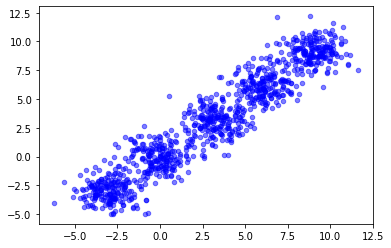

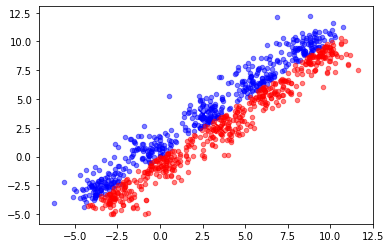

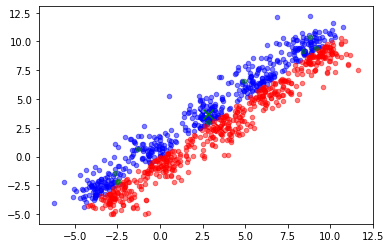

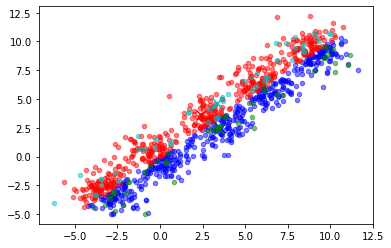

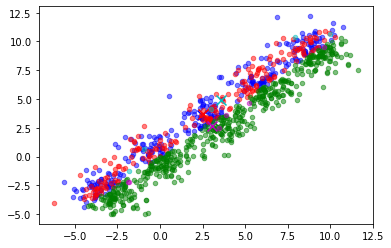

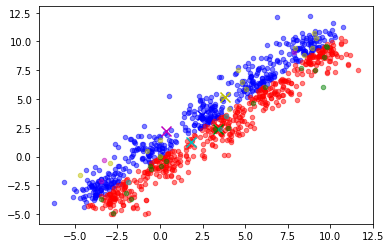

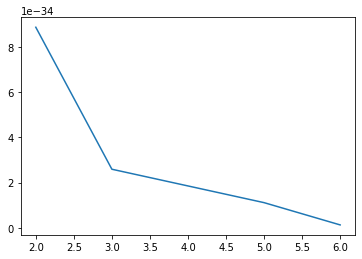

In [ ]:
#Ex2,pearsond
k=[2,3,4,5,6]
dist=[]
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean(X,z, "pearson")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 3

i
0
k
[2, 3, 4, 5, 6]
cent
[[ 0.33760266 -0.41187697]
 [ 8.57069778  8.30757902]]
i
1
k
[2, 3, 4, 5, 6]
cent
[[ 5.97497304  6.8177663 ]
 [10.00058232  8.32937979]]
i
2
k
[2, 3, 4, 5, 6]
cent
[[9.48473282 8.15364335]
 [1.70531852 4.16082679]]
i
3
k
[2, 3, 4, 5, 6]
cent
[[-1.41398318 -4.2378155 ]
 [ 6.94955414  4.51510203]]
i
4
k
[2, 3, 4, 5, 6]
cent
[[0.38019785 0.61058575]
 [1.90372491 1.55994912]]
i
5
k
[2, 3, 4, 5, 6]
cent
[[-2.42910949 -1.86443436]
 [-3.54438272 -2.88907741]]
i
6
k
[2, 3, 4, 5, 6]
cent
[[ 5.87905185  6.41953244]
 [-0.4593609  -0.84984437]]
i
7
k
[2, 3, 4, 5, 6]
cent
[[ 4.44697788  3.19655478]
 [-2.8009403  -3.60021688]]
i
8
k
[2, 3, 4, 5, 6]
cent
[[3.17989415 4.39200229]
 [4.38215899 3.64870989]]
i
9
k
[2, 3, 4, 5, 6]
cent
[[ 5.06066461  5.85591244]
 [10.17312464  9.36964219]]
i
10
k
[2, 3, 4, 5, 6]
cent
[[5.98469015 6.5792915 ]
 [9.33848384 8.70459859]]
i
11
k
[2, 3, 4, 5, 6]
cent
[[4.57818933 7.50133365]
 [4.50075979 3.85022174]]
i
12
k
[2, 3, 4, 5, 6]
cent
[[ 4.7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


i
75
k
[2, 3, 4, 5, 6]
cent
[[-0.26987494 -0.97876372]
 [ 4.846637    1.92991523]
 [ 5.3904878   5.8130287 ]
 [-2.20896805 -3.90938745]]
i
76
k
[2, 3, 4, 5, 6]
cent
[[-3.03582604 -1.43535634]
 [ 7.49268857  5.7288764 ]
 [-3.10876015 -2.59828828]
 [ 1.97876718  3.70835645]]
i
77
k
[2, 3, 4, 5, 6]
cent
[[ 4.20650897  2.18306433]
 [ 4.47654035  4.38009135]
 [10.63996453  9.74212749]
 [ 3.68189149  4.84670733]]
i
78
k
[2, 3, 4, 5, 6]
cent
[[-1.59720569 -4.40185106]
 [ 0.83033582 -0.85608383]
 [ 9.08243975  7.5424485 ]
 [ 8.52616065  8.98554773]]
i
79
k
[2, 3, 4, 5, 6]
cent
[[ 3.84064355  2.34737602]
 [ 5.83287829  6.28257995]
 [ 4.89663339  3.84710941]
 [-2.17458365 -2.18649036]]
i
80
k
[2, 3, 4, 5, 6]
cent
[[6.04381147 5.852998  ]
 [8.46467181 8.90946672]
 [7.02406253 6.59252695]
 [2.37623104 4.91403135]]
i
81
k
[2, 3, 4, 5, 6]
cent
[[ 6.11958037  5.02693106]
 [ 7.28975275  6.67318135]
 [-2.67591603 -3.38508228]
 [-2.52676238 -3.07282891]]
i
82
k
[2, 3, 4, 5, 6]
cent
[[-3.79252074 -3.1147

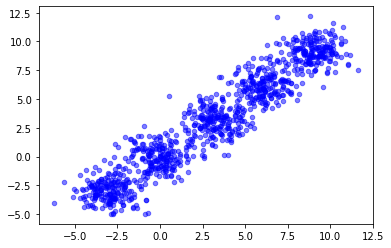

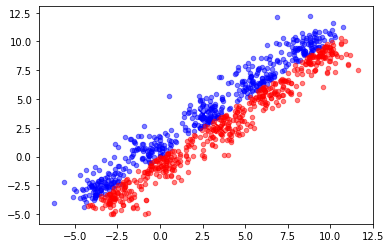

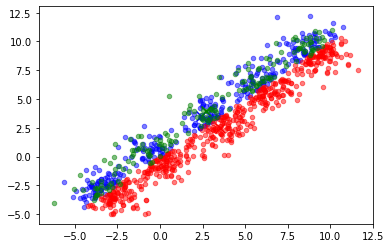

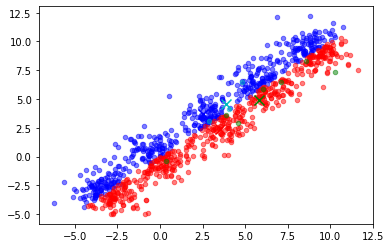

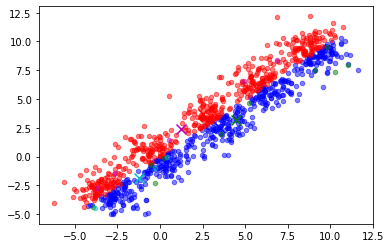

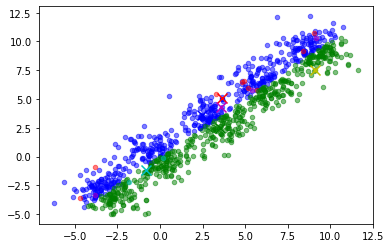

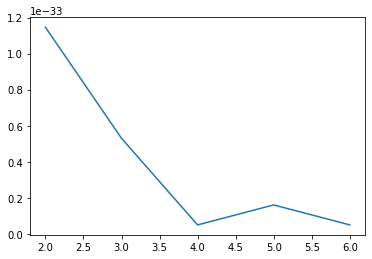

In [ ]:
#Ex2,pearson
k=[2,3,4,5,6]
dist=[]
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean(X,z, "pearson")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 3

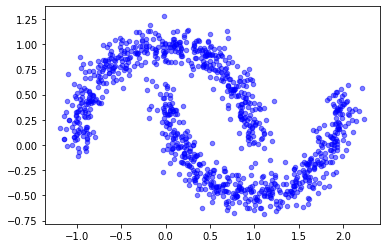

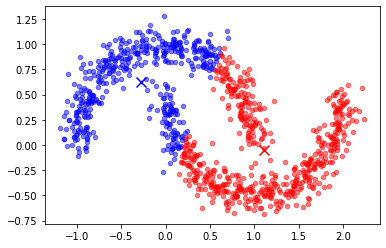

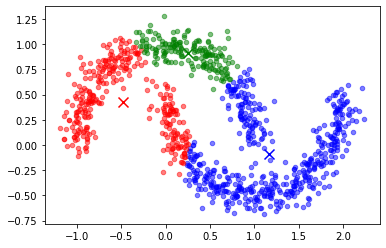

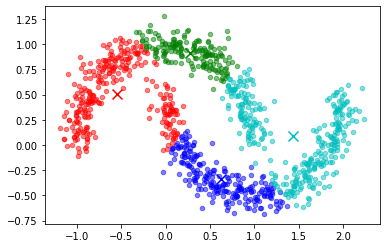

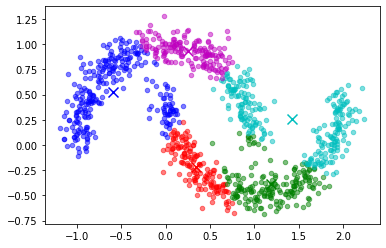

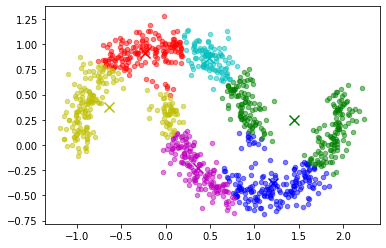

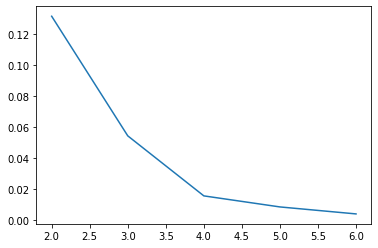

In [ ]:
#ex3,pearsond
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
k=[2,3,4,5,6]
dist=[]
display_cluster(X)
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean(X,z, "pearsond")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 4

i
0
k
[2, 3, 4, 5, 6]
cent
[[ 0.68912331 -0.3439544 ]
 [ 2.00803298  0.12927252]]
i
1
k
[2, 3, 4, 5, 6]
cent
[[-0.60800841  0.63033099]
 [ 0.70292582 -0.16229442]]
i
2
k
[2, 3, 4, 5, 6]
cent
[[ 1.4277948  -0.33767509]
 [ 0.09038646  0.00640241]]
i
3
k
[2, 3, 4, 5, 6]
cent
[[ 2.07900666  0.17550947]
 [-0.27044555  1.02145133]]
i
4
k
[2, 3, 4, 5, 6]
cent
[[ 0.51469023 -0.44711655]
 [ 1.45342413 -0.19985664]]
i
5
k
[2, 3, 4, 5, 6]
cent
[[ 0.03266206  0.86464979]
 [ 0.40200618 -0.21063455]]
i
6
k
[2, 3, 4, 5, 6]
cent
[[ 0.47537498 -0.3090661 ]
 [-0.43643995  0.74361264]]
i
7
k
[2, 3, 4, 5, 6]
cent
[[ 1.99623305  0.35821736]
 [-0.69928895  0.74516276]]
i
8
k
[2, 3, 4, 5, 6]
cent
[[ 6.04193535e-04  3.91894694e-01]
 [ 1.37595073e+00 -4.68803312e-01]]
i
9
k
[2, 3, 4, 5, 6]
cent
[[-0.19306892  1.12008283]
 [ 0.13722456 -0.03626457]]
i
10
k
[2, 3, 4, 5, 6]
cent
[[ 0.31714883 -0.27909714]
 [-0.19590485  1.21910919]]
i
11
k
[2, 3, 4, 5, 6]
cent
[[ 0.99443499  0.17830667]
 [ 1.38067723 -0.48757912]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


i
6
k
[2, 3, 4, 5, 6]
cent
[[ 0.90265667  0.33492718]
 [-0.85591037  0.55982024]
 [ 0.90981365  0.18106003]
 [-0.79060665  0.49663259]
 [ 1.13944152 -0.42789116]]
i
7
k
[2, 3, 4, 5, 6]
cent
[[ 0.65983789 -0.56109071]
 [ 0.28813589  0.99497078]
 [ 1.92465019 -0.02934814]
 [ 0.79688371  0.76430379]
 [ 1.28239659 -0.6979362 ]]
i
8
k
[2, 3, 4, 5, 6]
cent
[[-0.29031726  0.95168542]
 [-0.77236804  0.33963813]
 [ 0.72433634  0.51917152]
 [ 1.63280091 -0.33840486]
 [ 1.69667122 -0.23121196]]
i
9
k
[2, 3, 4, 5, 6]
cent
[[-0.30712941  0.82574482]
 [ 1.60187923 -0.11935964]
 [ 1.61995383 -0.39383432]
 [ 0.73395503 -0.54655092]
 [-0.03685077  0.01215361]]
i
10
k
[2, 3, 4, 5, 6]
cent
[[-1.07475197  0.38152378]
 [-0.92887806  0.48737641]
 [ 0.31375053  0.87333696]
 [ 1.99156361  0.09604547]
 [ 1.78350673 -0.0280862 ]]
i
11
k
[2, 3, 4, 5, 6]
cent
[[-0.63697015  0.99407162]
 [-0.00771647  0.92311649]
 [ 1.93637095  0.21144593]
 [ 0.27727254  0.95417989]
 [ 1.93226284  0.21028838]]
i
12
k
[2, 3, 4, 5, 

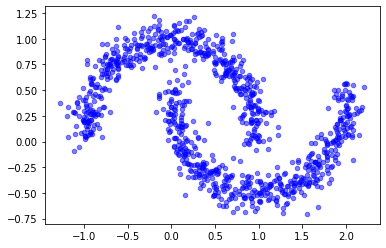

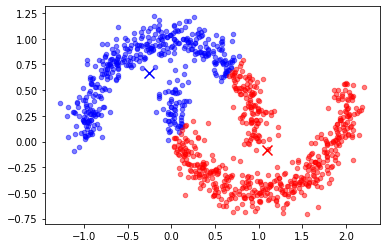

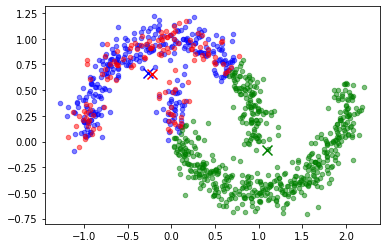

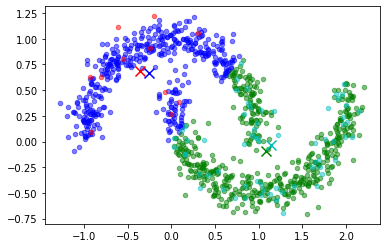

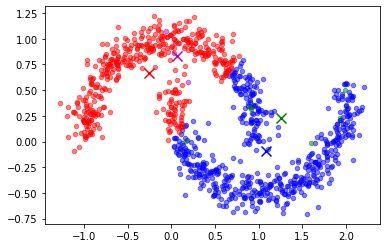

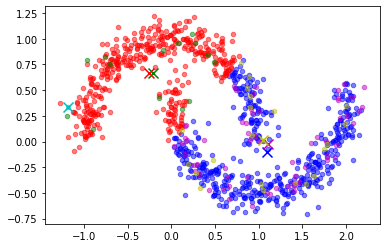

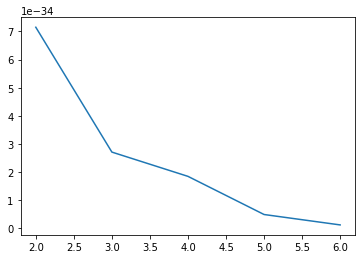

In [ ]:
#ex3,pearsond
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
k=[2,3,4,5,6]
dist=[]
display_cluster(X)
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean(X,z, "pearson")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 3

In [ ]:
data=pd.read_csv("/content/Customerdata.csv")
del data['ID']
data.head()


Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1

['Sex', 'Marital status']
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7
2
3
4
5
6
7


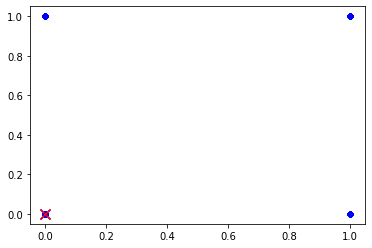

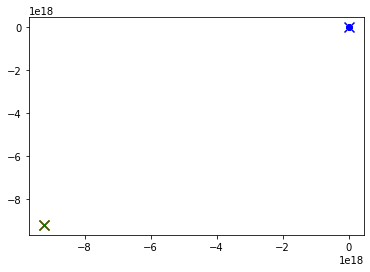

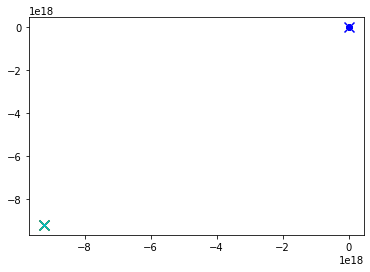

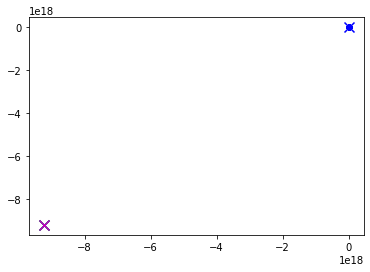

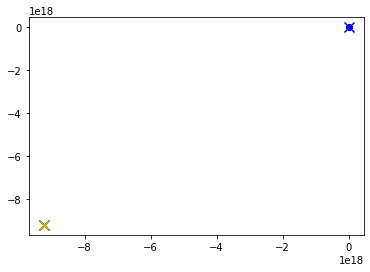

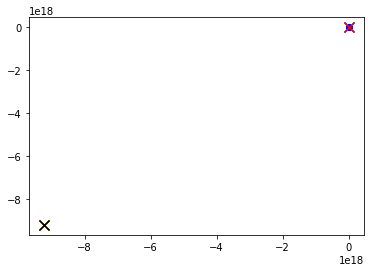

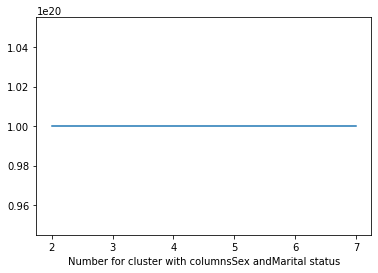

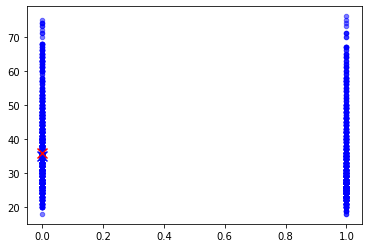

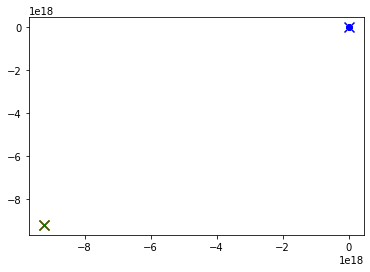

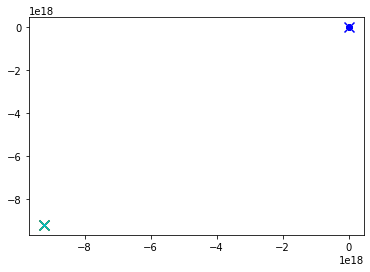

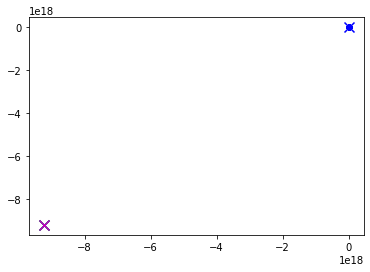

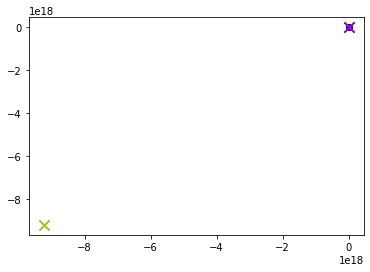

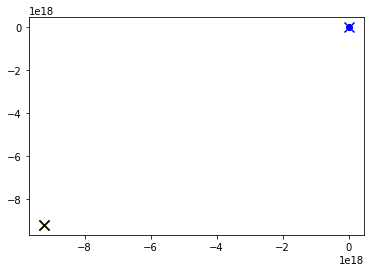

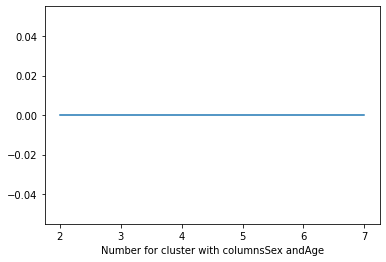

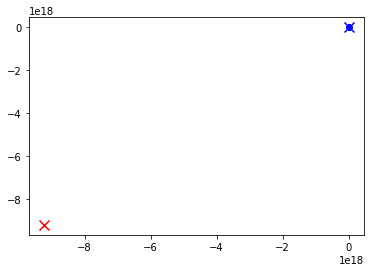

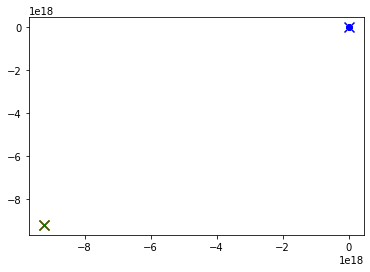

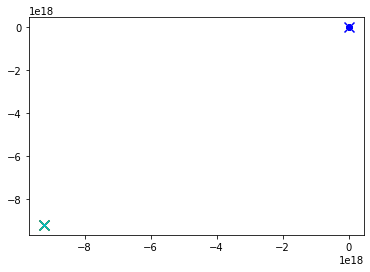

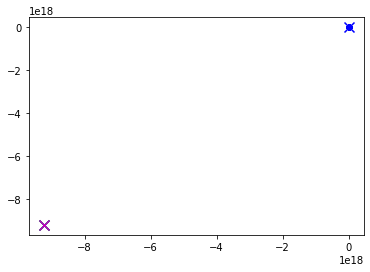

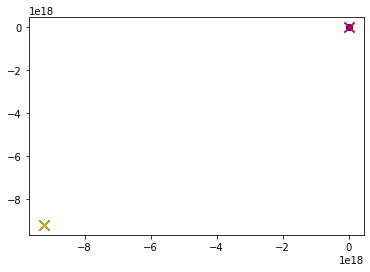

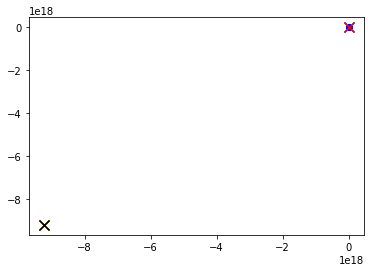

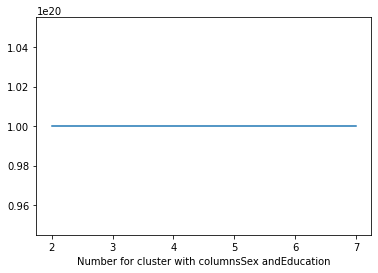

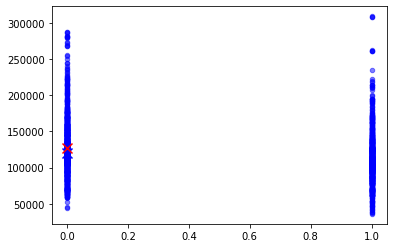

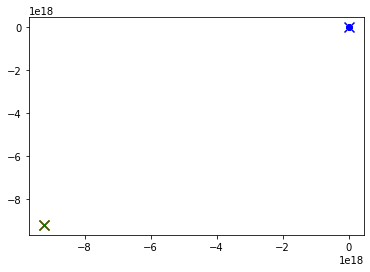

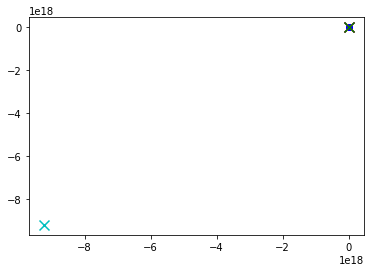

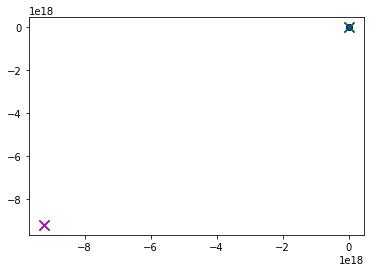

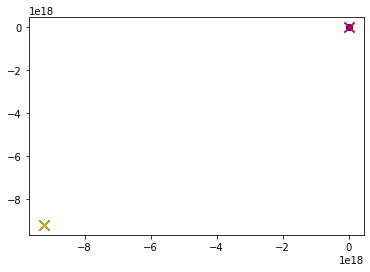

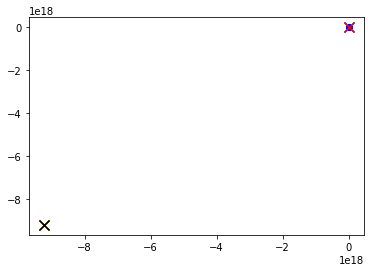

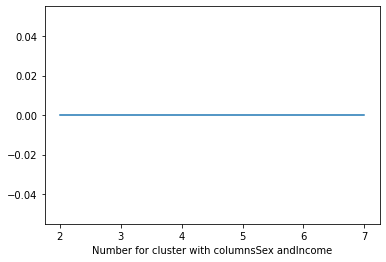

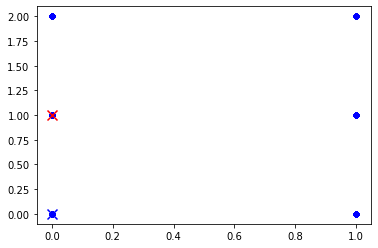

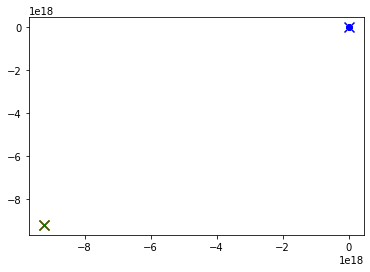

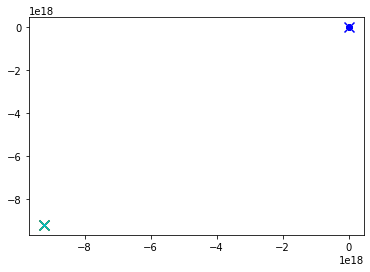

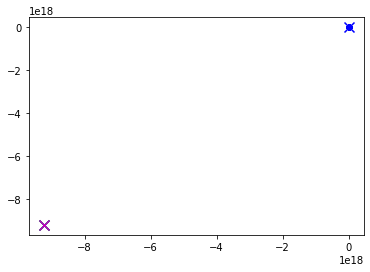

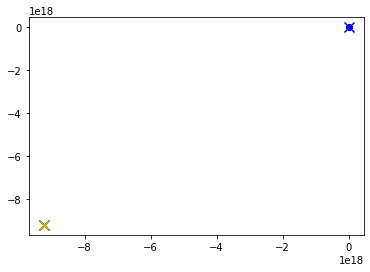

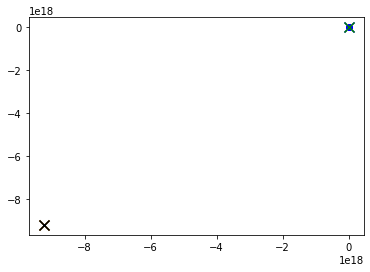

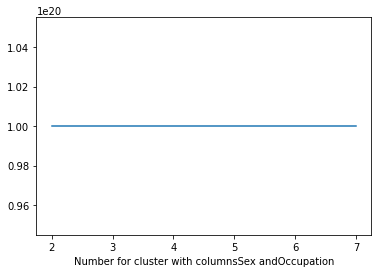

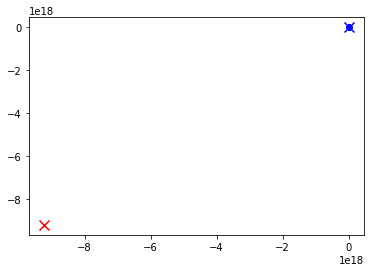

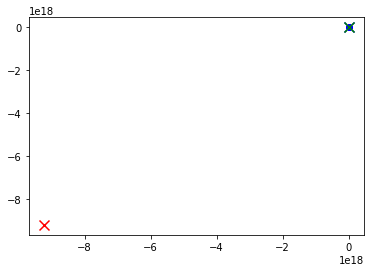

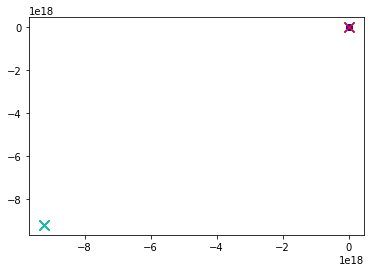

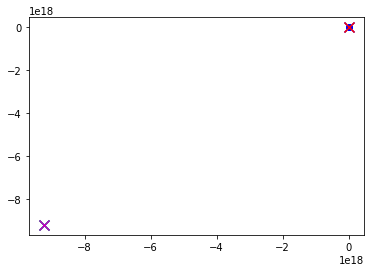

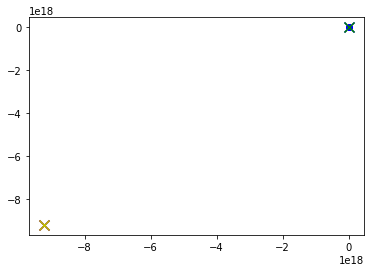

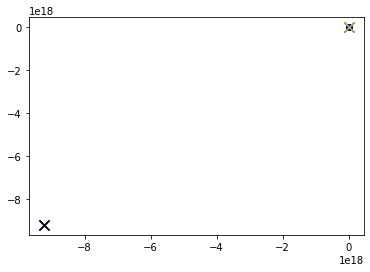

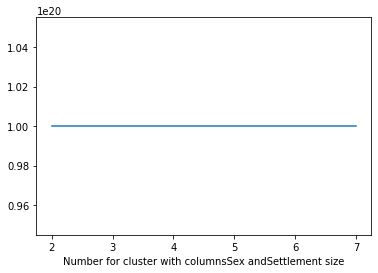

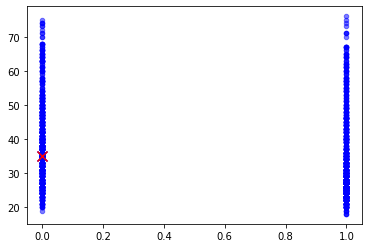

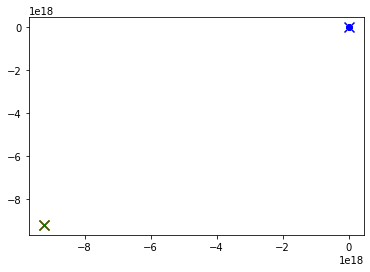

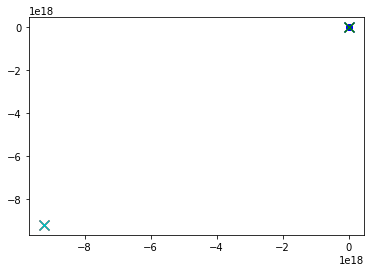

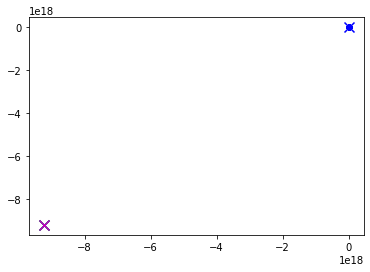

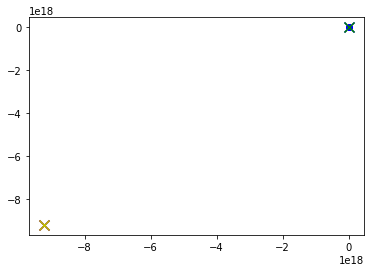

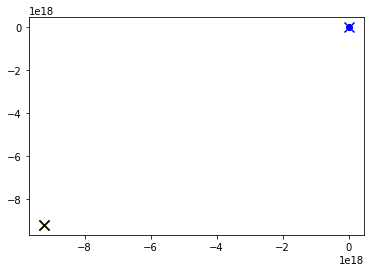

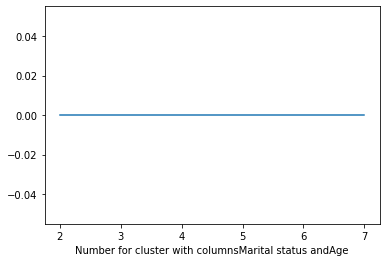

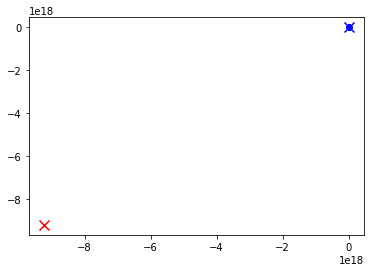

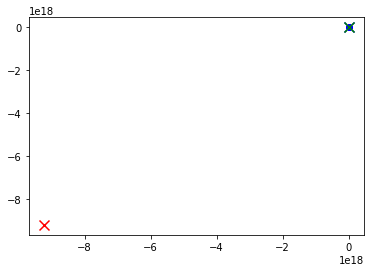

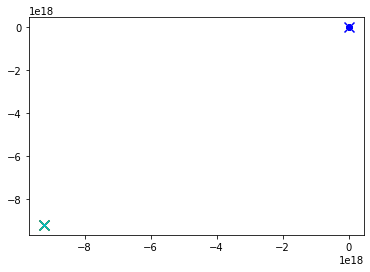

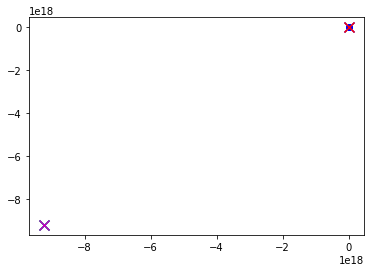

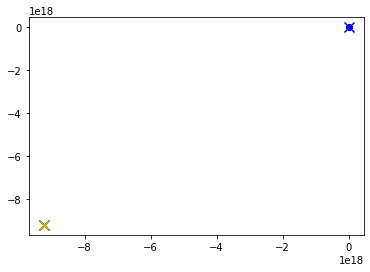

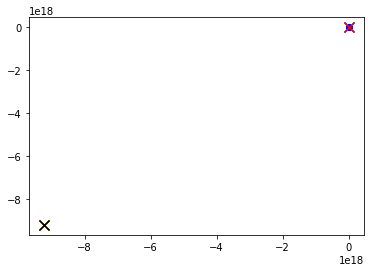

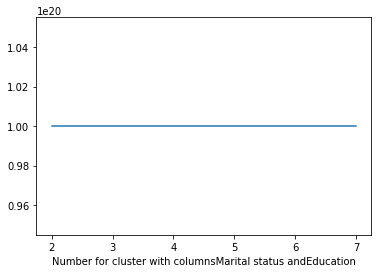

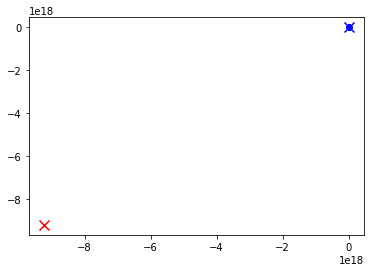

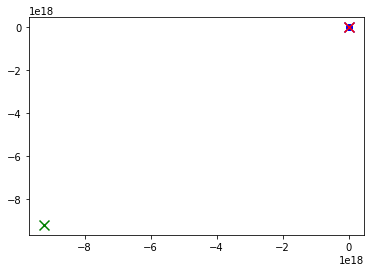

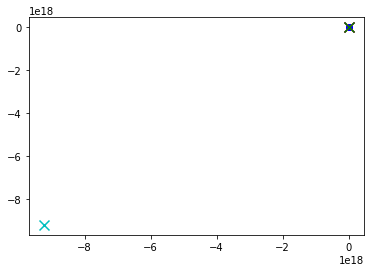

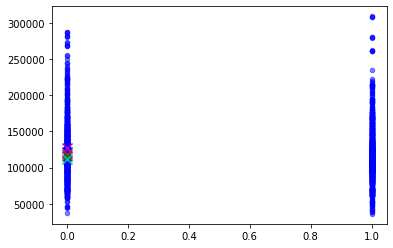

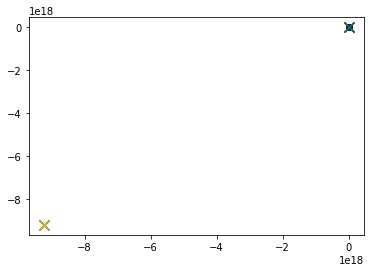

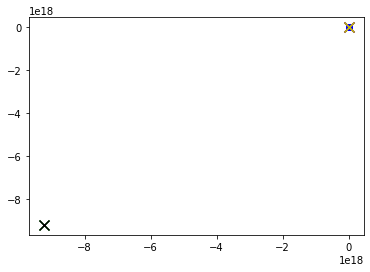

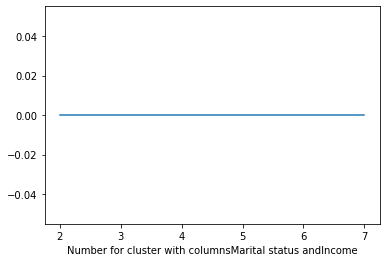

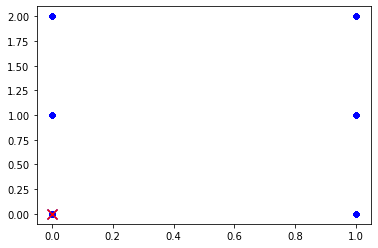

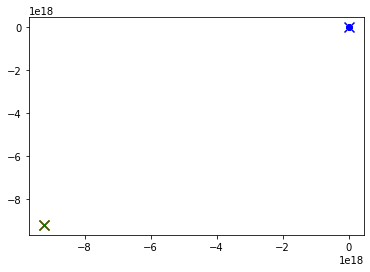

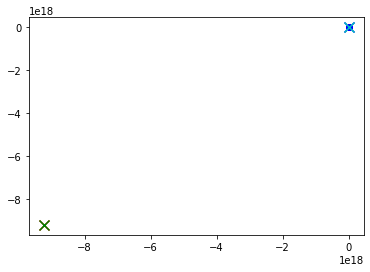

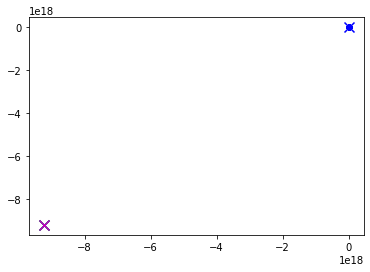

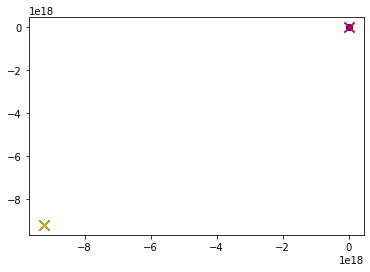

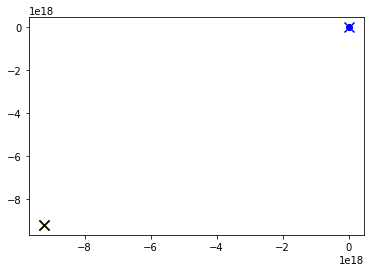

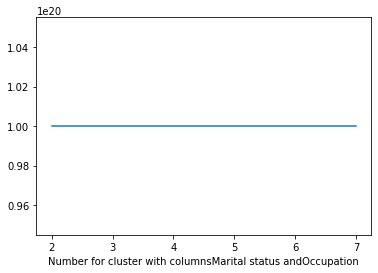

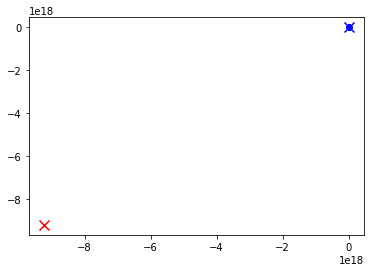

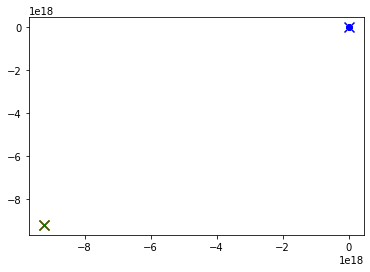

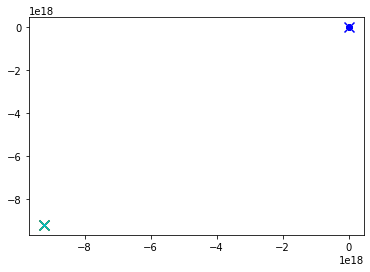

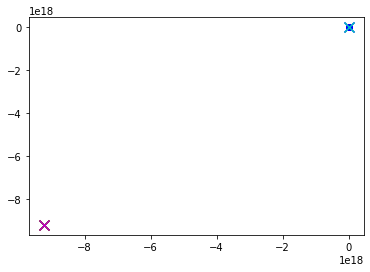

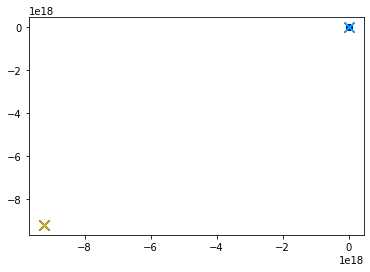

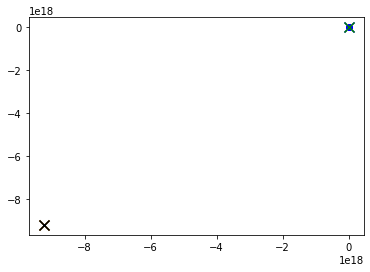

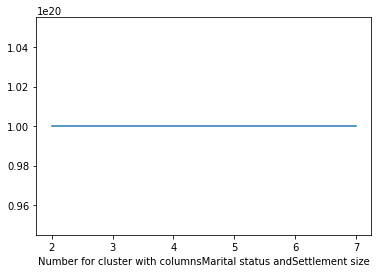

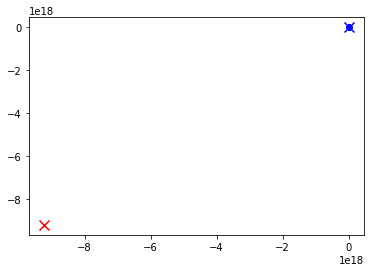

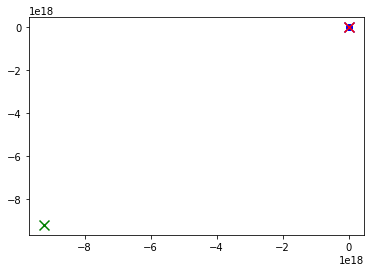

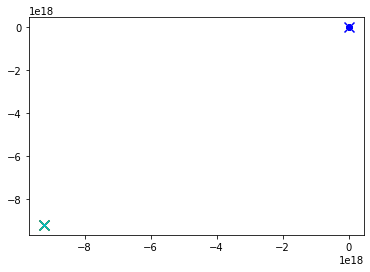

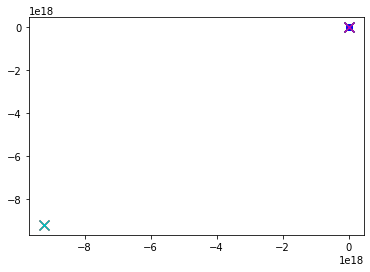

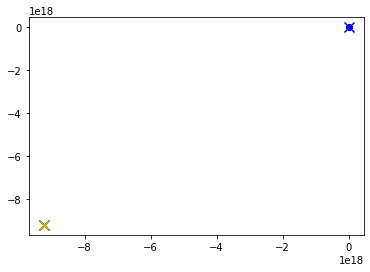

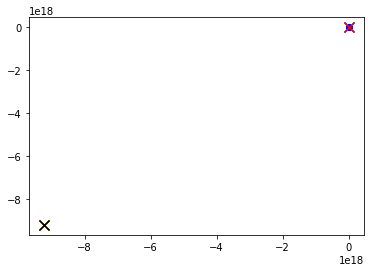

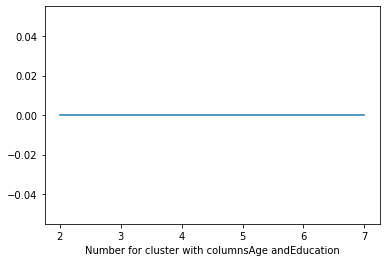

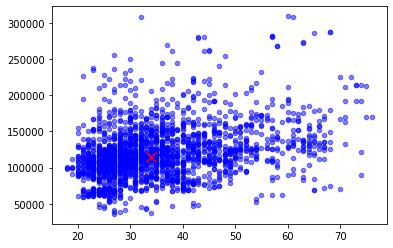

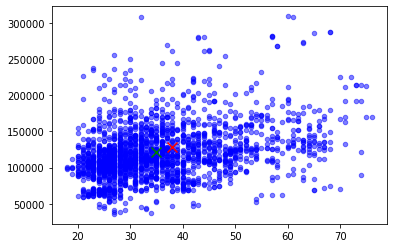

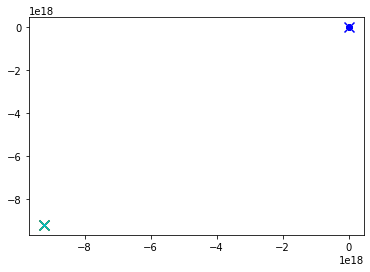

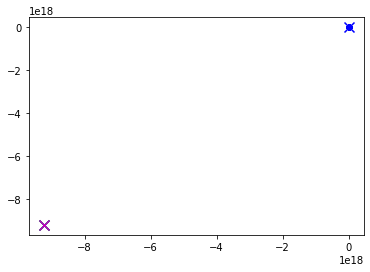

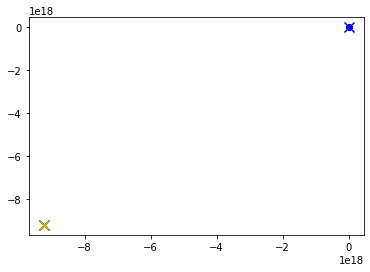

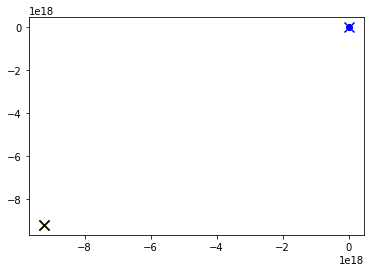

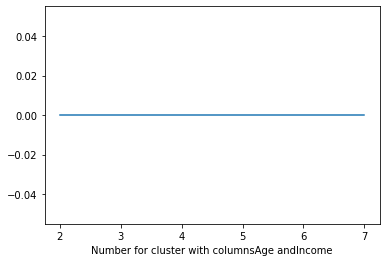

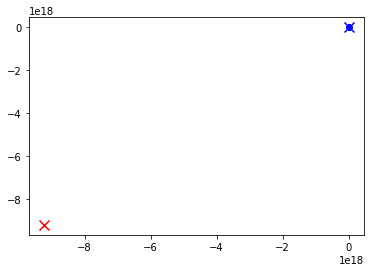

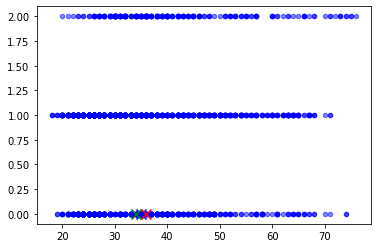

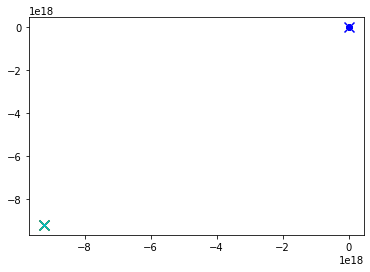

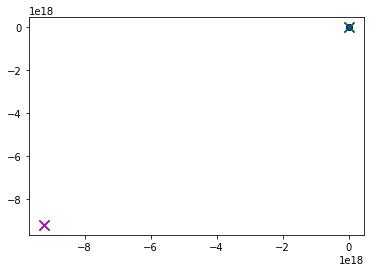

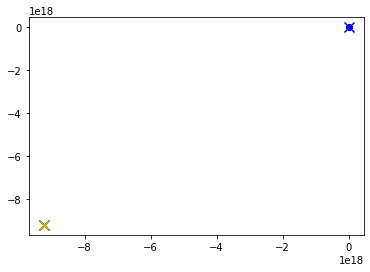

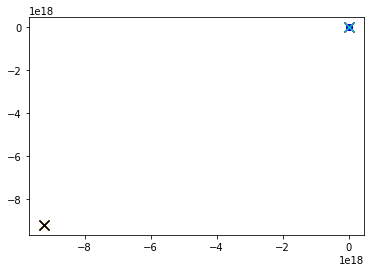

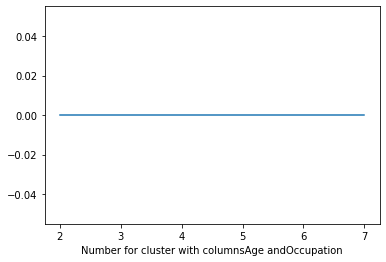

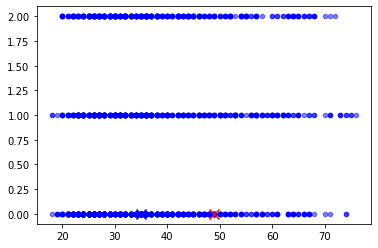

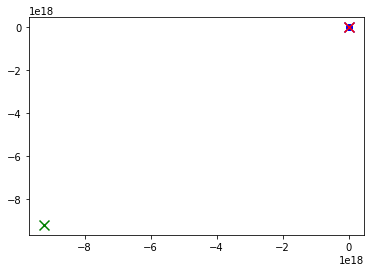

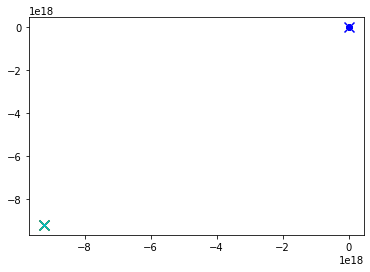

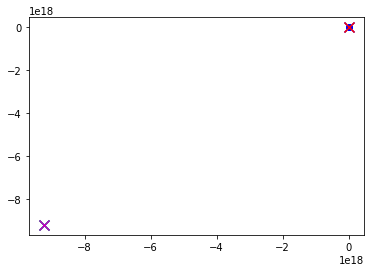

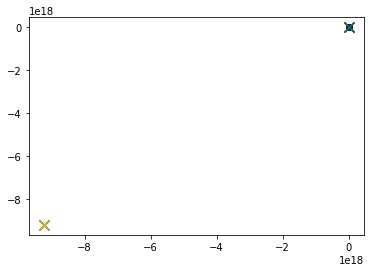

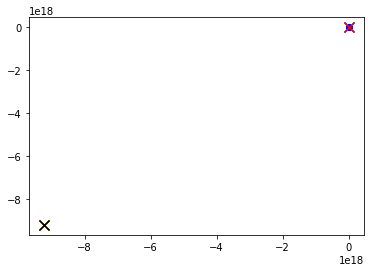

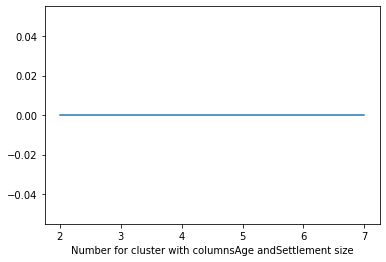

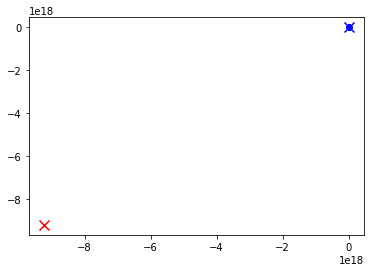

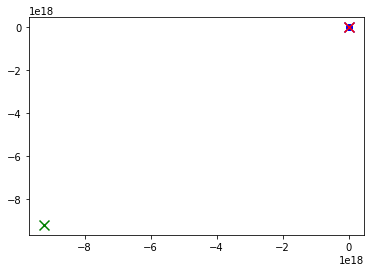

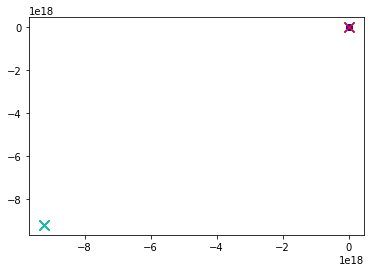

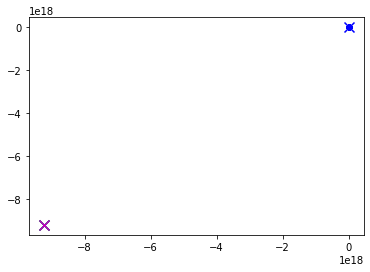

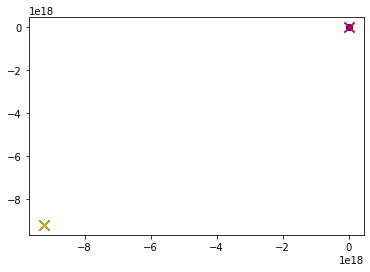

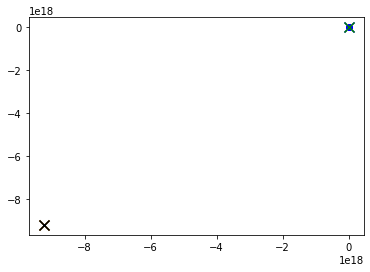

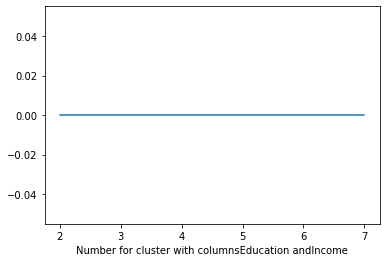

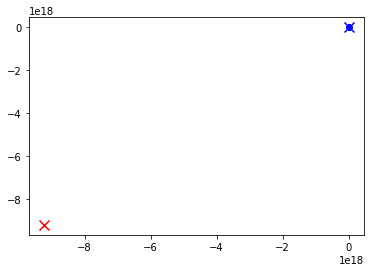

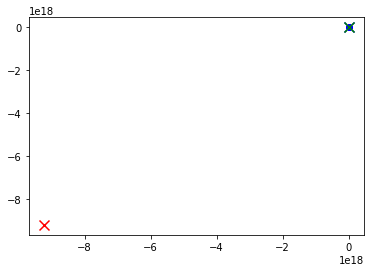

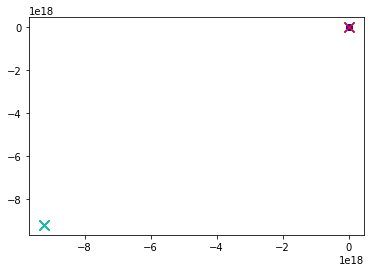

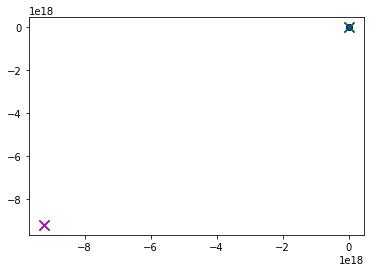

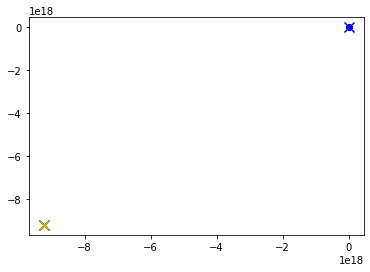

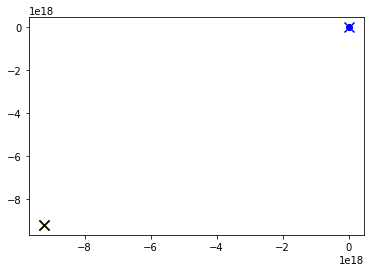

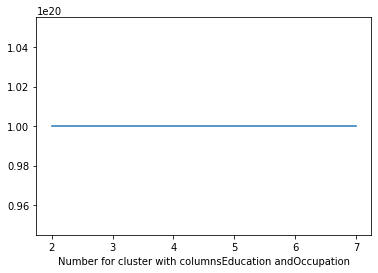

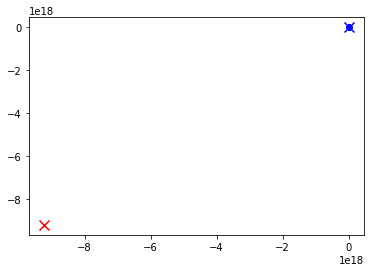

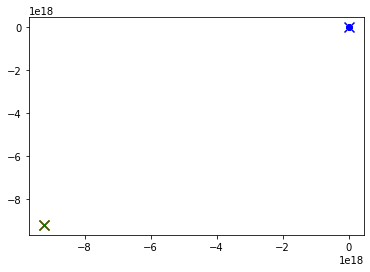

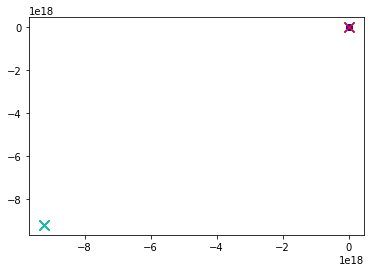

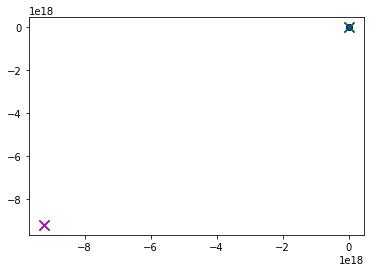

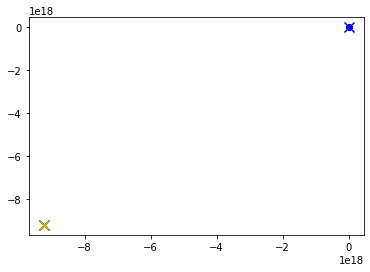

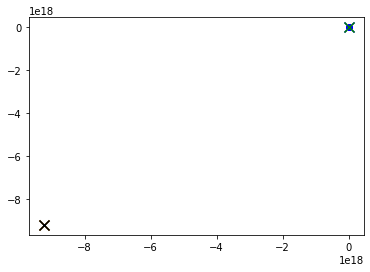

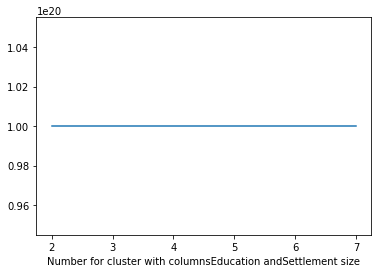

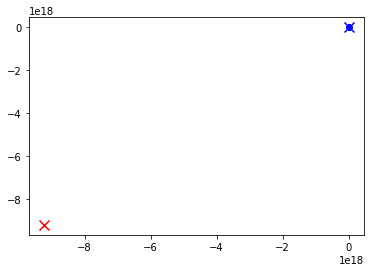

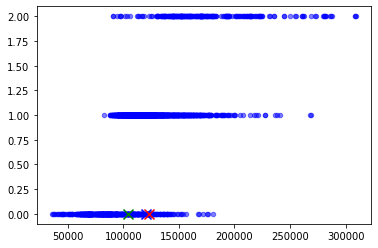

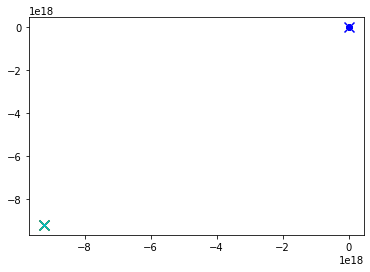

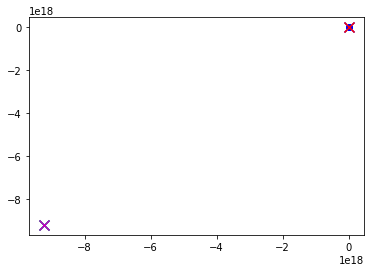

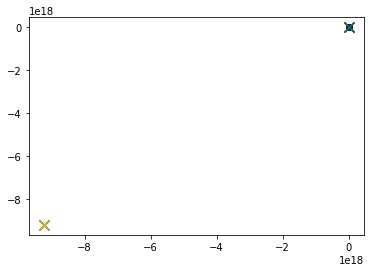

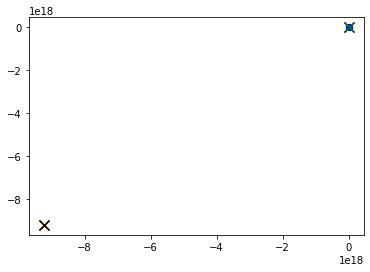

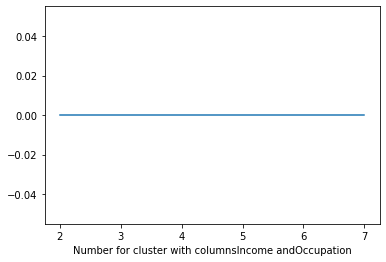

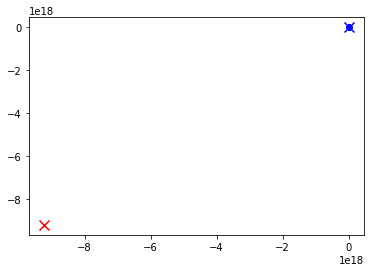

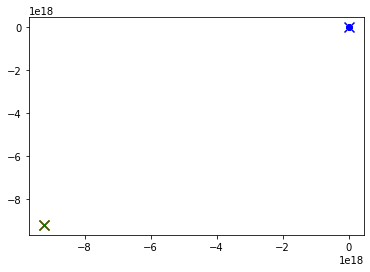

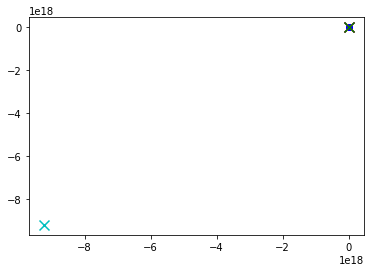

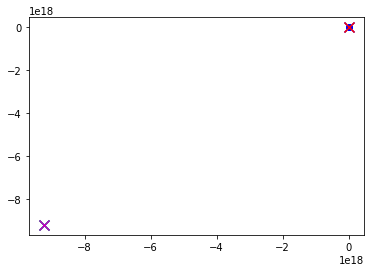

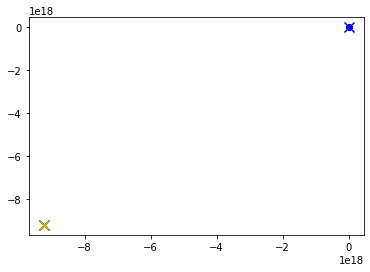

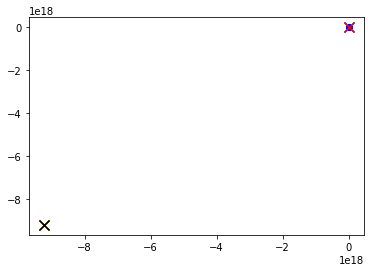

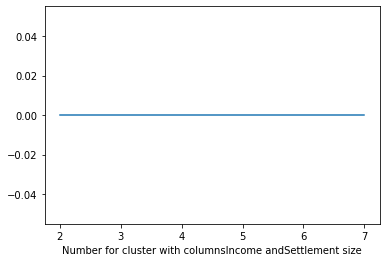

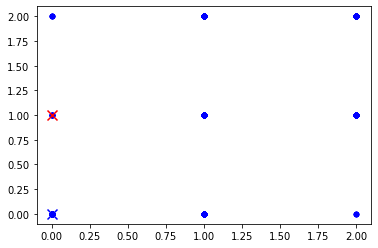

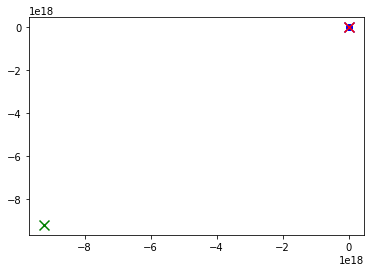

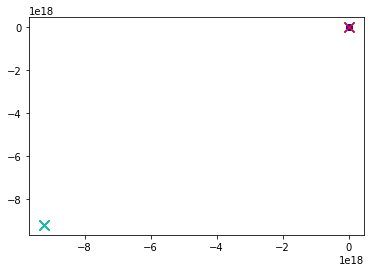

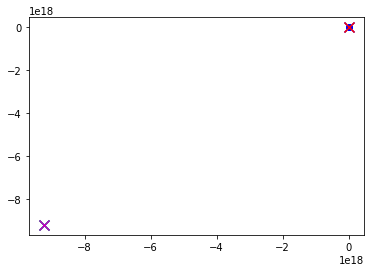

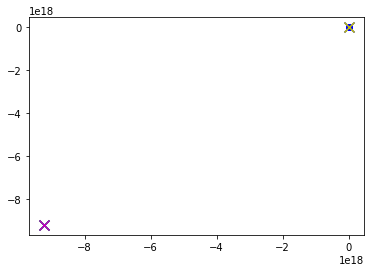

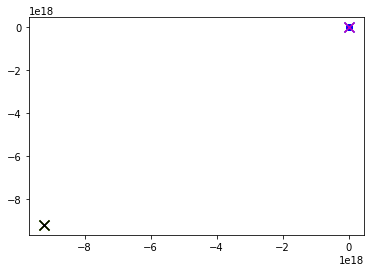

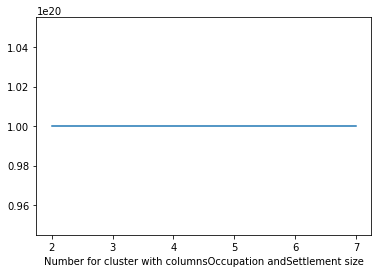

In [ ]:
#data columns ,pearsond,before normalization
import itertools as it
data1=list(it.combinations(data, 2))
print(list(data1[0]))
for i in data1:
    
    df=data[list(i)]
    
    k=[2,3,4,5,6,7]
    dist=[]

    for z in k:
     print(z)
     labels,centers,df1,mindisto=GUC_Kmean(df.values,z, "pearson")
     plt.figure() 
     display_cluster(df.values,labels,centers,z)
     dist.append(mindisto)
    plt.figure() 
    strx=str("Number for cluster"+" "+"with columns"+i[0]+" and"+i[1])
    plt.xlabel(strx)
    plt.plot(k,dist)

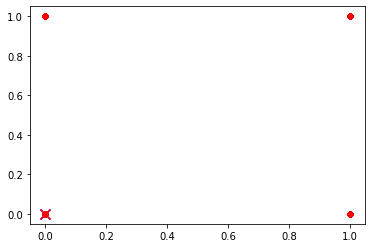

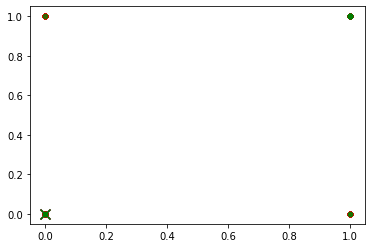

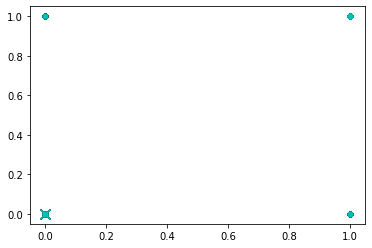

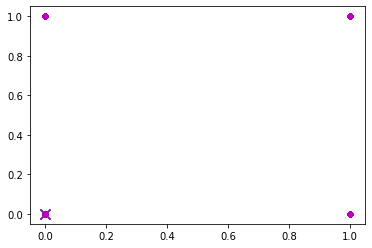

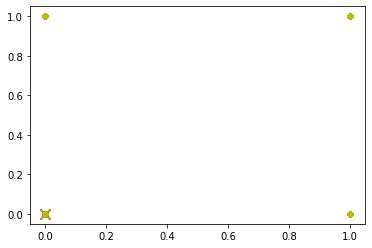

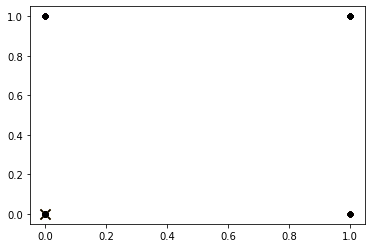

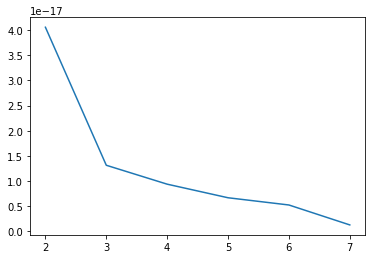

In [ ]:

k=[2,3,4,5,6,7]
dist=[]

for z in k:
 #print(z)
     labels,centers,df1,mindisto=GUC_Kmean(data.values,z, "pearson")
     plt.figure() 
     display_cluster(data.values,labels,centers,z)
     dist.append(mindisto)
plt.figure() 

plt.plot(k,dist)

#elbow point 3